In [124]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import gym
import agents
import environment
import utils 

In [133]:
from importlib import reload
reload(agents)
reload(environment)
reload(utils)

<module 'utils' from '/home/nicola/Nicola_unipd/MasterThesis/Policy-based-RL/utils.py'>

In [134]:
def play_episode(agent, env, return_states=False, greedy=True):
    # Reset environment (start of an episode)
    state = env.reset()
    rewards = []
    log_probs = []
    done = []
    
    if return_states:
        states = [state]
    while True:
        state = np.array([state])
        action, log_prob = agent.get_action(state, return_log = True, greedy=greedy)
        new_state, reward, terminal, info = env.step(action) # gym standard step's output
        if return_states:
            states.append(new_state)
       
        rewards.append(reward)
        log_probs.append(log_prob)
        done.append(terminal)
        
        if terminal:
            break
            
        state = new_state
       
    rewards = np.array(rewards)
    log_probs = np.array(log_probs)
    done = np.array(done)
    
    if return_states:
        return rewards, log_probs, np.array(states), done
    else:
        return rewards, log_probs, done

In [135]:
def train_sandbox(n_episodes = 100, lr = 0.01, gamma = 0.99, greedy=False):
    # Create environment
    env = environment.Sandbox(10, 10, [0,0], [9,9], max_steps=50)
    observation_space = 10*10
    action_space = 4
    # Init agent
    agent = agents.DiscretePolicyGrad(observation_space, action_space, lr, gamma, project_dim=16)
    performance = []
    losses = []
    for e in range(n_episodes):
        #print("\nEpisode %d"%(e+1))
        rewards, log_probs, _ = play_episode(agent, env, greedy=greedy)
        #print('play_episode executed')
        performance.append(np.sum(rewards))
        if (e+1)%10 == 0:
            print("Episode %d - reward: %.2f"%(e+1, np.mean(performance[-10:])))
        
        #print("rewards: ", rewards)
        #print("log_probs: ", log_probs)
        loss = agent.update(rewards, log_probs)
        #print('update loss executed')
        losses.append(loss)
    return agent, np.array(performance), np.array(losses)

In [136]:
%%time
trained_agentPG, cumulative_rewardPG, lossesPG = train_sandbox(n_episodes = 500, lr=0.01, gamma=0.98)

Episode 10 - reward: -6.20
Episode 20 - reward: -29.30
Episode 30 - reward: -28.80
Episode 40 - reward: -13.10
Episode 50 - reward: -31.90
Episode 60 - reward: -7.90
Episode 70 - reward: -2.00
Episode 80 - reward: -5.70
Episode 90 - reward: -2.10
Episode 100 - reward: -0.90
Episode 110 - reward: -3.90
Episode 120 - reward: 0.40
Episode 130 - reward: 1.00
Episode 140 - reward: -0.40
Episode 150 - reward: 1.00
Episode 160 - reward: 1.00
Episode 170 - reward: 1.00
Episode 180 - reward: 0.90
Episode 190 - reward: 1.00
Episode 200 - reward: 0.90
Episode 210 - reward: 1.00
Episode 220 - reward: 1.00
Episode 230 - reward: 1.00
Episode 240 - reward: 1.00
Episode 250 - reward: 0.60
Episode 260 - reward: 1.00
Episode 270 - reward: 1.00
Episode 280 - reward: 1.00
Episode 290 - reward: 1.00
Episode 300 - reward: 1.00
Episode 310 - reward: 1.00
Episode 320 - reward: 1.00
Episode 330 - reward: 1.00
Episode 340 - reward: 1.00
Episode 350 - reward: 1.00
Episode 360 - reward: 1.00
Episode 370 - reward:

<IPython.core.display.Javascript object>


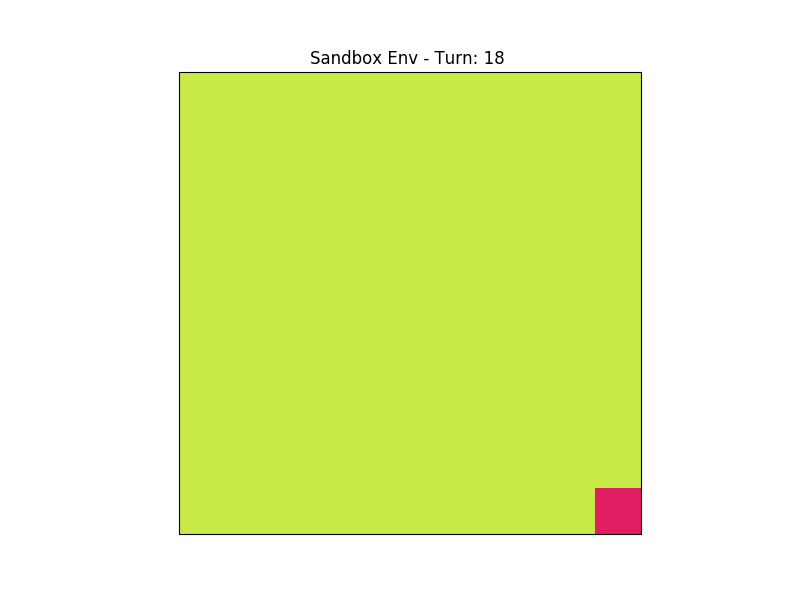

In [138]:
%matplotlib notebook
utils.render(trained_agentPG)
%matplotlib inline

# A2C

In [31]:
from importlib import reload
reload(agents)
reload(environment)
reload(utils)

<module 'utils' from '/home/nicola/Nicola_unipd/MasterThesis/Policy-based-RL/utils.py'>

In [79]:
def play_episode_A2C(agent, env, return_states=False, greedy=True, update_online=True):
    # Reset environment (start of an episode)
    state = env.reset()
    rewards = []
    log_probs = []
    done = []
    
    if return_states:
        states = [state]
        
    while True:
        state = np.array([state])
        action, log_prob = agent.get_action(state, return_log = True, greedy=greedy)
        log_probs.append(log_prob)
        new_state, reward, terminal, info = env.step(action) 
        done.append(terminal)
        if return_states:
            states.append(new_state)
            
        rewards.append(reward)
        if update_online:
            agent.update(reward, log_prob, state, new_state, terminal)

        if terminal:
            break
        state = new_state
        
    if return_states:
        return np.array(rewards), np.array(log_probs), np.array(states), np.array(done)
    else:
        return rewards, log_probs

In [80]:
def train_sandbox_A2C_v0(n_episodes = 100, lr_actor = 1e-1, lr_critic = 1e-3, gamma = 0.99, greedy=False):
    # Create environment
    env = environment.Sandbox(10, 10, [0,0], [9,9], max_steps=50)
    observation_space = 10*10
    action_space = 4
    # Init agent
    agent = agents.A2C_v0(observation_space, action_space, lr_actor, lr_critic, gamma, discrete=True, project_dim=16)
    performance = []
    
    for e in range(n_episodes):
        rewards, _ = play_episode_A2C(agent, env, return_states=False, greedy=greedy)
        
        performance.append(np.sum(rewards))
        if (e+1)%10 == 0:
            print("Episode %d - reward: %.2f"%(e+1, np.mean(performance[-10:])))

    return agent, np.array(performance)

In [34]:
%%time
trained_agentA2C, cumulative_rewardA2C = train_sandbox_A2C_v0(n_episodes = 500, gamma=0.99)

V_pred  tensor(0.1085, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.2094, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.1973, grad_fn=<AddBackward0>)
loss  tensor(0.0079, grad_fn=<SumBackward0>)
Advantage  tensor(0.0804, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1074], grad_fn=<MulBackward0>)
V_pred  tensor(0.2078, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.2432, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.2307, grad_fn=<AddBackward0>)
loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(0.0217, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0297], grad_fn=<MulBackward0>)
V_pred  tensor(0.2415, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.2344, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.2221, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0162, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0230], grad_fn=<MulBackward0>)
V_pred  tensor(0.2368, grad_fn=<SqueezeBackward0>)
V_trg (net)  t

V_trg (+r)  tensor(0.2394, grad_fn=<AddBackward0>)
loss  tensor(0.0064, grad_fn=<SumBackward0>)
Advantage  tensor(0.0772, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1199], grad_fn=<MulBackward0>)
V_pred  tensor(0.2486, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.2486, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.7538, grad_fn=<AddBackward0>)
loss  tensor(1.0050, grad_fn=<SumBackward0>)
Advantage  tensor(-1.0025, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2832], grad_fn=<MulBackward0>)
V_pred  tensor(0.2454, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.1583, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.1467, grad_fn=<AddBackward0>)
loss  tensor(0.0097, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0957, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.1272], grad_fn=<MulBackward0>)
V_pred  tensor(0.1578, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.1578, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.8438, grad_fn=<AddBackward0>)
loss  tens

V_pred  tensor(0.1304, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.1578, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.1462, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(0.0142, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0168], grad_fn=<MulBackward0>)
V_pred  tensor(0.1566, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.1575, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.1459, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0106, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0164], grad_fn=<MulBackward0>)
V_pred  tensor(0.1566, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.1566, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.8450, grad_fn=<AddBackward0>)
loss  tensor(1.0031, grad_fn=<SumBackward0>)
Advantage  tensor(-1.0016, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4780], grad_fn=<MulBackward0>)
V_pred  tensor(0.1555, grad_fn=<SqueezeBackward0>)
V_trg (net)

Advantage  tensor(0.0122, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0173], grad_fn=<MulBackward0>)
V_pred  tensor(0.1175, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.1179, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.1067, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0104, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0145], grad_fn=<MulBackward0>)
V_pred  tensor(0.1182, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.1181, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0164, grad_fn=<SumBackward0>)
Advantage  tensor(-0.1264, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.1946], grad_fn=<MulBackward0>)
V_pred  tensor(0.1080, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.1080, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.8931, grad_fn=<AddBackward0>)
loss  tensor(1.0022, grad_fn=<SumBackward0>)
Advantage  tensor(-1.0011, grad_fn=<SubBackward0>)
policy_gra

V_pred  tensor(0.1123, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.1123, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.8888, grad_fn=<AddBackward0>)
loss  tensor(1.0022, grad_fn=<SumBackward0>)
Advantage  tensor(-1.0011, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4773], grad_fn=<MulBackward0>)
V_pred  tensor(0.1117, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.1134, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.1022, grad_fn=<AddBackward0>)
loss  tensor(8.9798e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0092, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0125], grad_fn=<MulBackward0>)
V_pred  tensor(0.1130, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.1110, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0999, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0132, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0205], grad_fn=<MulBackward0>)
V_pred  tensor(0.1106, grad_fn=<SqueezeBackward0>)
V_trg

Advantage  tensor(-1.0011, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.1674], grad_fn=<MulBackward0>)
V_pred  tensor(0.1119, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.1119, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.8893, grad_fn=<AddBackward0>)
loss  tensor(1.0022, grad_fn=<SumBackward0>)
Advantage  tensor(-1.0011, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.1674], grad_fn=<MulBackward0>)
V_pred  tensor(0.1108, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.1108, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.8903, grad_fn=<AddBackward0>)
loss  tensor(1.0022, grad_fn=<SumBackward0>)
Advantage  tensor(-1.0011, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.1674], grad_fn=<MulBackward0>)
V_pred  tensor(0.1096, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.1106, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0995, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0094, grad_fn=<SubBackward0>)
policy_g

policy_gradient  tensor([-1.2771], grad_fn=<MulBackward0>)
V_pred  tensor(0.0792, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0792, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.9216, grad_fn=<AddBackward0>)
loss  tensor(1.0016, grad_fn=<SumBackward0>)
Advantage  tensor(-1.0008, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2771], grad_fn=<MulBackward0>)
V_pred  tensor(0.0786, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0683, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0577, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0207, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0316], grad_fn=<MulBackward0>)
V_pred  tensor(0.0679, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0679, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.9327, grad_fn=<AddBackward0>)
loss  tensor(1.0014, grad_fn=<SumBackward0>)
Advantage  tensor(-1.0007, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5407], grad_fn=<MulBackward0>)


Advantage  tensor(-1.0007, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2361], grad_fn=<MulBackward0>)
V_pred  tensor(0.0728, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0663, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0556, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0163, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0232], grad_fn=<MulBackward0>)
V_pred  tensor(0.0666, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0666, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.9341, grad_fn=<AddBackward0>)
loss  tensor(1.0013, grad_fn=<SumBackward0>)
Advantage  tensor(-1.0007, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2802], grad_fn=<MulBackward0>)
V_pred  tensor(0.0665, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0845, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0737, grad_fn=<AddBackward0>)
loss  tensor(5.1245e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0067, grad_fn=<SubBackward0>)
policy

V_trg (net)  tensor(0.0449, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0345, grad_fn=<AddBackward0>)
loss  tensor(8.0815e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0027, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0036], grad_fn=<MulBackward0>)
V_pred  tensor(0.0444, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0243, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0141, grad_fn=<AddBackward0>)
loss  tensor(0.0009, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0305, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0430], grad_fn=<MulBackward0>)
V_pred  tensor(0.0235, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0584, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0478, grad_fn=<AddBackward0>)
loss  tensor(0.0006, grad_fn=<SumBackward0>)
Advantage  tensor(0.0240, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0338], grad_fn=<MulBackward0>)
V_pred  tensor(0.0577, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0430, grad_fn=<SqueezeBackward0>)
V_t

V_trg (net)  tensor(0.0178, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0076, grad_fn=<AddBackward0>)
loss  tensor(0.0009, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0296, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0417], grad_fn=<MulBackward0>)
V_pred  tensor(0.0182, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0376, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0273, grad_fn=<AddBackward0>)
loss  tensor(8.2427e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0085, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0107], grad_fn=<MulBackward0>)
V_pred  tensor(0.0375, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0299, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0196, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0178, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0268], grad_fn=<MulBackward0>)
V_pred  tensor(0.0299, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0297, grad_fn=<SqueezeBackward0>)
V_t

V_trg (net)  tensor(0.0234, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.9768, grad_fn=<AddBackward0>)
loss  tensor(1.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-1.0002, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4760], grad_fn=<MulBackward0>)
V_pred  tensor(0.0234, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0234, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.9769, grad_fn=<AddBackward0>)
loss  tensor(1.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-1.0002, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4760], grad_fn=<MulBackward0>)
V_pred  tensor(0.0233, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0233, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.9770, grad_fn=<AddBackward0>)
loss  tensor(1.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-1.0002, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4760], grad_fn=<MulBackward0>)
V_pred  tensor(0.0232, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0261, grad_fn=<SqueezeBackward0>)
V_

V_pred  tensor(-0.0107, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0612, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0506, grad_fn=<AddBackward0>)
loss  tensor(0.0038, grad_fn=<SumBackward0>)
Advantage  tensor(0.0581, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0833], grad_fn=<MulBackward0>)
V_pred  tensor(0.0596, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0091, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0190, grad_fn=<AddBackward0>)
loss  tensor(0.0062, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0734, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.1120], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0068, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0567, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0462, grad_fn=<AddBackward0>)
loss  tensor(0.0028, grad_fn=<SumBackward0>)
Advantage  tensor(0.0468, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0670], grad_fn=<MulBackward0>)
V_pred  tensor(0.0532, grad_fn=<SqueezeBackward0>)
V_trg (net

V_pred  tensor(0.0275, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0077, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0024, grad_fn=<AddBackward0>)
loss  tensor(0.0009, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0298, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0425], grad_fn=<MulBackward0>)
V_pred  tensor(0.0080, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0263, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0161, grad_fn=<AddBackward0>)
loss  tensor(6.5431e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0074, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0102], grad_fn=<MulBackward0>)
V_pred  tensor(0.0260, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0429, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0325, grad_fn=<AddBackward0>)
loss  tensor(4.2097e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0064, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0088], grad_fn=<MulBackward0>)
V_pred  tensor(0.0427, grad_fn=<SqueezeBackward0>)
V_trg

Advantage  tensor(-0.0115, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0151], grad_fn=<MulBackward0>)
V_pred  tensor(0.0156, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0247, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0145, grad_fn=<AddBackward0>)
loss  tensor(1.3610e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0013, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0017], grad_fn=<MulBackward0>)
V_pred  tensor(0.0247, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0280, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0177, grad_fn=<AddBackward0>)
loss  tensor(4.7877e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0069, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0095], grad_fn=<MulBackward0>)
V_pred  tensor(0.0280, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0246, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0144, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0136, grad_fn=<SubBackward0>)
po

V_pred  tensor(0.0154, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0183, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0081, grad_fn=<AddBackward0>)
loss  tensor(5.2440e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0073, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0099], grad_fn=<MulBackward0>)
V_pred  tensor(0.0182, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0182, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0081, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0102, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0143], grad_fn=<MulBackward0>)
V_pred  tensor(0.0180, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0312, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0209, grad_fn=<AddBackward0>)
loss  tensor(8.3806e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0027, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0040], grad_fn=<MulBackward0>)
V_pred  tensor(0.0309, grad_fn=<SqueezeBackward0>)
V_tr

policy_gradient  tensor([0.0389], grad_fn=<MulBackward0>)
V_pred  tensor(0.0566, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0104, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0202, grad_fn=<AddBackward0>)
loss  tensor(0.0059, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0752, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0950], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0095, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0557, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0452, grad_fn=<AddBackward0>)
loss  tensor(0.0030, grad_fn=<SumBackward0>)
Advantage  tensor(0.0523, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0737], grad_fn=<MulBackward0>)
V_pred  tensor(0.0546, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0083, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0182, grad_fn=<AddBackward0>)
loss  tensor(0.0053, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0695, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0879], grad_fn=<MulBackward0>)


V_trg (net)  tensor(0.0142, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0040, grad_fn=<AddBackward0>)
loss  tensor(5.8362e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0075, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0103], grad_fn=<MulBackward0>)
V_pred  tensor(0.0139, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0068, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0033, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0169, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0239], grad_fn=<MulBackward0>)
V_pred  tensor(0.0067, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0135, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0034, grad_fn=<AddBackward0>)
loss  tensor(1.0951e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0035, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0044], grad_fn=<MulBackward0>)
V_pred  tensor(0.0132, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0082, grad_fn=<SqueezeBackward0>

Advantage  tensor(0.0060, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0085], grad_fn=<MulBackward0>)
V_pred  tensor(0.0185, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0042, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0142, grad_fn=<AddBackward0>)
loss  tensor(0.0011, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0319, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0438], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0042, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0042, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0042, grad_fn=<AddBackward0>)
loss  tensor(0.9999, grad_fn=<SumBackward0>)
Advantage  tensor(-1.0000, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4097], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0042, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0042, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0042, grad_fn=<AddBackward0>)
loss  tensor(0.9999, grad_fn=<SumBackward0>)
Advantage  tensor(-1.0000, grad_fn=<SubBackward0>)
poli

policy_gradient  tensor([-0.0187], grad_fn=<MulBackward0>)
V_pred  tensor(0.0036, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0025, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0075, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0109, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0159], grad_fn=<MulBackward0>)
V_pred  tensor(0.0026, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0072, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0029, grad_fn=<AddBackward0>)
loss  tensor(3.0607e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0055, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0068], grad_fn=<MulBackward0>)
V_pred  tensor(0.0073, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0027, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0073, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0142, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0205], grad_fn=<MulBackwar

Advantage  tensor(0.0072, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0105], grad_fn=<MulBackward0>)
V_pred  tensor(0.0188, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0190, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0288, grad_fn=<AddBackward0>)
loss  tensor(0.0023, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0460, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0667], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0185, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0275, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0173, grad_fn=<AddBackward0>)
loss  tensor(0.0013, grad_fn=<SumBackward0>)
Advantage  tensor(0.0345, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0466], grad_fn=<MulBackward0>)
V_pred  tensor(0.0271, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0168, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(0.0066, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0199, grad_fn=<SubBackward0>)
policy_grad

Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0102], grad_fn=<MulBackward0>)
V_pred  tensor(0.0017, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0016, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0084, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0100, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0124], grad_fn=<MulBackward0>)
V_pred  tensor(0.0016, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0072, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0116, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0141], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0043, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0028, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0128, grad_fn=<AddBackward0>)
loss  tensor(7.0870e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0084, grad_fn=<SubBackward0>)
p

V_pred  tensor(-0.0062, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0033, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0133, grad_fn=<AddBackward0>)
loss  tensor(5.0041e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0071, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0084], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0034, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0046, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0145, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0111, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0170], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0045, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0034, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0133, grad_fn=<AddBackward0>)
loss  tensor(7.7605e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0088, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0118], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0034, grad_fn=<SqueezeBack

V_pred  tensor(-0.0074, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0070, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0169, grad_fn=<AddBackward0>)
loss  tensor(9.0205e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0095, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0148], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0071, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0071, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0070, grad_fn=<AddBackward0>)
loss  tensor(0.9999, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9999, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4756], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0071, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0076, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0175, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0104, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0142], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0076, grad_fn=<SqueezeBackward

Advantage  tensor(-0.0056, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0082], grad_fn=<MulBackward0>)
V_pred  tensor(0.0022, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(0.0084, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0017, grad_fn=<AddBackward0>)
loss  tensor(1.4967e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0038, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0054], grad_fn=<MulBackward0>)
V_pred  tensor(0.0084, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0006, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0106, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0184, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0242], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0001, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0022, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0121, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0120, grad_fn=<SubBackward0>)


policy_gradient  tensor([-0.0155], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0041, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0075, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0174, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0133, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0165], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0074, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0097, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0196, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0120, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0169], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0096, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0075, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0174, grad_fn=<AddBackward0>)
loss  tensor(6.1320e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0078, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0113], grad_fn=<MulB

V_pred  tensor(-0.0081, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0054, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0154, grad_fn=<AddBackward0>)
loss  tensor(5.3264e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0073, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0100], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0055, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0055, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0054, grad_fn=<AddBackward0>)
loss  tensor(0.9999, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9999, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2352], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0056, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0082, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0181, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0125, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0188], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0083, grad_fn=<SqueezeBackward

V_pred  tensor(-0.0170, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0170, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0169, grad_fn=<AddBackward0>)
loss  tensor(0.9997, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9998, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2339], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0172, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0116, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0215, grad_fn=<AddBackward0>)
loss  tensor(1.8847e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0043, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0062], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0117, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0117, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0116, grad_fn=<AddBackward0>)
loss  tensor(0.9998, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9999, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4755], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0118, grad_fn=<SqueezeBackward

V_pred  tensor(-0.0141, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0107, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0206, grad_fn=<AddBackward0>)
loss  tensor(4.1503e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0063, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0086], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0105, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0101, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0200, grad_fn=<AddBackward0>)
loss  tensor(9.0371e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0134], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0101, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0107, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0206, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0103, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0129], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0105, grad_fn=<SqueezeBack

policy_gradient  tensor([-0.0160], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0021, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0076, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(6.2063e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0080, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0116], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0191, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0120, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0218, grad_fn=<AddBackward0>)
loss  tensor(7.3659e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0027, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0036], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0120, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0120, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0119, grad_fn=<AddBackward0>)
loss  tensor(0.9998, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9999, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2760], grad_fn=<

loss  tensor(6.0674e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0077, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0103], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0133, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0154, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0253, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0118, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0195], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0154, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0134, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0233, grad_fn=<AddBackward0>)
loss  tensor(6.1819e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0079, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0105], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0134, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0134, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0133, grad_fn=<AddBackward0>)
loss  tensor(0.9997, grad_fn=<SumBackward0>)

Advantage  tensor(-0.0119, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0159], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0184, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0103, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0202, grad_fn=<AddBackward0>)
loss  tensor(3.2181e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0018, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0025], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0104, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0177, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0276, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0169, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0250], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0176, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0164, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0262, grad_fn=<AddBackward0>)
loss  tensor(7.3846e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0086, grad_fn=<SubBackw

Advantage  tensor(-0.0098, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0134], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0169, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0182, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0280, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0110, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0147], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0181, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0181, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0179, grad_fn=<AddBackward0>)
loss  tensor(0.9996, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9998, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.1659], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0182, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0182, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0180, grad_fn=<AddBackward0>)
loss  tensor(0.9996, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9998, grad_fn=<SubBackward0>)
p

V_trg (+r)  tensor(-0.0219, grad_fn=<AddBackward0>)
loss  tensor(1.5055e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0040, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0061], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0122, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0188, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0286, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0158, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0215], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0184, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0191, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0289, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0107, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0146], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0191, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0183, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0281, grad_fn=<AddBackward

V_pred  tensor(-0.0160, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0160, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0259, grad_fn=<AddBackward0>)
loss  tensor(9.8385e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0097, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0137], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0160, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0161, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0259, grad_fn=<AddBackward0>)
loss  tensor(9.9259e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0099, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0126], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0160, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0168, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0267, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0106, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0150], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0169, grad_fn=<SqueezeBack

Advantage  tensor(-0.9998, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.3196], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0181, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0181, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0179, grad_fn=<AddBackward0>)
loss  tensor(0.9996, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9998, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2352], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0182, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0182, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0181, grad_fn=<AddBackward0>)
loss  tensor(0.9996, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9998, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2352], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0184, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0184, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0182, grad_fn=<AddBackward0>)
loss  tensor(0.9996, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9998, grad_fn=<SubBackward0>)
p

V_trg (+r)  tensor(-0.0312, grad_fn=<AddBackward0>)
loss  tensor(1.7929e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0021, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0025], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0215, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0311, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0408, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0176, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0223], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0295, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0257, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0355, grad_fn=<AddBackward0>)
loss  tensor(3.5852e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0070, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0095], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0255, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0233, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0331, grad_fn=<AddBack

Advantage  tensor(-0.0109, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0181], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0204, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0193, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0291, grad_fn=<AddBackward0>)
loss  tensor(7.6025e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0086, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0116], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0192, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0205, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0303, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0109, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0136], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0205, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0193, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(0.0105, grad_fn=<SubBackward0>

Advantage  tensor(-0.0056, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0081], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0145, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0157, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0256, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0103, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0147], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0156, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0121, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0219, grad_fn=<AddBackward0>)
loss  tensor(4.0738e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0062, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0090], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0119, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0218, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0315, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0191, grad_fn=<SubBackward0

Advantage  tensor(-0.0161, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0245], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0453, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0387, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0484, grad_fn=<AddBackward0>)
loss  tensor(9.2065e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0028, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0033], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0395, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0477, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0573, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0177, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0254], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0484, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0405, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0501, grad_fn=<AddBackward0>)
loss  tensor(2.7687e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0017, grad_fn=<SubBackw

policy_gradient  tensor([-1.5388], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0576, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0576, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0570, grad_fn=<AddBackward0>)
loss  tensor(0.9988, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9994, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2334], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0578, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0578, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0572, grad_fn=<AddBackward0>)
loss  tensor(0.9988, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9994, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2334], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0580, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0580, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0574, grad_fn=<AddBackward0>)
loss  tensor(0.9988, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9994, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2334], grad_fn=<MulBackw

V_pred  tensor(-0.0494, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0607, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0701, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0205, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0269], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0605, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0605, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0599, grad_fn=<AddBackward0>)
loss  tensor(0.9988, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9994, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2334], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0604, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0525, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0620, grad_fn=<AddBackward0>)
loss  tensor(2.5187e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0018, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0023], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0526, grad_fn=<SqueezeBackward

V_pred  tensor(-0.0486, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0502, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0597, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0109, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0138], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0502, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0598, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0692, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0190, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0250], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0597, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0597, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0591, grad_fn=<AddBackward0>)
loss  tensor(0.9988, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9994, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5388], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0597, grad_fn=<SqueezeBackward0>)


loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0137, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0208], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0550, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0515, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0609, grad_fn=<AddBackward0>)
loss  tensor(3.5505e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0061, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0080], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0515, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0519, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0614, grad_fn=<AddBackward0>)
loss  tensor(9.8663e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0095, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0139], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0515, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0503, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0598, grad_fn=<AddBackward0>)
loss  tensor(6.9679e-05, grad_fn=<SumBackwar

V_pred  tensor(-0.0514, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0538, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0633, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0118, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0141], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0538, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0499, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0594, grad_fn=<AddBackward0>)
loss  tensor(3.1507e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0056, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0077], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0499, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0499, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0494, grad_fn=<AddBackward0>)
loss  tensor(0.9990, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9995, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2346], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0499, grad_fn=<SqueezeBackward

Advantage  tensor(-0.9995, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4244], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0494, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0455, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0550, grad_fn=<AddBackward0>)
loss  tensor(3.2238e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0060, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0078], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0459, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0499, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0594, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0130, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0157], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0499, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0642, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0735, grad_fn=<AddBackward0>)
loss  tensor(0.0006, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0233, grad_fn=<SubBackward0

V_trg (net)  tensor(-0.0550, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0644, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0118, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0165], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0548, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0525, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0619, grad_fn=<AddBackward0>)
loss  tensor(5.1015e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0072, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0088], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0525, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0524, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0619, grad_fn=<AddBackward0>)
loss  tensor(8.8932e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0094, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0111], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0524, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0546, grad_fn=<Squeez

Advantage  tensor(-0.0086, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0108], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0502, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0443, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0539, grad_fn=<AddBackward0>)
loss  tensor(1.3290e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0035, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0050], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0442, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0524, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0619, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0175, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0240], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0524, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0552, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0647, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0121, grad_fn=<SubBackward0

V_trg (net)  tensor(-0.0645, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0738, grad_fn=<AddBackward0>)
loss  tensor(2.5041e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0049, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0072], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0644, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0539, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0633, grad_fn=<AddBackward0>)
loss  tensor(1.1066e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0009, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0014], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0539, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0539, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0534, grad_fn=<AddBackward0>)
loss  tensor(0.9989, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9995, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2118], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0540, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0540, grad_fn=<SqueezeB

Advantage  tensor(-0.0078, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0107], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0539, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0563, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0657, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0118, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0169], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0563, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0556, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0650, grad_fn=<AddBackward0>)
loss  tensor(7.5535e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0087, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0126], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0556, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0544, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0639, grad_fn=<AddBackward0>)
loss  tensor(6.8369e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackw

V_trg (+r)  tensor(-0.0630, grad_fn=<AddBackward0>)
loss  tensor(5.0740e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0066, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0084], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0530, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0543, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0637, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0106, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0145], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0542, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0583, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0677, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0132, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0184], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0580, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0558, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0653, grad_fn=<AddBackward

Advantage  tensor(-0.0090, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0125], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0533, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0558, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0653, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0120, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0161], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0558, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0556, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0651, grad_fn=<AddBackward0>)
loss  tensor(8.5336e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0092, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0129], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0556, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0627, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0721, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0164, grad_fn=<SubBackward0

V_pred  tensor(-0.0643, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0643, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0637, grad_fn=<AddBackward0>)
loss  tensor(0.9987, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9994, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5387], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0644, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0559, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0653, grad_fn=<AddBackward0>)
loss  tensor(9.2580e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0010, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0014], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0559, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0559, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0654, grad_fn=<AddBackward0>)
loss  tensor(8.9093e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0094, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0129], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0560, grad_fn=<SqueezeBack

loss  tensor(6.4404e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0079, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0115], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0549, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0569, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0663, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0112, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0141], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0569, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0569, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0563, grad_fn=<AddBackward0>)
loss  tensor(0.9989, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9994, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2345], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0570, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0554, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0648, grad_fn=<AddBackward0>)
loss  tensor(6.1502e-05, grad_fn=<SumBackward0>)

Advantage  tensor(-0.0074, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0097], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0585, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0584, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0679, grad_fn=<AddBackward0>)
loss  tensor(8.6610e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0127], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0585, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0626, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0720, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0134, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0167], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0627, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0578, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0672, grad_fn=<AddBackward0>)
loss  tensor(2.1002e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0045, grad_fn=<SubBackw

loss  tensor(0.9986, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9993, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5386], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0719, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0629, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0722, grad_fn=<AddBackward0>)
loss  tensor(1.4434e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0004, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0006], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0629, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0580, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0674, grad_fn=<AddBackward0>)
loss  tensor(2.0362e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0044, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0061], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0580, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0580, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0574, grad_fn=<AddBackward0>)
loss  tensor(0.9988, grad_fn=<SumBackward0>)

Advantage  tensor(-0.0037, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0051], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0595, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0595, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0589, grad_fn=<AddBackward0>)
loss  tensor(0.9988, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9994, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2345], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0596, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0653, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0747, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0151, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0226], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0654, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0597, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0691, grad_fn=<AddBackward0>)
loss  tensor(1.3664e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0037, grad_fn=<SubBackward0

Advantage  tensor(-0.9994, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2786], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0606, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0568, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0662, grad_fn=<AddBackward0>)
loss  tensor(3.1697e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0056, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0077], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0568, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0611, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0705, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0134, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0194], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0609, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0602, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0696, grad_fn=<AddBackward0>)
loss  tensor(7.5825e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0087, grad_fn=<SubBackw

V_trg (net)  tensor(-0.0674, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0767, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0102, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0151], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0674, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0651, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0744, grad_fn=<AddBackward0>)
loss  tensor(4.9778e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0070, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0104], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0650, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0658, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0752, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0100, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0128], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0657, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0666, grad_fn=<SqueezeBac

Advantage  tensor(-0.0078, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0097], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0642, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0647, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0740, grad_fn=<AddBackward0>)
loss  tensor(9.7605e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0099, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0118], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0647, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0647, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0641, grad_fn=<AddBackward0>)
loss  tensor(0.9987, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9994, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4089], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0648, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0636, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0730, grad_fn=<AddBackward0>)
loss  tensor(6.7347e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackw

V_trg (+r)  tensor(-0.0768, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0109, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0152], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0673, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0666, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0759, grad_fn=<AddBackward0>)
loss  tensor(7.4545e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0087, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0115], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0666, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0648, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0741, grad_fn=<AddBackward0>)
loss  tensor(5.5639e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0075, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0101], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0648, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0659, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0753, grad_fn=<AddBack

Advantage  tensor(-0.0095, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0151], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0666, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0664, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0757, grad_fn=<AddBackward0>)
loss  tensor(8.4282e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0092, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0134], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0664, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0666, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0759, grad_fn=<AddBackward0>)
loss  tensor(9.0142e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0095, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0151], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0666, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0676, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0770, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0104, grad_fn=<SubBackw

loss  tensor(2.0155e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0043, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0063], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0678, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0678, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0671, grad_fn=<AddBackward0>)
loss  tensor(0.9986, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9993, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4747], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0678, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0734, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0826, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0139, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0193], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0725, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0679, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0772, grad_fn=<AddBackward0>)
loss  tensor(2.2052e-05, grad_fn=<SumBackward0>)
A

policy_gradient  tensor([-0.0404], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0991, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0821, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0913, grad_fn=<AddBackward0>)
loss  tensor(6.1690e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0099, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0133], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0837, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0837, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0829, grad_fn=<AddBackward0>)
loss  tensor(0.9983, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9991, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2750], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0853, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0853, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0845, grad_fn=<AddBackward0>)
loss  tensor(0.9983, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9991, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2750], grad_fn=<MulBac

V_trg (net)  tensor(-0.1051, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1140, grad_fn=<AddBackward0>)
loss  tensor(8.6357e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0095, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0158], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1052, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1024, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1114, grad_fn=<AddBackward0>)
loss  tensor(3.7576e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0057, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0074], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1022, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0950, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1041, grad_fn=<AddBackward0>)
loss  tensor(3.6971e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0022, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0031], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0952, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1166, grad_fn=<Sq

V_trg (net)  tensor(-0.0971, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1061, grad_fn=<AddBackward0>)
loss  tensor(1.8233e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0044, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0064], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0971, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1109, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1198, grad_fn=<AddBackward0>)
loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0221, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0335], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1104, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0972, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1062, grad_fn=<AddBackward0>)
loss  tensor(1.7091e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0035, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0046], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0973, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1098, grad_fn=<SqueezeB

V_trg (+r)  tensor(-1.1294, grad_fn=<AddBackward0>)
loss  tensor(0.9974, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9987, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5377], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1307, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1307, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1293, grad_fn=<AddBackward0>)
loss  tensor(0.9974, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9987, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2325], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1307, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1307, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1293, grad_fn=<AddBackward0>)
loss  tensor(0.9974, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9987, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2325], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1307, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1083, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1172, grad_fn=<AddBackward0>)


V_pred  tensor(-0.0780, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0740, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0833, grad_fn=<AddBackward0>)
loss  tensor(2.8221e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0058, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0082], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0755, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0789, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0882, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0118, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0140], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0796, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0770, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0862, grad_fn=<AddBackward0>)
loss  tensor(4.3887e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0072, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0100], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0783, grad_fn=<SqueezeBack

V_trg (+r)  tensor(-0.1055, grad_fn=<AddBackward0>)
loss  tensor(6.6380e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0081, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0101], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0964, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0933, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1023, grad_fn=<AddBackward0>)
loss  tensor(3.5183e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0057, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0073], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0931, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0964, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1055, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0121, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0171], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0963, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1001, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1091, grad_fn=<AddBack

Advantage  tensor(-0.0078, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0099], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0972, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1029, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1119, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0143, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0180], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1029, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1095, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0086, grad_fn=<SumBackward0>)
Advantage  tensor(0.0922, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1384], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1227, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1227, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1214, grad_fn=<AddBackward0>)
loss  tensor(0.9975, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
pol

Advantage  tensor(-0.0168, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0212], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1111, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1032, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1121, grad_fn=<AddBackward0>)
loss  tensor(1.0910e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0019, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0028], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1033, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0880, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0971, grad_fn=<AddBackward0>)
loss  tensor(3.8201e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0058, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0076], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0884, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0933, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1024, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0131, grad_fn=<SubBackwar

V_pred  tensor(-0.0971, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0981, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1072, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0101, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0138], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0981, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0971, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1061, grad_fn=<AddBackward0>)
loss  tensor(6.3756e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0079, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0122], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0970, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0970, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0961, grad_fn=<AddBackward0>)
loss  tensor(0.9981, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9990, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4742], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0970, grad_fn=<SqueezeBackward

V_trg (net)  tensor(-0.1175, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1164, grad_fn=<AddBackward0>)
loss  tensor(0.9977, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2327], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1174, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1049, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1139, grad_fn=<AddBackward0>)
loss  tensor(1.2097e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0036, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0048], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1047, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0995, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1085, grad_fn=<AddBackward0>)
loss  tensor(1.4672e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0033, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0045], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0987, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0986, grad_fn=<SqueezeB

V_pred  tensor(-0.1022, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1145, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1233, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0209, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0319], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1143, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1143, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1132, grad_fn=<AddBackward0>)
loss  tensor(0.9977, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2327], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1143, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1143, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1131, grad_fn=<AddBackward0>)
loss  tensor(0.9977, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2327], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1143, grad_fn=<SqueezeBackward0>)


Advantage  tensor(-0.0083, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0113], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0990, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1034, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1123, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0133, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0158], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1034, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0991, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1081, grad_fn=<AddBackward0>)
loss  tensor(2.1804e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0047, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0065], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0991, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1034, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1124, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0132, grad_fn=<SubBackward0

V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0070, grad_fn=<SumBackward0>)
Advantage  tensor(0.0823, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1190], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1159, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1159, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1148, grad_fn=<AddBackward0>)
loss  tensor(0.9977, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5379], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1158, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1158, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1146, grad_fn=<AddBackward0>)
loss  tensor(0.9977, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2327], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1157, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1022, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1112, grad_fn=<AddBackward0>)
lo

policy_gradient  tensor([-0.0277], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1152, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1067, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1156, grad_fn=<AddBackward0>)
loss  tensor(1.8453e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0005, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0007], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1068, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1018, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1108, grad_fn=<AddBackward0>)
loss  tensor(1.5922e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0040, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0055], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1019, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1000, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1090, grad_fn=<AddBackward0>)
loss  tensor(5.1094e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0071, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0099], grad_

Advantage  tensor(-0.0161, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0246], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1118, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1118, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1107, grad_fn=<AddBackward0>)
loss  tensor(0.9978, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5380], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1117, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1017, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1107, grad_fn=<AddBackward0>)
loss  tensor(9.4586e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0009, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0013], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1017, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1017, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1007, grad_fn=<AddBackward0>)
loss  tensor(0.9980, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9990, grad_fn=<SubBackward0>)

V_trg (+r)  tensor(-0.1207, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0142, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0217], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1119, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1119, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1108, grad_fn=<AddBackward0>)
loss  tensor(0.9978, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2328], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1120, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1120, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1109, grad_fn=<AddBackward0>)
loss  tensor(0.9978, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2328], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1121, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1121, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1110, grad_fn=<AddBackward0>)


V_pred  tensor(-0.0999, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1057, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1147, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0147, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0219], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1057, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1006, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1096, grad_fn=<AddBackward0>)
loss  tensor(1.5428e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0039, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0053], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1006, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1057, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1146, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0139, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0179], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1056, grad_fn=<SqueezeBackward

V_pred  tensor(-0.1138, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1087, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1177, grad_fn=<AddBackward0>)
loss  tensor(1.4589e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0037, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0049], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1085, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0990, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1080, grad_fn=<AddBackward0>)
loss  tensor(3.1754e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0005, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0007], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0988, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1084, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1173, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0183, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0275], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1082, grad_fn=<SqueezeBackwa

Advantage  tensor(0.0005, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0007], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1069, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1163, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1252, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0183, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0279], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1165, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1070, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1160, grad_fn=<AddBackward0>)
loss  tensor(2.4371e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0005, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0006], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1072, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1008, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1098, grad_fn=<AddBackward0>)
loss  tensor(6.7972e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0025, grad_fn=<SubBackward0

Advantage  tensor(-0.0078, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0106], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1025, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1037, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1126, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0102, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0158], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1038, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1265, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1352, grad_fn=<AddBackward0>)
loss  tensor(0.0010, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0303, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0422], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1255, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1039, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1128, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(0.0111, grad_fn=<SubBackward0>)
po

loss  tensor(0.0087, grad_fn=<SumBackward0>)
Advantage  tensor(0.0932, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1164], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1197, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1133, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1221, grad_fn=<AddBackward0>)
loss  tensor(5.9863e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0024, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0032], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1130, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1032, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1122, grad_fn=<AddBackward0>)
loss  tensor(6.7480e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0008, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0011], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1030, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1127, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1216, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Adv

Advantage  tensor(-0.0087, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0121], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1018, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1029, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1118, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0100, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0132], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1030, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1010, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1100, grad_fn=<AddBackward0>)
loss  tensor(5.0072e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0071, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0088], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1011, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1023, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1113, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0102, grad_fn=<SubBackward0

V_pred  tensor(-0.1030, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1014, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1104, grad_fn=<AddBackward0>)
loss  tensor(5.4093e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0074, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0105], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1013, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1005, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1095, grad_fn=<AddBackward0>)
loss  tensor(6.7652e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0081, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0135], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1004, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1032, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1121, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0117, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0166], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1031, grad_fn=<SqueezeBack

V_pred  tensor(-0.0992, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1072, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1162, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0166, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0189], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1069, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1040, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1130, grad_fn=<AddBackward0>)
loss  tensor(3.6872e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0063, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0077], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1041, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1067, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1156, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0111, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0168], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1064, grad_fn=<SqueezeBackward

V_trg (+r)  tensor(-0.1345, grad_fn=<AddBackward0>)
loss  tensor(2.8486e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0054, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0079], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1260, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1316, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1403, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0142, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0169], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1316, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1316, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1303, grad_fn=<AddBackward0>)
loss  tensor(0.9974, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9987, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2744], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1318, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1289, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1376, grad_fn=<AddBackward

V_pred  tensor(-0.1340, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1340, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1327, grad_fn=<AddBackward0>)
loss  tensor(0.9973, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9987, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2744], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1339, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1273, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1360, grad_fn=<AddBackward0>)
loss  tensor(4.3768e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0020, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0028], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1272, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1297, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1384, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0109, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0157], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1293, grad_fn=<SqueezeBackward

V_trg (+r)  tensor(-0.1368, grad_fn=<AddBackward0>)
loss  tensor(7.8581e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0089, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0120], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1281, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1287, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1374, grad_fn=<AddBackward0>)
loss  tensor(8.6380e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0113], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1287, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1290, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1377, grad_fn=<AddBackward0>)
loss  tensor(8.1837e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0090, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0113], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1290, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1317, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1404, grad_fn=<Add

loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0223, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0294], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1415, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1415, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1401, grad_fn=<AddBackward0>)
loss  tensor(0.9972, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9986, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2324], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1415, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1415, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1400, grad_fn=<AddBackward0>)
loss  tensor(0.9972, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9986, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2324], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1415, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1310, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1397, grad_fn=<AddBackward0>)
loss  tensor(2.9777e-06, grad_fn=<SumBackward0>)
Adv

V_pred  tensor(-0.1310, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1310, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1297, grad_fn=<AddBackward0>)
loss  tensor(0.9974, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9987, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2744], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1309, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1386, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1472, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0155, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0237], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1378, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1309, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1396, grad_fn=<AddBackward0>)
loss  tensor(3.1083e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0024, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0032], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1309, grad_fn=<SqueezeBackward

V_trg (net)  tensor(-0.1242, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1330, grad_fn=<AddBackward0>)
loss  tensor(5.9543e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0077, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0120], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1242, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1237, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1325, grad_fn=<AddBackward0>)
loss  tensor(6.8504e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0083, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0103], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1237, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1242, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1330, grad_fn=<AddBackward0>)
loss  tensor(8.5653e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0135], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1242, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1220, grad_fn=<Sq

loss  tensor(6.0223e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0077, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0092], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1244, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1248, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1336, grad_fn=<AddBackward0>)
loss  tensor(8.4246e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0091, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0131], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1249, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1215, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1303, grad_fn=<AddBackward0>)
loss  tensor(2.9768e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0054, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0074], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1215, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1255, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1343, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackwar

loss  tensor(0.9975, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.1647], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1241, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1238, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1325, grad_fn=<AddBackward0>)
loss  tensor(7.0434e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0083, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0118], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1239, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1239, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1., grad_fn=<AddBackward0>)
loss  tensor(0.7676, grad_fn=<SumBackward0>)
Advantage  tensor(-0.8734, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.0590], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1331, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1289, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1376, grad_fn=<AddBackward0>)
loss  tensor(2.0381e-05, grad_fn=<SumBackward0>)
Adv

loss  tensor(0.9968, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9984, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4987], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1603, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1494, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1579, grad_fn=<AddBackward0>)
loss  tensor(5.8502e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0022, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0031], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1495, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1489, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1574, grad_fn=<AddBackward0>)
loss  tensor(6.1289e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0078, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0092], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1490, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1546, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1631, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
A

Advantage  tensor(0.0017, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0026], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1437, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1540, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1625, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0186, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0250], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1538, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1498, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1583, grad_fn=<AddBackward0>)
loss  tensor(1.9938e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0045, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0063], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1496, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1462, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1547, grad_fn=<AddBackward0>)
loss  tensor(2.6436e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0052, grad_fn=<SubBackwar

V_pred  tensor(-0.1520, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1570, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1654, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0129, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0200], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1569, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1525, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1609, grad_fn=<AddBackward0>)
loss  tensor(1.6292e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0044, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0059], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1528, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1528, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1513, grad_fn=<AddBackward0>)
loss  tensor(0.9969, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2335], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1532, grad_fn=<SqueezeBackward

Advantage  tensor(0.0017, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0023], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1391, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1493, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1578, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0180, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0244], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1492, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1397, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1483, grad_fn=<AddBackward0>)
loss  tensor(8.2523e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0002, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0003], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1403, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1478, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1563, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0152, grad_fn=<SubBackward0>)
p

V_pred  tensor(-0.1615, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1654, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1738, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0124, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0156], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1666, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1718, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1800, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0136, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0204], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1729, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1610, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1694, grad_fn=<AddBackward0>)
loss  tensor(1.2413e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0038, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0053], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1617, grad_fn=<SqueezeBackward0>

Advantage  tensor(-0.0010, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0014], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1732, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1725, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1808, grad_fn=<AddBackward0>)
loss  tensor(5.8199e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0075, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0107], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1725, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1720, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1803, grad_fn=<AddBackward0>)
loss  tensor(6.0549e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0077, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0104], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1720, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1725, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1808, grad_fn=<AddBackward0>)
loss  tensor(7.8227e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0087, grad_fn=<SubB

Advantage  tensor(-0.0009, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0013], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1683, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1712, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1795, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0110, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0165], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1711, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1690, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1773, grad_fn=<AddBackward0>)
loss  tensor(3.8685e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0062, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0086], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1690, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1711, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1794, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0103, grad_fn=<SubBackward0

V_trg (+r)  tensor(-0.1841, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0191, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0227], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1755, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1755, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1738, grad_fn=<AddBackward0>)
loss  tensor(0.9965, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9982, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2739], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1753, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1753, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1735, grad_fn=<AddBackward0>)
loss  tensor(0.9965, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9982, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2739], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1751, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1696, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1779, grad_fn=<AddBackward0>)


V_pred  tensor(-0.1644, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1653, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1736, grad_fn=<AddBackward0>)
loss  tensor(8.5557e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0089, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0127], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1649, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1555, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1639, grad_fn=<AddBackward0>)
loss  tensor(1.0238e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0007, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0010], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1555, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1646, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1729, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0165, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0202], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1637, grad_fn=<SqueezeBackwa

policy_gradient  tensor([-0.0159], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1705, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1669, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1753, grad_fn=<AddBackward0>)
loss  tensor(2.2349e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0048, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0074], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1669, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1704, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1787, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0116, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0154], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1702, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1670, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1753, grad_fn=<AddBackward0>)
loss  tensor(2.5696e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0052, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0080], grad_fn=<

loss  tensor(4.2593e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0059, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0087], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1654, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1617, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1700, grad_fn=<AddBackward0>)
loss  tensor(2.1143e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0049, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0067], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1611, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1606, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1690, grad_fn=<AddBackward0>)
loss  tensor(6.1111e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0079, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0111], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1602, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1575, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1659, grad_fn=<AddBackward0>)
loss  tensor(3.2577e-05, grad_fn=<SumBac

Advantage  tensor(-0.0042, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0053], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1508, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1586, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1670, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0159, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0229], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1585, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1578, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1662, grad_fn=<AddBackward0>)
loss  tensor(5.9196e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0075, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0091], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1576, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1625, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1709, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0131, grad_fn=<SubBackward0

Advantage  tensor(-0.0105, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0158], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1609, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1633, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1716, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0108, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0165], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1632, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1608, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1692, grad_fn=<AddBackward0>)
loss  tensor(3.5364e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0059, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0078], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1607, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1586, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1671, grad_fn=<AddBackward0>)
loss  tensor(4.0207e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0064, grad_fn=<SubBackw

V_trg (net)  tensor(-0.1568, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1652, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0114, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0147], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1568, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1538, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1623, grad_fn=<AddBackward0>)
loss  tensor(3.0224e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0055, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0075], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1538, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1596, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1680, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0142, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0200], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1596, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1518, grad_fn=<SqueezeBac

V_pred  tensor(-0.1550, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1483, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1568, grad_fn=<AddBackward0>)
loss  tensor(3.3780e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0020, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0029], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1483, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1534, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1618, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0135, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0186], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1533, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1571, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1655, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0122, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0178], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1571, grad_fn=<SqueezeBackward

Advantage  tensor(0.0011, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0015], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1520, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1520, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1505, grad_fn=<AddBackward0>)
loss  tensor(0.9970, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2742], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1519, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1522, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1607, grad_fn=<AddBackward0>)
loss  tensor(7.6844e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0086, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0118], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1521, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1531, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1616, grad_fn=<AddBackward0>)
loss  tensor(9.0469e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0094, grad_fn=<SubBackwar

V_trg (+r)  tensor(-0.1591, grad_fn=<AddBackward0>)
loss  tensor(5.1709e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0071, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0085], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1506, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1470, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1555, grad_fn=<AddBackward0>)
loss  tensor(2.3755e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0049, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0065], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1470, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1500, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1585, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0115, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0157], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1500, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1520, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1604, grad_fn=<AddBack

Advantage  tensor(-0.0067, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0094], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1488, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1456, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1542, grad_fn=<AddBackward0>)
loss  tensor(2.8662e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0053, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0075], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1457, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1472, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1558, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0101, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0153], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1473, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1487, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1572, grad_fn=<AddBackward0>)
loss  tensor(9.7943e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0099, grad_fn=<SubBackw

V_pred  tensor(-0.1431, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1421, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1507, grad_fn=<AddBackward0>)
loss  tensor(5.8243e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0076, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0108], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1420, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1432, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1518, grad_fn=<AddBackward0>)
loss  tensor(9.4823e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0097, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0129], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1431, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1499, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1584, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0152, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0227], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1498, grad_fn=<SqueezeBack

V_trg (net)  tensor(-0.1459, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1544, grad_fn=<AddBackward0>)
loss  tensor(1.3649e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0032, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0047], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1433, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1433, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1418, grad_fn=<AddBackward0>)
loss  tensor(0.9971, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9986, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4736], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1410, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1396, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1482, grad_fn=<AddBackward0>)
loss  tensor(5.2651e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0073, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0100], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1376, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1397, grad_fn=<Squeez

V_pred  tensor(-0.1377, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1377, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1364, grad_fn=<AddBackward0>)
loss  tensor(0.9972, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9986, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.3358], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1376, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1226, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1313, grad_fn=<AddBackward0>)
loss  tensor(3.9595e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0061, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0074], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1226, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1375, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1461, grad_fn=<AddBackward0>)
loss  tensor(0.0006, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0229, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0347], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1373, grad_fn=<SqueezeBackward0>

Advantage  tensor(-0.0063, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0086], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1167, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1192, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1280, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0114, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0146], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1192, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1187, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1275, grad_fn=<AddBackward0>)
loss  tensor(6.9253e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0083, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0115], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1187, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1192, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1280, grad_fn=<AddBackward0>)
loss  tensor(8.6509e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0093, grad_fn=<SubBackw

V_pred  tensor(-0.1189, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1194, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1282, grad_fn=<AddBackward0>)
loss  tensor(8.5955e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0141], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1194, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1199, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0120, grad_fn=<SumBackward0>)
Advantage  tensor(0.1091, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1582], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1283, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1251, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1338, grad_fn=<AddBackward0>)
loss  tensor(3.0582e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0054, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0072], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1248, grad_fn=<SqueezeBackwa

V_trg (net)  tensor(-0.1171, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1259, grad_fn=<AddBackward0>)
loss  tensor(6.7114e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0114], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1171, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1178, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1266, grad_fn=<AddBackward0>)
loss  tensor(8.9836e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0095, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0112], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1178, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1230, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1318, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0138, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0165], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1229, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1229, grad_fn=<Squeez

V_pred  tensor(-0.1322, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1417, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1503, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0181, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0281], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1422, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1422, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1408, grad_fn=<AddBackward0>)
loss  tensor(0.9972, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9986, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2335], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1427, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1337, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1424, grad_fn=<AddBackward0>)
loss  tensor(1.0192e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0004, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0006], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1341, grad_fn=<SqueezeBackward0>

V_pred  tensor(-0.1456, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1380, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1466, grad_fn=<AddBackward0>)
loss  tensor(9.6117e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0009, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0014], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1381, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1458, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1543, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0160, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0234], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1456, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1382, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1468, grad_fn=<AddBackward0>)
loss  tensor(1.3450e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0013, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0019], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1382, grad_fn=<SqueezeBack

loss  tensor(6.7125e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0083, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0114], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1385, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1370, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1456, grad_fn=<AddBackward0>)
loss  tensor(5.0275e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0070, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0097], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1370, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1356, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1442, grad_fn=<AddBackward0>)
loss  tensor(5.1866e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0072, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0105], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1356, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1371, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1457, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackwar

Advantage  tensor(-0.0071, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0097], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1352, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1362, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1449, grad_fn=<AddBackward0>)
loss  tensor(9.3867e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0097, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0140], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1362, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1385, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1471, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0108, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0158], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1383, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1487, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1572, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0186, grad_fn=<SubBackward0

loss  tensor(6.6672e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0080, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0096], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1357, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1357, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1344, grad_fn=<AddBackward0>)
loss  tensor(0.9973, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9986, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4770], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1358, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1358, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1344, grad_fn=<AddBackward0>)
loss  tensor(0.9973, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9986, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4770], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1359, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1434, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1519, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Adv

Advantage  tensor(-0.0106, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0130], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1549, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1527, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1612, grad_fn=<AddBackward0>)
loss  tensor(4.0065e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0063, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0085], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1528, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1555, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1639, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0107, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0152], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1552, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1549, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1634, grad_fn=<AddBackward0>)
loss  tensor(6.6434e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0081, grad_fn=<SubBackw

V_trg (net)  tensor(-0.1610, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1594, grad_fn=<AddBackward0>)
loss  tensor(0.9968, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9984, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4733], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1611, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1579, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1663, grad_fn=<AddBackward0>)
loss  tensor(2.7193e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0051, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0070], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1579, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1531, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1616, grad_fn=<AddBackward0>)
loss  tensor(1.3851e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0035, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0049], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1530, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1592, grad_fn=<Squeez

Advantage  tensor(-0.0137, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0174], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1575, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1584, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1668, grad_fn=<AddBackward0>)
loss  tensor(8.6197e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0117], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1584, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1584, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1568, grad_fn=<AddBackward0>)
loss  tensor(0.9968, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9984, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2333], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1585, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1636, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1720, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0135, grad_fn=<SubBackward0

Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4072], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1852, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1852, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1834, grad_fn=<AddBackward0>)
loss  tensor(0.9963, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4072], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1854, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1762, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1845, grad_fn=<AddBackward0>)
loss  tensor(9.6275e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0010, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0014], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1764, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1723, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1806, grad_fn=<AddBackward0>)
loss  tensor(1.7252e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0041, grad_fn=<SubBackwar

V_pred  tensor(-0.1779, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1779, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1762, grad_fn=<AddBackward0>)
loss  tensor(0.9964, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9982, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2330], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1779, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1824, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1906, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0128, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0192], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1825, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2215, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2293, grad_fn=<AddBackward0>)
loss  tensor(0.0022, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0459, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0700], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2207, grad_fn=<SqueezeBackward0>)


V_pred  tensor(-0.1821, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1765, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1848, grad_fn=<AddBackward0>)
loss  tensor(6.8243e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0028, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0048], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1766, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1820, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1902, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0134, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0193], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1818, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1712, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1795, grad_fn=<AddBackward0>)
loss  tensor(5.4871e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0021, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0027], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1712, grad_fn=<SqueezeBackwa

Advantage  tensor(-0.0061, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0085], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1726, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1747, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1829, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0103, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0181], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1747, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1726, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1809, grad_fn=<AddBackward0>)
loss  tensor(3.8539e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0061, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0089], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1726, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1701, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1784, grad_fn=<AddBackward0>)
loss  tensor(3.4133e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0059, grad_fn=<SubBackw

V_pred  tensor(-0.1761, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1821, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1902, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0141, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0211], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1818, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1760, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1842, grad_fn=<AddBackward0>)
loss  tensor(5.5348e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0024, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0032], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1758, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1751, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1834, grad_fn=<AddBackward0>)
loss  tensor(5.7865e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0075, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0107], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1749, grad_fn=<SqueezeBack

V_trg (+r)  tensor(-0.1771, grad_fn=<AddBackward0>)
loss  tensor(9.9258e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0099, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0135], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1687, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1695, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1778, grad_fn=<AddBackward0>)
loss  tensor(8.1361e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0089, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0133], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1694, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1684, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1767, grad_fn=<AddBackward0>)
loss  tensor(5.3529e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0073, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0093], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1683, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1671, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1754, grad_fn=<Add

Advantage  tensor(-0.0104, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0162], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1728, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1728, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1711, grad_fn=<AddBackward0>)
loss  tensor(0.9965, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9983, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2331], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1729, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1788, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1870, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0141, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0212], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1789, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1789, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1771, grad_fn=<AddBackward0>)
loss  tensor(0.9964, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9982, grad_fn=<SubBackward0>)
p

Advantage  tensor(-0.0069, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0101], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1977, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1741, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1824, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(0.0163, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0223], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1751, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1793, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1875, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0125, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0175], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1804, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1973, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2053, grad_fn=<AddBackward0>)
loss  tensor(0.0006, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0235, grad_fn=<SubBackward0>)
pol

Advantage  tensor(-0.0053, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0077], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1855, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1813, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1895, grad_fn=<AddBackward0>)
loss  tensor(1.5896e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0038, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0054], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1812, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1856, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1937, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0124, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0166], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1857, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1814, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1896, grad_fn=<AddBackward0>)
loss  tensor(1.5659e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0040, grad_fn=<SubBackw

V_trg (net)  tensor(-0.2134, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2113, grad_fn=<AddBackward0>)
loss  tensor(0.9957, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2766], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2137, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1992, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2072, grad_fn=<AddBackward0>)
loss  tensor(4.1990e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0063, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0086], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1995, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2139, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2217, grad_fn=<AddBackward0>)
loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0219, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0296], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2139, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2313, grad_fn=<SqueezeBackw

V_pred  tensor(-0.2099, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2118, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2197, grad_fn=<AddBackward0>)
loss  tensor(9.6993e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0097, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0144], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2118, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2179, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0407, grad_fn=<SumBackward0>)
Advantage  tensor(0.2008, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.2735], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2380, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2269, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2346, grad_fn=<AddBackward0>)
loss  tensor(1.1197e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0031, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0041], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2263, grad_fn=<SqueezeBackward

V_pred  tensor(-0.2062, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2032, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2112, grad_fn=<AddBackward0>)
loss  tensor(2.4997e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0049, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0068], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2032, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2116, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2195, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0159, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0208], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2113, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2164, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2242, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0127, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0161], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2161, grad_fn=<SqueezeBackward

V_pred  tensor(-0.2177, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2048, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2127, grad_fn=<AddBackward0>)
loss  tensor(2.4881e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0050, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0071], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2046, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2062, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2141, grad_fn=<AddBackward0>)
loss  tensor(8.9874e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0131], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2059, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2045, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2125, grad_fn=<AddBackward0>)
loss  tensor(4.3443e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0066, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0084], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2045, grad_fn=<SqueezeBa

loss  tensor(6.6192e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0081, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0126], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2022, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2025, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2105, grad_fn=<AddBackward0>)
loss  tensor(6.9479e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0117], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2024, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2071, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2150, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0124, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0173], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2069, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1919, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2000, grad_fn=<AddBackward0>)
loss  tensor(4.7173e-05, grad_fn=<SumBackwar

policy_gradient  tensor([-0.0121], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1999, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2002, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2082, grad_fn=<AddBackward0>)
loss  tensor(6.9304e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0081, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0104], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2000, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2012, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2091, grad_fn=<AddBackward0>)
loss  tensor(8.4434e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0090, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0114], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2010, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1969, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2050, grad_fn=<AddBackward0>)
loss  tensor(1.5472e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0040, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0049], grad_

V_pred  tensor(-0.2110, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2005, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2084, grad_fn=<AddBackward0>)
loss  tensor(6.6635e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0029, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0041], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1998, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2107, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2186, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0188, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0224], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2103, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2067, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2146, grad_fn=<AddBackward0>)
loss  tensor(1.8733e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0044, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0060], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2064, grad_fn=<SqueezeBackwa

V_pred  tensor(-0.1767, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1988, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2068, grad_fn=<AddBackward0>)
loss  tensor(0.0009, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0294, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0366], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1988, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1956, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2037, grad_fn=<AddBackward0>)
loss  tensor(2.4211e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0049, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0070], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1956, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1943, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2024, grad_fn=<AddBackward0>)
loss  tensor(4.5537e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0067, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0092], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1943, grad_fn=<SqueezeBack

Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4069], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2059, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2050, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2129, grad_fn=<AddBackward0>)
loss  tensor(4.9092e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0070, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0093], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2049, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2058, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2138, grad_fn=<AddBackward0>)
loss  tensor(7.9092e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0089, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0147], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2057, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1963, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2044, grad_fn=<AddBackward0>)
loss  tensor(1.8757e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0013, grad_fn=<SubBa

V_pred  tensor(-0.2096, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2023, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2103, grad_fn=<AddBackward0>)
loss  tensor(4.0058e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0004, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0005], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2017, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2092, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2172, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0155, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0236], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2088, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2088, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2067, grad_fn=<AddBackward0>)
loss  tensor(0.9958, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2316], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2084, grad_fn=<SqueezeBackward

policy_gradient  tensor([-0.0186], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1924, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1934, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2015, grad_fn=<AddBackward0>)
loss  tensor(8.3682e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0090, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0129], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1934, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1924, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2005, grad_fn=<AddBackward0>)
loss  tensor(5.0418e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0071, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0105], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1924, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1920, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2000, grad_fn=<AddBackward0>)
loss  tensor(5.8257e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0076, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0109], grad_

Advantage  tensor(-0.0156, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0199], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1884, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1939, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2020, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0135, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0177], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1938, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1938, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1919, grad_fn=<AddBackward0>)
loss  tensor(0.9961, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.1639], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1937, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1858, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1939, grad_fn=<AddBackward0>)
loss  tensor(2.9498e-08, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0002, grad_fn=<SubBackward0

V_pred  tensor(-0.1770, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1952, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2032, grad_fn=<AddBackward0>)
loss  tensor(0.0007, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0252, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0313], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1949, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1777, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0342, grad_fn=<SumBackward0>)
Advantage  tensor(0.1835, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.2553], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2037, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2037, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2016, grad_fn=<AddBackward0>)
loss  tensor(0.9959, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9980, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5366], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2034, grad_fn=<SqueezeBackward0>)
V_

V_trg (net)  tensor(-0.1794, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1776, grad_fn=<AddBackward0>)
loss  tensor(0.9964, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9982, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2251], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1794, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1809, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1891, grad_fn=<AddBackward0>)
loss  tensor(9.4648e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0097, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0146], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1809, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1794, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1876, grad_fn=<AddBackward0>)
loss  tensor(4.4834e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0067, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0096], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1795, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1810, grad_fn=<Squeez

Advantage  tensor(-3.1441e-05, grad_fn=<SubBackward0>)
policy_gradient  tensor([-4.4264e-05], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1783, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1810, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1892, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0109, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0159], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1809, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1867, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1948, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0135, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0211], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1863, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1809, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1891, grad_fn=<AddBackward0>)
loss  tensor(7.7986e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0031, grad_fn=<SubB

V_pred  tensor(-0.1854, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1755, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1837, grad_fn=<AddBackward0>)
loss  tensor(2.7838e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0016, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0022], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1755, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1853, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1935, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0179, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0255], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1853, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1800, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1882, grad_fn=<AddBackward0>)
loss  tensor(8.4567e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0030, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0040], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1800, grad_fn=<SqueezeBackwa

Advantage  tensor(-0.9983, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5198], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1675, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1797, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1879, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0197, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0236], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1798, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1768, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1851, grad_fn=<AddBackward0>)
loss  tensor(2.8242e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0053, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0076], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1769, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1752, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1834, grad_fn=<AddBackward0>)
loss  tensor(4.3060e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0065, grad_fn=<SubBackw

Advantage  tensor(-0.0130, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0171], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1954, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1905, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1986, grad_fn=<AddBackward0>)
loss  tensor(1.0060e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0031, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0046], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1903, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1953, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2034, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0129, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0169], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1952, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1952, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1932, grad_fn=<AddBackward0>)
loss  tensor(0.9961, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9980, grad_fn=<SubBackward0

V_trg (net)  tensor(-0.1844, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1926, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0166, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0243], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1841, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1757, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1839, grad_fn=<AddBackward0>)
loss  tensor(2.8158e-08, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0002, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0002], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1757, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1764, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1846, grad_fn=<AddBackward0>)
loss  tensor(8.0289e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0089, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0111], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1764, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1746, grad_fn=<Squeez

policy_gradient  tensor([-0.0146], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1727, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1693, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1776, grad_fn=<AddBackward0>)
loss  tensor(2.4800e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0050, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0070], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1694, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1706, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1789, grad_fn=<AddBackward0>)
loss  tensor(9.1825e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0096, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0142], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1707, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1776, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1858, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0151, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0225], grad_fn=<

loss  tensor(3.7407e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0022, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0032], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1699, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1754, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1837, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0136, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0187], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1752, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1699, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1782, grad_fn=<AddBackward0>)
loss  tensor(8.9489e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0031, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0047], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1698, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1704, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1787, grad_fn=<AddBackward0>)
loss  tensor(7.8011e-05, grad_fn=<SumBackwar

V_pred  tensor(-0.1672, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1764, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1847, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0173, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0197], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1763, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1763, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1745, grad_fn=<AddBackward0>)
loss  tensor(0.9965, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9982, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.3353], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1762, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1741, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1824, grad_fn=<AddBackward0>)
loss  tensor(3.7682e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0060, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0073], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1740, grad_fn=<SqueezeBackward

V_pred  tensor(-0.1730, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1774, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1857, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0126, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0189], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1774, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1709, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1792, grad_fn=<AddBackward0>)
loss  tensor(3.2354e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0019, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0026], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1709, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1684, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1767, grad_fn=<AddBackward0>)
loss  tensor(3.3463e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0058, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0080], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1684, grad_fn=<SqueezeBack

V_pred  tensor(-0.1858, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1903, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1984, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0127, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0190], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1911, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1871, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1952, grad_fn=<AddBackward0>)
loss  tensor(1.6866e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0041, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0057], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1879, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1829, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1910, grad_fn=<AddBackward0>)
loss  tensor(1.0130e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0031, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0043], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1834, grad_fn=<SqueezeBack

Advantage  tensor(-0.0133, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0200], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1999, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1946, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2027, grad_fn=<AddBackward0>)
loss  tensor(7.4754e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0028, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0038], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1947, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1925, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2006, grad_fn=<AddBackward0>)
loss  tensor(3.4442e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0058, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0082], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1926, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1963, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2043, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0117, grad_fn=<SubBackw

V_trg (net)  tensor(-0.1895, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1976, grad_fn=<AddBackward0>)
loss  tensor(2.2006e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0047, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0066], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1895, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1849, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1930, grad_fn=<AddBackward0>)
loss  tensor(1.1983e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0034, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0049], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1849, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1875, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1956, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0107, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0146], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1874, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1841, grad_fn=<Squeez

V_trg (+r)  tensor(-0.1955, grad_fn=<AddBackward0>)
loss  tensor(1.9941e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0044, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0062], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1872, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1909, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1990, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0118, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0148], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1908, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1871, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1952, grad_fn=<AddBackward0>)
loss  tensor(1.9264e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0044, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0062], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1870, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1907, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1988, grad_fn=<AddBack

V_trg (+r)  tensor(-1.1894, grad_fn=<AddBackward0>)
loss  tensor(0.9962, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.1639], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1913, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1913, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1894, grad_fn=<AddBackward0>)
loss  tensor(0.9962, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.1639], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1914, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1843, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1925, grad_fn=<AddBackward0>)
loss  tensor(1.1984e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0011, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0016], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1844, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1844, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1826, grad_fn=<AddBackward

Advantage  tensor(-0.0084, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0127], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1829, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1861, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1942, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0113, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0134], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1861, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1858, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1939, grad_fn=<AddBackward0>)
loss  tensor(6.1581e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0078, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0113], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1858, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1861, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1942, grad_fn=<AddBackward0>)
loss  tensor(7.1389e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0084, grad_fn=<SubBackw

loss  tensor(1.3038e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0036, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0049], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1945, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1975, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2055, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0110, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0152], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1982, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1998, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2078, grad_fn=<AddBackward0>)
loss  tensor(9.1796e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0096, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0138], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2005, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1968, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2049, grad_fn=<AddBackward0>)
loss  tensor(1.9174e-05, grad_fn=<SumBackwar

V_trg (net)  tensor(-0.2014, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2094, grad_fn=<AddBackward0>)
loss  tensor(1.1614e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0034, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0042], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2014, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1975, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2055, grad_fn=<AddBackward0>)
loss  tensor(1.6969e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0042, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0061], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1975, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2030, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2110, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0130, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0191], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2025, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2060, grad_fn=<Squeez

V_pred  tensor(-0.2293, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2325, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2402, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0108, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0138], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2327, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2327, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2404, grad_fn=<AddBackward0>)
loss  tensor(5.9969e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0076, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0096], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2328, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2328, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2305, grad_fn=<AddBackward0>)
loss  tensor(0.9953, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9977, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2323], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2329, grad_fn=<SqueezeBackward

V_pred  tensor(-0.2283, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2283, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2260, grad_fn=<AddBackward0>)
loss  tensor(0.9954, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9977, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2764], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2282, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2342, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2418, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0134, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0183], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2338, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2281, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2358, grad_fn=<AddBackward0>)
loss  tensor(4.0731e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0023, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0033], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2280, grad_fn=<SqueezeBackward

V_pred  tensor(-0.2228, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2493, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2569, grad_fn=<AddBackward0>)
loss  tensor(0.0012, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0323, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0498], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2478, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2478, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2453, grad_fn=<AddBackward0>)
loss  tensor(0.9951, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9975, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4974], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2468, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2231, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2309, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(0.0142, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0193], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2234, grad_fn=<SqueezeBackward0>)
V_

V_pred  tensor(-0.2307, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2307, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2284, grad_fn=<AddBackward0>)
loss  tensor(0.9954, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9977, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2732], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2309, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2219, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2297, grad_fn=<AddBackward0>)
loss  tensor(1.4411e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0012, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0017], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2219, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2310, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2387, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0167, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0251], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2310, grad_fn=<SqueezeBackward0>

Advantage  tensor(-0.0146, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0255], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2228, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2070, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2150, grad_fn=<AddBackward0>)
loss  tensor(6.1328e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0081, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0110], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2066, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2225, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2303, grad_fn=<AddBackward0>)
loss  tensor(0.0006, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0236, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0283], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2223, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2223, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2201, grad_fn=<AddBackward0>)
loss  tensor(0.9956, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9978, grad_fn=<SubBackward0>)

V_pred  tensor(-0.2172, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2160, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2238, grad_fn=<AddBackward0>)
loss  tensor(4.3990e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0064, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0087], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2159, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2115, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2194, grad_fn=<AddBackward0>)
loss  tensor(1.2206e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0035, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0051], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2115, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2061, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2141, grad_fn=<AddBackward0>)
loss  tensor(6.6543e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0024, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0031], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2060, grad_fn=<Squeeze

V_trg (net)  tensor(-0.2091, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2171, grad_fn=<AddBackward0>)
loss  tensor(6.3913e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0077, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0091], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2089, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2056, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2136, grad_fn=<AddBackward0>)
loss  tensor(2.1679e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0047, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0067], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2055, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2088, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2167, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0109, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0153], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2085, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2054, grad_fn=<Squeez

policy_gradient  tensor([-1.2313], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2285, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2218, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2295, grad_fn=<AddBackward0>)
loss  tensor(1.0659e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0009, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0013], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2216, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2093, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2172, grad_fn=<AddBackward0>)
loss  tensor(1.9403e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0037, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0052], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2098, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2100, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2179, grad_fn=<AddBackward0>)
loss  tensor(6.6856e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0073, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0106], grad_fn

policy_gradient  tensor([-0.0092], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2093, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2097, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2176, grad_fn=<AddBackward0>)
loss  tensor(6.9746e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0118], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2097, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2097, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2076, grad_fn=<AddBackward0>)
loss  tensor(0.9958, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4994], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2098, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2098, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2077, grad_fn=<AddBackward0>)
loss  tensor(0.9958, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4994], grad_fn=<MulB

V_trg (net)  tensor(-0.2074, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2154, grad_fn=<AddBackward0>)
loss  tensor(8.8111e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0094, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0117], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2074, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1984, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2064, grad_fn=<AddBackward0>)
loss  tensor(9.8791e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0010, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0014], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1984, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2046, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2126, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0140, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0189], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2045, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1985, grad_fn=<SqueezeB

loss  tensor(3.5451e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0060, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0083], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2036, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2002, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2082, grad_fn=<AddBackward0>)
loss  tensor(2.1512e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0047, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0068], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2000, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1976, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2056, grad_fn=<AddBackward0>)
loss  tensor(3.1671e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0055, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0073], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1974, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1994, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2074, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackwar

Advantage  tensor(-0.0102, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0156], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1980, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1959, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2039, grad_fn=<AddBackward0>)
loss  tensor(3.4719e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0059, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0080], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1959, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1980, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2060, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0100, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0153], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1978, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1986, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2066, grad_fn=<AddBackward0>)
loss  tensor(7.7463e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0088, grad_fn=<SubBackw

Advantage  tensor(-0.9980, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2328], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1994, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1994, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1974, grad_fn=<AddBackward0>)
loss  tensor(0.9960, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9980, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2328], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1995, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1965, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2045, grad_fn=<AddBackward0>)
loss  tensor(2.4904e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0050, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0070], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1965, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1970, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2050, grad_fn=<AddBackward0>)
loss  tensor(7.2472e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0085, grad_fn=<SubBackw

Advantage  tensor(-0.9978, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2314], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2199, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2057, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2136, grad_fn=<AddBackward0>)
loss  tensor(3.8824e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0060, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0080], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2055, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1944, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2025, grad_fn=<AddBackward0>)
loss  tensor(9.3458e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0031, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0043], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1942, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2066, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2145, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0202, grad_fn=<SubBackward0

Advantage  tensor(-0.0032, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0046], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1938, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1926, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2006, grad_fn=<AddBackward0>)
loss  tensor(4.6141e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0067, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0089], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1926, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1967, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2047, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0118, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0174], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1964, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1913, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1993, grad_fn=<AddBackward0>)
loss  tensor(8.5375e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0031, grad_fn=<SubBackw

V_pred  tensor(-0.1934, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1934, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1915, grad_fn=<AddBackward0>)
loss  tensor(0.9961, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2769], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1936, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1936, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1917, grad_fn=<AddBackward0>)
loss  tensor(0.9961, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2769], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1938, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1910, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1991, grad_fn=<AddBackward0>)
loss  tensor(2.7970e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0051, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0069], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1911, grad_fn=<SqueezeBackward

V_trg (+r)  tensor(-0.2066, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0130, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0196], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1984, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1984, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1964, grad_fn=<AddBackward0>)
loss  tensor(0.9960, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9980, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2736], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1983, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2160, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2238, grad_fn=<AddBackward0>)
loss  tensor(0.0006, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0251, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0383], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2156, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1983, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2063, grad_fn=<AddBackward0>)


V_pred  tensor(-0.1962, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2043, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2123, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0154, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0193], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2044, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2044, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2023, grad_fn=<AddBackward0>)
loss  tensor(0.9959, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9980, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4727], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2045, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1936, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2016, grad_fn=<AddBackward0>)
loss  tensor(8.1180e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0028, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0039], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1937, grad_fn=<SqueezeBackward0>

Advantage  tensor(-0.0081, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0121], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1881, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1881, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1862, grad_fn=<AddBackward0>)
loss  tensor(0.9962, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.3355], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1881, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1882, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1963, grad_fn=<AddBackward0>)
loss  tensor(6.6704e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0081, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0101], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1882, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1836, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1918, grad_fn=<AddBackward0>)
loss  tensor(1.3035e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0036, grad_fn=<SubBackw

V_trg (net)  tensor(-0.2040, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2020, grad_fn=<AddBackward0>)
loss  tensor(0.9959, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9980, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2316], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2038, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1966, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2046, grad_fn=<AddBackward0>)
loss  tensor(6.2297e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0007, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0010], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1964, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1964, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1944, grad_fn=<AddBackward0>)
loss  tensor(0.9961, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9980, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2736], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1963, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1907, grad_fn=<SqueezeBac

V_pred  tensor(-0.1862, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1955, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2036, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0171, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0207], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1953, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1822, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1903, grad_fn=<AddBackward0>)
loss  tensor(2.5157e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0048, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0064], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1822, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1848, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1930, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0107, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0166], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1848, grad_fn=<SqueezeBackward0>

V_pred  tensor(-0.1800, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1786, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1868, grad_fn=<AddBackward0>)
loss  tensor(4.6553e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0068, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0093], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1786, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1804, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1886, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0100, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0124], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1803, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1805, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1887, grad_fn=<AddBackward0>)
loss  tensor(7.0345e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0084, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0108], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1805, grad_fn=<SqueezeBack

policy_gradient  tensor([-0.0096], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1811, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1793, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1875, grad_fn=<AddBackward0>)
loss  tensor(4.0434e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0063, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0091], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1790, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1809, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1891, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0100, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0147], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1806, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1788, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1870, grad_fn=<AddBackward0>)
loss  tensor(4.0593e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0064, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0092], grad_fn=<

V_pred  tensor(-0.1800, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1830, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1912, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0112, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0133], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1830, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1800, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1882, grad_fn=<AddBackward0>)
loss  tensor(2.7116e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0052, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0072], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1800, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1784, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1866, grad_fn=<AddBackward0>)
loss  tensor(4.4116e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0066, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0095], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1784, grad_fn=<SqueezeBack

Advantage  tensor(-0.0011, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0014], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1850, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1803, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1885, grad_fn=<AddBackward0>)
loss  tensor(1.2194e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0035, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0048], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1803, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1785, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1867, grad_fn=<AddBackward0>)
loss  tensor(4.0600e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0063, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0090], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1785, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1803, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1885, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0100, grad_fn=<SubBackw

V_pred  tensor(-0.1745, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1766, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1849, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0104, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0182], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1763, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1742, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1825, grad_fn=<AddBackward0>)
loss  tensor(3.7700e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0061, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0089], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1740, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1719, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1802, grad_fn=<AddBackward0>)
loss  tensor(3.8235e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0062, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0081], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1717, grad_fn=<SqueezeBack

V_pred  tensor(-0.1779, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1746, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1828, grad_fn=<AddBackward0>)
loss  tensor(2.3751e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0044, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0063], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1746, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1714, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1797, grad_fn=<AddBackward0>)
loss  tensor(2.5618e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0052, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0071], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1716, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1695, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1778, grad_fn=<AddBackward0>)
loss  tensor(3.9094e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0061, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0085], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1695, grad_fn=<Squeeze

Advantage  tensor(-0.0073, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0104], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1697, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1727, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1810, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0113, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0156], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1727, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1759, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1841, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0114, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0136], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1758, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1727, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1810, grad_fn=<AddBackward0>)
loss  tensor(2.6161e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0051, grad_fn=<SubBackward0

Advantage  tensor(-0.0014, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0020], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1913, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1913, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1894, grad_fn=<AddBackward0>)
loss  tensor(0.9962, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4728], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1926, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1926, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1907, grad_fn=<AddBackward0>)
loss  tensor(0.9962, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4728], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1940, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1940, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1920, grad_fn=<AddBackward0>)
loss  tensor(0.9961, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9980, grad_fn=<SubBackward0>)
p

V_pred  tensor(-0.1902, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1921, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2002, grad_fn=<AddBackward0>)
loss  tensor(9.9145e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0099, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0154], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1922, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1900, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1981, grad_fn=<AddBackward0>)
loss  tensor(3.5211e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0059, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0074], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1901, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1902, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1983, grad_fn=<AddBackward0>)
loss  tensor(6.7668e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0107], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1902, grad_fn=<Squeeze

V_pred  tensor(-0.1862, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1834, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1916, grad_fn=<AddBackward0>)
loss  tensor(2.8825e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0053, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0064], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1833, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1862, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1943, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0110, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0152], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1861, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1865, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1947, grad_fn=<AddBackward0>)
loss  tensor(7.3150e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0083, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0128], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1863, grad_fn=<SqueezeBack

Advantage  tensor(-0.9980, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2736], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1986, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1927, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2008, grad_fn=<AddBackward0>)
loss  tensor(4.5653e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0021, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0029], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1925, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1884, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1965, grad_fn=<AddBackward0>)
loss  tensor(1.5960e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0040, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0056], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1882, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1916, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1997, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0114, grad_fn=<SubBackw

Advantage  tensor(-0.9982, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4334], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1830, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1923, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2003, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0172, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0251], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1922, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1928, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2009, grad_fn=<AddBackward0>)
loss  tensor(7.5924e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0087, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0115], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1929, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1929, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1909, grad_fn=<AddBackward0>)
loss  tensor(0.9961, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0

Advantage  tensor(-0.9982, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2251], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1825, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1825, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1807, grad_fn=<AddBackward0>)
loss  tensor(0.9964, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9982, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2251], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1828, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1806, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1888, grad_fn=<AddBackward0>)
loss  tensor(3.5949e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0058, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0079], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1806, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1820, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1902, grad_fn=<AddBackward0>)
loss  tensor(9.2098e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0096, grad_fn=<SubBackw

Advantage  tensor(0.0012, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0016], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1932, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2024, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2104, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0174, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0265], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2025, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1931, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2012, grad_fn=<AddBackward0>)
loss  tensor(1.7576e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0014, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0019], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1931, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2026, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2105, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0174, grad_fn=<SubBackward0>)
p

V_pred  tensor(-0.1865, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1868, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1950, grad_fn=<AddBackward0>)
loss  tensor(7.1377e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0084, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0100], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1868, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1852, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1933, grad_fn=<AddBackward0>)
loss  tensor(4.2695e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0065, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0087], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1852, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1859, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1941, grad_fn=<AddBackward0>)
loss  tensor(7.9583e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0089, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0126], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1859, grad_fn=<Squeeze

V_pred  tensor(-0.1766, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1752, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1834, grad_fn=<AddBackward0>)
loss  tensor(4.6513e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0068, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0101], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1752, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1753, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1836, grad_fn=<AddBackward0>)
loss  tensor(7.1193e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0084, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0125], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1753, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1778, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1860, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0104, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0131], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1775, grad_fn=<SqueezeBack

V_pred  tensor(-0.1795, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1829, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1911, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0109, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0156], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1828, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1762, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1845, grad_fn=<AddBackward0>)
loss  tensor(2.7205e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0018, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0025], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1763, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1759, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1841, grad_fn=<AddBackward0>)
loss  tensor(6.1126e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0076, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0109], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1758, grad_fn=<SqueezeBack

Advantage  tensor(-0.0065, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0085], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1724, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1743, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1826, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0100, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0131], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1743, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1743, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1825, grad_fn=<AddBackward0>)
loss  tensor(6.7762e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0116], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1742, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1727, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1810, grad_fn=<AddBackward0>)
loss  tensor(4.5830e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0068, grad_fn=<SubBackw

Advantage  tensor(-0.0058, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0077], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1716, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1740, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1823, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0105, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0157], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1739, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1732, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1815, grad_fn=<AddBackward0>)
loss  tensor(5.7844e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0076, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0097], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1732, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1738, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1821, grad_fn=<AddBackward0>)
loss  tensor(7.9024e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0088, grad_fn=<SubBackw

Advantage  tensor(-0.0086, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0122], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1712, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1726, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1809, grad_fn=<AddBackward0>)
loss  tensor(9.3668e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0097, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0131], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1724, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1691, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1775, grad_fn=<AddBackward0>)
loss  tensor(2.5847e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0052, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0071], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1690, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1677, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1760, grad_fn=<AddBackward0>)
loss  tensor(4.8995e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0070, grad_fn=<SubB

V_trg (net)  tensor(-0.1729, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1811, grad_fn=<AddBackward0>)
loss  tensor(7.8596e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0028, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0039], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1729, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1701, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1784, grad_fn=<AddBackward0>)
loss  tensor(3.0334e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0055, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0079], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1701, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1681, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1764, grad_fn=<AddBackward0>)
loss  tensor(3.9254e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0062, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0087], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1680, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1701, grad_fn=<Sque

Advantage  tensor(-0.0142, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0179], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1770, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1806, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1888, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0117, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0147], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1805, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1771, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1853, grad_fn=<AddBackward0>)
loss  tensor(2.2592e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0046, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0065], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1770, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1806, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1888, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0114, grad_fn=<SubBackward0

Advantage  tensor(-0.0100, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0118], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1686, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1669, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1752, grad_fn=<AddBackward0>)
loss  tensor(4.4619e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0067, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0093], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1667, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1672, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1755, grad_fn=<AddBackward0>)
loss  tensor(7.7599e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0087, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0122], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1669, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1665, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1749, grad_fn=<AddBackward0>)
loss  tensor(6.3206e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0080, grad_fn=<SubB

Advantage  tensor(-0.9984, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5467], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1607, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1644, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1727, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0120, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0153], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1644, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1631, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1714, grad_fn=<AddBackward0>)
loss  tensor(4.9593e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0070, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0100], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1631, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1585, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1669, grad_fn=<AddBackward0>)
loss  tensor(1.4429e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0038, grad_fn=<SubBackw

loss  tensor(1.7177e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0041, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0057], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1678, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1640, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1724, grad_fn=<AddBackward0>)
loss  tensor(2.1066e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0046, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0065], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1641, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1620, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1704, grad_fn=<AddBackward0>)
loss  tensor(3.9452e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0063, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0086], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1621, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1631, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1714, grad_fn=<AddBackward0>)
loss  tensor(8.7708e-05, grad_fn=<SumBac

V_trg (net)  tensor(-0.1718, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1801, grad_fn=<AddBackward0>)
loss  tensor(2.4190e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0048, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0064], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1717, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1847, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1929, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0209, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0318], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1844, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1844, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1825, grad_fn=<AddBackward0>)
loss  tensor(0.9963, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9982, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2319], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1841, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1841, grad_fn=<SqueezeBackw

loss  tensor(6.9198e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0083, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0109], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1616, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1655, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1739, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0122, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0178], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1655, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1592, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1676, grad_fn=<AddBackward0>)
loss  tensor(4.6783e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0022, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0035], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1592, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1655, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1738, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)

V_pred  tensor(-0.1551, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1620, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1704, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0146, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0208], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1617, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1607, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1691, grad_fn=<AddBackward0>)
loss  tensor(5.4757e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0076, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0109], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1607, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1615, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1699, grad_fn=<AddBackward0>)
loss  tensor(8.4587e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0089, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0110], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1612, grad_fn=<SqueezeBack

policy_gradient  tensor([0.0003], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1571, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1658, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1741, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0170, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0215], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1656, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1656, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1639, grad_fn=<AddBackward0>)
loss  tensor(0.9967, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9983, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2332], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1654, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1708, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1790, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0136, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0205], grad_fn=<MulBackwa

Advantage  tensor(-0.0119, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0162], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1605, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1593, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1677, grad_fn=<AddBackward0>)
loss  tensor(5.2375e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0072, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0099], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1593, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1605, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1689, grad_fn=<AddBackward0>)
loss  tensor(9.1886e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0095, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0137], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1605, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1569, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1654, grad_fn=<AddBackward0>)
loss  tensor(2.4072e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0049, grad_fn=<SubB

V_trg (+r)  tensor(-0.1652, grad_fn=<AddBackward0>)
loss  tensor(7.1694e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0084, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0122], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1567, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1543, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1627, grad_fn=<AddBackward0>)
loss  tensor(3.5865e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0060, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0079], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1542, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1540, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1625, grad_fn=<AddBackward0>)
loss  tensor(6.8287e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0081, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0110], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1539, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1540, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1624, grad_fn=<Add

Advantage  tensor(0.0003, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0004], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1504, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1592, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1676, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0171, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0215], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1589, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1589, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1573, grad_fn=<AddBackward0>)
loss  tensor(0.9968, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9984, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2333], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1587, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1500, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1585, grad_fn=<AddBackward0>)
loss  tensor(1.5802e-08, grad_fn=<SumBackward0>)
Advantage  tensor(6.5580e-05, grad_fn=<SubBackward

V_trg (net)  tensor(-0.1495, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1580, grad_fn=<AddBackward0>)
loss  tensor(1.5831e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0040, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0048], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1495, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1535, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1619, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0123, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0177], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1535, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1496, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1581, grad_fn=<AddBackward0>)
loss  tensor(2.1602e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0047, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0064], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1497, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1541, grad_fn=<Squeez

loss  tensor(0.9968, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9984, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2741], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1590, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1590, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1574, grad_fn=<AddBackward0>)
loss  tensor(0.9968, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9984, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2741], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1592, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1546, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1630, grad_fn=<AddBackward0>)
loss  tensor(1.4281e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0037, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0050], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1547, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1481, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1566, grad_fn=<AddBackward0>)
loss  tensor(3.7371e-06, grad_fn=<SumBackward0>)

V_pred  tensor(-0.1515, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1486, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1571, grad_fn=<AddBackward0>)
loss  tensor(3.1862e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0057, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0082], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1484, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1512, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1597, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0113, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0197], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1510, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1543, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1627, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0116, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0146], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1539, grad_fn=<SqueezeBackward

Advantage  tensor(-0.0092, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0117], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1473, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1475, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1560, grad_fn=<AddBackward0>)
loss  tensor(7.5435e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0087, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0123], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1475, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1499, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1584, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0109, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0147], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1499, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1476, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1561, grad_fn=<AddBackward0>)
loss  tensor(3.8082e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0062, grad_fn=<SubBackw

policy_gradient  tensor([-0.0005], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1498, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1454, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1539, grad_fn=<AddBackward0>)
loss  tensor(1.7301e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0041, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0060], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1454, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1520, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1605, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0150, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0189], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1520, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1578, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1662, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0142, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0213], grad_fn=<MulB

V_pred  tensor(-0.1626, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1575, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1659, grad_fn=<AddBackward0>)
loss  tensor(1.0715e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0030, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0040], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1570, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1515, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1600, grad_fn=<AddBackward0>)
loss  tensor(8.8623e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0030, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0041], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1511, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1467, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1553, grad_fn=<AddBackward0>)
loss  tensor(1.6869e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0042, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0059], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1465, grad_fn=<Squeeze

loss  tensor(1.9299e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0044, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0058], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1375, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1375, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1362, grad_fn=<AddBackward0>)
loss  tensor(0.9973, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9986, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.1645], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1376, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1453, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1538, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0162, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0230], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1453, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1376, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1462, grad_fn=<AddBackward0>)
loss  tensor(9.2826e-07, grad_fn=<SumBackward0>)

policy_gradient  tensor([-0.0137], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1418, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1408, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1494, grad_fn=<AddBackward0>)
loss  tensor(5.8287e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0076, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0104], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1407, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1386, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1472, grad_fn=<AddBackward0>)
loss  tensor(4.1448e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0064, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0093], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1385, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1374, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1460, grad_fn=<AddBackward0>)
loss  tensor(5.6516e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0075, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0095], grad_

Advantage  tensor(0.1298, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1754], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1582, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1491, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1576, grad_fn=<AddBackward0>)
loss  tensor(2.9297e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0005, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0008], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1487, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1473, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1558, grad_fn=<AddBackward0>)
loss  tensor(5.0217e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0068, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0095], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1468, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1485, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1570, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0101, grad_fn=<SubBackward0

V_trg (+r)  tensor(-0.1461, grad_fn=<AddBackward0>)
loss  tensor(6.7354e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0112], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1375, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1393, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1479, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0104, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0143], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1393, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1378, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1464, grad_fn=<AddBackward0>)
loss  tensor(4.9480e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0070, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0084], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1378, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1381, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1467, grad_fn=<AddBack

V_trg (net)  tensor(-0.1576, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1660, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0102, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0124], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1581, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1563, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1647, grad_fn=<AddBackward0>)
loss  tensor(4.3841e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0066, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0097], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1567, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1575, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1660, grad_fn=<AddBackward0>)
loss  tensor(8.5430e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0091, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0139], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1579, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1572, grad_fn=<Squeez

V_trg (net)  tensor(-0.1609, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1693, grad_fn=<AddBackward0>)
loss  tensor(2.6132e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0052, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0073], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1609, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1626, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1710, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0100, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0121], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1626, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1640, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1723, grad_fn=<AddBackward0>)
loss  tensor(9.3746e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0097, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0121], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1640, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1626, grad_fn=<Squeez

Advantage  tensor(-0.0150, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0226], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1751, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1683, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1766, grad_fn=<AddBackward0>)
loss  tensor(2.3204e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0016, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0022], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1683, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1751, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1833, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0149, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0224], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1750, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1750, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1732, grad_fn=<AddBackward0>)
loss  tensor(0.9965, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9983, grad_fn=<SubBackward0

loss  tensor(8.0807e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0089, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0126], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1562, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1558, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1642, grad_fn=<AddBackward0>)
loss  tensor(6.3630e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0080, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0102], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1557, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1561, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1646, grad_fn=<AddBackward0>)
loss  tensor(7.9076e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0088, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0124], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1560, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1533, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1618, grad_fn=<AddBackward0>)
loss  tensor(3.3712e-05, grad_fn=<SumBac

V_trg (net)  tensor(-0.1565, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1650, grad_fn=<AddBackward0>)
loss  tensor(7.0710e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0027, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0038], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1566, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1664, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1748, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0180, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0247], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1664, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1664, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1647, grad_fn=<AddBackward0>)
loss  tensor(0.9967, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9983, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4074], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1664, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1568, grad_fn=<SqueezeBac

Advantage  tensor(-0.0036, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0051], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1567, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1556, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1641, grad_fn=<AddBackward0>)
loss  tensor(5.4072e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0073, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0100], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1557, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1579, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1663, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0105, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0145], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1579, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1528, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1613, grad_fn=<AddBackward0>)
loss  tensor(1.0987e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0033, grad_fn=<SubBackw

loss  tensor(4.0256e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0021, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0030], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1517, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1521, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1606, grad_fn=<AddBackward0>)
loss  tensor(7.9245e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0088, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0129], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1521, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1518, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1603, grad_fn=<AddBackward0>)
loss  tensor(6.6838e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0097], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1517, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1534, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1619, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackwar

loss  tensor(1.1415e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0032, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0043], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1614, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1614, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1598, grad_fn=<AddBackward0>)
loss  tensor(0.9968, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9984, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2741], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1595, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1647, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1731, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0136, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0207], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1629, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1629, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1613, grad_fn=<AddBackward0>)
loss  tensor(0.9967, grad_fn=<SumBackward0>)
Adv

Advantage  tensor(-0.0077, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0118], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1290, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1343, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1430, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0138, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0180], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1342, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1298, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1385, grad_fn=<AddBackward0>)
loss  tensor(1.9115e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0044, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0058], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1298, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1294, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1381, grad_fn=<AddBackward0>)
loss  tensor(6.9755e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0084, grad_fn=<SubBackw

V_pred  tensor(-0.1266, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1278, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1365, grad_fn=<AddBackward0>)
loss  tensor(9.7562e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0099, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0137], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1277, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1281, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1368, grad_fn=<AddBackward0>)
loss  tensor(8.2556e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0086, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0125], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1276, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1121, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1210, grad_fn=<AddBackward0>)
loss  tensor(4.3207e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0059, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0086], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1120, grad_fn=<SqueezeBa

V_trg (net)  tensor(-0.1266, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0139, grad_fn=<SumBackward0>)
Advantage  tensor(0.1176, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1645], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1475, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1428, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1513, grad_fn=<AddBackward0>)
loss  tensor(1.4807e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0039, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0056], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1426, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1306, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1393, grad_fn=<AddBackward0>)
loss  tensor(1.1048e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0033, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0045], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1304, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1424, grad_fn=<SqueezeBac

V_pred  tensor(-0.1288, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1252, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1339, grad_fn=<AddBackward0>)
loss  tensor(2.6102e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0051, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0070], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1252, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1258, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1345, grad_fn=<AddBackward0>)
loss  tensor(8.7118e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0132], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1258, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1252, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1340, grad_fn=<AddBackward0>)
loss  tensor(6.6583e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0104], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1253, grad_fn=<Squeeze

Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2742], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1528, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1437, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1522, grad_fn=<AddBackward0>)
loss  tensor(2.8670e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0004, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0006], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1443, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1532, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1617, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0172, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0268], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1536, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1626, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1710, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0172, grad_fn=<SubBackward0>)

V_pred  tensor(-0.1455, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1446, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1531, grad_fn=<AddBackward0>)
loss  tensor(5.8365e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0076, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0100], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1446, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1460, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1546, grad_fn=<AddBackward0>)
loss  tensor(9.9612e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0100, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0128], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1461, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1475, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1560, grad_fn=<AddBackward0>)
loss  tensor(9.9102e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0099, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0135], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1475, grad_fn=<Squeeze

V_pred  tensor(-0.1471, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1471, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1456, grad_fn=<AddBackward0>)
loss  tensor(0.9971, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2782], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1471, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1456, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1542, grad_fn=<AddBackward0>)
loss  tensor(5.0222e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0071, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0094], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1457, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1476, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1562, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0103, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0152], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1475, grad_fn=<SqueezeBackward

V_pred  tensor(-0.1521, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1577, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1661, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0140, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0210], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1575, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1482, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1567, grad_fn=<AddBackward0>)
loss  tensor(6.7842e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0008, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0011], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1480, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1589, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1674, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0192, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0298], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1586, grad_fn=<SqueezeBackward0>

loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0160, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0191], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1564, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1517, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1602, grad_fn=<AddBackward0>)
loss  tensor(1.4641e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0038, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0053], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1517, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1442, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1528, grad_fn=<AddBackward0>)
loss  tensor(1.2014e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0012, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0016], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1443, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1516, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1601, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)

loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0106, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0139], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1615, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1572, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1656, grad_fn=<AddBackward0>)
loss  tensor(1.6461e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0040, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0050], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1575, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1574, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1659, grad_fn=<AddBackward0>)
loss  tensor(7.0125e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0084, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0110], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1577, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1609, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1693, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)

Advantage  tensor(-0.0096, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0138], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1644, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1616, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1700, grad_fn=<AddBackward0>)
loss  tensor(3.1629e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0056, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0071], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1616, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1642, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1726, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0109, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0160], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1642, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1617, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0238, grad_fn=<SumBackward0>)
Advantage  tensor(0.1537, grad_fn=<SubBackward0>

loss  tensor(1.1725e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0034, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0049], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1620, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1635, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1718, grad_fn=<AddBackward0>)
loss  tensor(9.6778e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0097, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0128], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1635, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1623, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1707, grad_fn=<AddBackward0>)
loss  tensor(5.2134e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0072, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0099], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1624, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1604, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1688, grad_fn=<AddBackward0>)
loss  tensor(4.0639e-05, grad_fn=<SumBac

V_pred  tensor(-0.1819, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1819, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1801, grad_fn=<AddBackward0>)
loss  tensor(0.9964, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9982, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2319], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1820, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1726, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1809, grad_fn=<AddBackward0>)
loss  tensor(1.2267e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0012, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0015], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1727, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1821, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1903, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0174, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0265], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1820, grad_fn=<SqueezeBackward0>

policy_gradient  tensor([-0.0235], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1653, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1608, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1692, grad_fn=<AddBackward0>)
loss  tensor(1.5061e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0039, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0056], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1608, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1623, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1707, grad_fn=<AddBackward0>)
loss  tensor(9.7230e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0098, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0138], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1623, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1579, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1663, grad_fn=<AddBackward0>)
loss  tensor(1.6712e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0041, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0058], grad_

Advantage  tensor(-0.0106, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0149], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1605, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1556, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1641, grad_fn=<AddBackward0>)
loss  tensor(1.2783e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0037, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0054], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1556, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1591, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1675, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0118, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0181], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1591, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1585, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1669, grad_fn=<AddBackward0>)
loss  tensor(6.1039e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0078, grad_fn=<SubBackw

V_pred  tensor(-0.1601, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1597, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0225, grad_fn=<SumBackward0>)
Advantage  tensor(0.1495, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.2092], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1812, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1774, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1856, grad_fn=<AddBackward0>)
loss  tensor(1.9772e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0043, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0063], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1771, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1810, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1892, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0120, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0157], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1806, grad_fn=<SqueezeBackward0>

Advantage  tensor(-0.0132, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0157], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1661, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1661, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1644, grad_fn=<AddBackward0>)
loss  tensor(0.9967, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9983, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4074], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1660, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1579, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1663, grad_fn=<AddBackward0>)
loss  tensor(4.9727e-08, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0003, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0004], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1579, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1660, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1744, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0163, grad_fn=<SubBackward0

Advantage  tensor(-0.9984, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.1643], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1582, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1531, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1616, grad_fn=<AddBackward0>)
loss  tensor(1.1279e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0033, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0046], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1531, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1554, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1639, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0106, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0150], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1552, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1543, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1627, grad_fn=<AddBackward0>)
loss  tensor(5.7415e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0076, grad_fn=<SubBackw

V_trg (+r)  tensor(-0.1644, grad_fn=<AddBackward0>)
loss  tensor(6.7778e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0120], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1560, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1562, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1646, grad_fn=<AddBackward0>)
loss  tensor(7.4981e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0086, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0107], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1561, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1527, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1612, grad_fn=<AddBackward0>)
loss  tensor(2.5663e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0051, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0067], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1527, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1556, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<Add

V_pred  tensor(-0.1706, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1604, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1688, grad_fn=<AddBackward0>)
loss  tensor(2.9730e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0018, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0024], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1605, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1551, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1635, grad_fn=<AddBackward0>)
loss  tensor(8.8796e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0030, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0041], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1551, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1606, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1690, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0138, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0164], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1607, grad_fn=<SqueezeBackwa

Advantage  tensor(-0.0141, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0212], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1649, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1591, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1675, grad_fn=<AddBackward0>)
loss  tensor(6.8702e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0027, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0037], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1589, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1558, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1642, grad_fn=<AddBackward0>)
loss  tensor(2.8140e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0054, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0076], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1557, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1605, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1689, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0131, grad_fn=<SubBackw

V_trg (net)  tensor(-0.1607, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1691, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0135, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0223], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1608, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1557, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1641, grad_fn=<AddBackward0>)
loss  tensor(1.0901e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0033, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0045], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1558, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1525, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1610, grad_fn=<AddBackward0>)
loss  tensor(2.6946e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0051, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0070], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1526, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1588, grad_fn=<Squeez

V_trg (+r)  tensor(-0.1803, grad_fn=<AddBackward0>)
loss  tensor(8.9013e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0133], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1720, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1704, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1787, grad_fn=<AddBackward0>)
loss  tensor(4.5232e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0067, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0087], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1705, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1721, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1804, grad_fn=<AddBackward0>)
loss  tensor(9.7195e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0097, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0154], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1721, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1712, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1795, grad_fn=<Add

policy_gradient  tensor([-0.0097], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1916, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1916, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1897, grad_fn=<AddBackward0>)
loss  tensor(0.9962, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2737], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1916, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1790, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1872, grad_fn=<AddBackward0>)
loss  tensor(1.8739e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0043, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0060], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1789, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1731, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1814, grad_fn=<AddBackward0>)
loss  tensor(5.9873e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0024, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0034], grad_fn=<Mu

V_trg (+r)  tensor(-0.1793, grad_fn=<AddBackward0>)
loss  tensor(7.6593e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0086, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0122], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1709, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1705, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1788, grad_fn=<AddBackward0>)
loss  tensor(6.3678e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0080, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0098], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1705, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1692, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1775, grad_fn=<AddBackward0>)
loss  tensor(4.8863e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0070, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0098], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1692, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1705, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1788, grad_fn=<Add

loss  tensor(3.4656e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0059, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0092], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1649, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1660, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1744, grad_fn=<AddBackward0>)
loss  tensor(8.8894e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0094, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0119], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1659, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1690, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1773, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0113, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0152], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1689, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1672, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1756, grad_fn=<AddBackward0>)
loss  tensor(4.4045e-05, grad_fn=<SumBackwar

Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2737], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1865, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1865, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1846, grad_fn=<AddBackward0>)
loss  tensor(0.9963, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2737], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1863, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1774, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1857, grad_fn=<AddBackward0>)
loss  tensor(4.2736e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0006, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0009], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1773, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1862, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1943, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0169, grad_fn=<SubBackward0>)

V_trg (net)  tensor(-0.1660, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1743, grad_fn=<AddBackward0>)
loss  tensor(9.7619e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0094, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0135], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1664, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1787, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1869, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0200, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0310], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1786, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1872, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1953, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0167, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0250], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1870, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1925, grad_fn=<SqueezeBackw

V_pred  tensor(-0.1635, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1643, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1726, grad_fn=<AddBackward0>)
loss  tensor(8.3903e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0091, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0117], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1642, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1663, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1747, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0104, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0151], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1663, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1723, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1806, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0142, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0179], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1722, grad_fn=<SqueezeBackward

V_trg (net)  tensor(-0.1910, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1891, grad_fn=<AddBackward0>)
loss  tensor(0.9962, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9980, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5367], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1957, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1843, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1925, grad_fn=<AddBackward0>)
loss  tensor(1.0553e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0059, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0079], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1855, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1996, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2076, grad_fn=<AddBackward0>)
loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0244, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0372], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2031, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1828, grad_fn=<SqueezeBackw

Advantage  tensor(0.0019, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0027], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1806, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1908, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1988, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0179, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0235], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1906, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1906, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1887, grad_fn=<AddBackward0>)
loss  tensor(0.9962, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.1639], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1906, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1985, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2065, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0160, grad_fn=<SubBackward0>)
pol

policy_gradient  tensor([-1.2315], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2178, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2178, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2156, grad_fn=<AddBackward0>)
loss  tensor(0.9956, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9978, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2315], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2175, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2061, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2141, grad_fn=<AddBackward0>)
loss  tensor(1.1540e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0028, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0038], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2064, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2064, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2043, grad_fn=<AddBackward0>)
loss  tensor(0.9959, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2735], grad_fn=<MulBac

loss  tensor(1.1030e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0006, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0008], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1796, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1852, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1934, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0133, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0188], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1852, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1801, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1883, grad_fn=<AddBackward0>)
loss  tensor(9.5805e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0035, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0044], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1804, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1851, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1932, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
A

loss  tensor(0.9961, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2328], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1941, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1826, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1908, grad_fn=<AddBackward0>)
loss  tensor(1.1054e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0034, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0048], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1827, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1794, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1876, grad_fn=<AddBackward0>)
loss  tensor(2.4372e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0049, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0070], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1794, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1818, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1900, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
A

V_trg (+r)  tensor(-0.2181, grad_fn=<AddBackward0>)
loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0234, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0364], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2124, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1969, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2049, grad_fn=<AddBackward0>)
loss  tensor(5.6080e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0078, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0107], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1986, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1929, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2010, grad_fn=<AddBackward0>)
loss  tensor(5.5688e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0017, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0024], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1939, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1955, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2035, grad_fn=<AddBackwa

Advantage  tensor(-0.0051, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0063], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1948, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2039, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2119, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0168, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0253], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2037, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1998, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2078, grad_fn=<AddBackward0>)
loss  tensor(1.6831e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0042, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0053], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1998, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2007, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2087, grad_fn=<AddBackward0>)
loss  tensor(7.9552e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0087, grad_fn=<SubBackw

Advantage  tensor(0.0144, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0201], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2102, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2325, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2402, grad_fn=<AddBackward0>)
loss  tensor(0.0009, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0294, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0350], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2323, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2105, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2184, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(0.0132, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0183], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2109, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2320, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2397, grad_fn=<AddBackward0>)
loss  tensor(0.0008, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0279, grad_fn=<SubBackward0>)
polic

V_pred  tensor(-0.2283, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2145, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2223, grad_fn=<AddBackward0>)
loss  tensor(3.5976e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0059, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0081], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2144, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2009, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2089, grad_fn=<AddBackward0>)
loss  tensor(3.0165e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0052, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0075], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2010, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2149, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2228, grad_fn=<AddBackward0>)
loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0213, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0269], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2148, grad_fn=<SqueezeBackward

policy_gradient  tensor([0.0118], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2290, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2401, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2477, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0162, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0237], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2401, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2283, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2361, grad_fn=<AddBackward0>)
loss  tensor(1.6358e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0038, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0054], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2285, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2287, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2364, grad_fn=<AddBackward0>)
loss  tensor(6.1852e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0074, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0104], grad_fn=<Mul

Advantage  tensor(0.0081, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0116], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2236, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2411, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2487, grad_fn=<AddBackward0>)
loss  tensor(0.0006, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0246, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0338], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2409, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2499, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2574, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0163, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0218], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2495, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2143, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2221, grad_fn=<AddBackward0>)
loss  tensor(0.0008, grad_fn=<SumBackward0>)
Advantage  tensor(0.0263, grad_fn=<SubBackward0>)
poli

loss  tensor(1.7505e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0037, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0050], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2148, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2148, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2127, grad_fn=<AddBackward0>)
loss  tensor(0.9957, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9978, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2327], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2154, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2268, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2345, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0181, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0281], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2264, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2216, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2294, grad_fn=<AddBackward0>)
loss  tensor(8.9795e-06, grad_fn=<SumBackward0>)
A

V_pred  tensor(-0.2219, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2119, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2198, grad_fn=<AddBackward0>)
loss  tensor(4.4220e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0019, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0025], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2119, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2150, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2229, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0108, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0138], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2147, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2179, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2258, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0111, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0161], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2180, grad_fn=<SqueezeBackward0>

Advantage  tensor(0.2244, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.2992], grad_fn=<MulBackward0>)
Episode 180 - reward: -10.60
V_pred  tensor(-0.2563, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2412, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2488, grad_fn=<AddBackward0>)
loss  tensor(5.6620e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0080, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0107], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2403, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2559, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2634, grad_fn=<AddBackward0>)
loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0231, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0353], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2553, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2553, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2528, grad_fn=<AddBackward0>)
loss  tensor(0.9949, grad_fn=<SumBackward0>)
Advantage  tensor(-0.99

loss  tensor(2.6636e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0053, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0071], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2412, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2314, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2390, grad_fn=<AddBackward0>)
loss  tensor(4.6012e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0022, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0030], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2315, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2232, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2310, grad_fn=<AddBackward0>)
loss  tensor(2.4699e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0005, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0007], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2233, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2288, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2365, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)

Advantage  tensor(-0.0091, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0124], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2250, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2132, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2211, grad_fn=<AddBackward0>)
loss  tensor(1.5484e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0037, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0051], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2134, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2065, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2145, grad_fn=<AddBackward0>)
loss  tensor(1.1957e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0009, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0013], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2065, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2135, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2214, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0146, grad_fn=<SubBackwar

loss  tensor(6.4479e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0069, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0105], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2077, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2225, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2303, grad_fn=<AddBackward0>)
loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0206, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0288], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2211, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2120, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0445, grad_fn=<SumBackward0>)
Advantage  tensor(0.2066, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.2555], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2436, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2436, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2412, grad_fn=<AddBackward0>)
loss  tensor(0.9951, grad_fn=<SumBackward0>)
Advanta

Advantage  tensor(-0.0129, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0168], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2107, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2057, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2136, grad_fn=<AddBackward0>)
loss  tensor(8.3149e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0028, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0038], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2056, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2098, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2177, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0117, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0154], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2095, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2046, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2126, grad_fn=<AddBackward0>)
loss  tensor(9.3797e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0032, grad_fn=<SubBackw

V_pred  tensor(-0.2455, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2362, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2438, grad_fn=<AddBackward0>)
loss  tensor(2.9551e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0017, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0023], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2369, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2307, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2384, grad_fn=<AddBackward0>)
loss  tensor(2.2092e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0016, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0023], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2316, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2316, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2293, grad_fn=<AddBackward0>)
loss  tensor(0.9954, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9977, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2764], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2325, grad_fn=<SqueezeBackwa

policy_gradient  tensor([-0.0027], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2255, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2380, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2456, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0197, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0293], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2379, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2481, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2556, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0177, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0225], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2481, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2444, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2519, grad_fn=<AddBackward0>)
loss  tensor(1.5088e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0039, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0050], grad_fn=<MulB

Advantage  tensor(-0.0089, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0124], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2440, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2256, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2333, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(0.0103, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0150], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2255, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2256, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2333, grad_fn=<AddBackward0>)
loss  tensor(6.0218e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0077, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0101], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2254, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2286, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2363, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0107, grad_fn=<SubBackward0>)

V_trg (+r)  tensor(-0.2504, grad_fn=<AddBackward0>)
loss  tensor(9.9811e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0094, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0124], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2426, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2426, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2402, grad_fn=<AddBackward0>)
loss  tensor(0.9952, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9976, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2312], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2425, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2520, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2594, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0164, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0220], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2514, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2514, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2489, grad_fn=<AddBackward0>

V_pred  tensor(-0.2393, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2277, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2354, grad_fn=<AddBackward0>)
loss  tensor(1.5315e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0036, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0051], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2280, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2280, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2257, grad_fn=<AddBackward0>)
loss  tensor(0.9954, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9977, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2764], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2283, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2379, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2455, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0168, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0231], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2378, grad_fn=<SqueezeBackward0>

V_pred  tensor(-0.2507, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2499, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2574, grad_fn=<AddBackward0>)
loss  tensor(4.5998e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0068, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0112], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2502, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2502, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2477, grad_fn=<AddBackward0>)
loss  tensor(0.9950, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9975, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4062], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2506, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2574, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2648, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0141, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0194], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2576, grad_fn=<SqueezeBackward

policy_gradient  tensor([0.0331], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2555, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2850, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2922, grad_fn=<AddBackward0>)
loss  tensor(0.0013, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0349, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0495], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2842, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2649, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0752, grad_fn=<SumBackward0>)
Advantage  tensor(0.2708, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.3887], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2901, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2641, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2714, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(0.0168, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0224], grad_fn=<MulBackward0>

V_pred  tensor(-0.2390, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2381, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2457, grad_fn=<AddBackward0>)
loss  tensor(4.4604e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0066, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0090], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2379, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2314, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2391, grad_fn=<AddBackward0>)
loss  tensor(1.2875e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0012, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0017], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2314, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2309, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2385, grad_fn=<AddBackward0>)
loss  tensor(5.1461e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0071, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0110], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2308, grad_fn=<Squeeze

Advantage  tensor(-0.0131, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0165], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2477, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2418, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2494, grad_fn=<AddBackward0>)
loss  tensor(2.8539e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0017, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0024], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2415, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2468, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2543, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0127, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0174], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2464, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2526, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2601, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0136, grad_fn=<SubBackward0

loss  tensor(9.2086e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0031, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0046], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2276, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2271, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2348, grad_fn=<AddBackward0>)
loss  tensor(5.1663e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0071, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0108], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2271, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2277, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2354, grad_fn=<AddBackward0>)
loss  tensor(6.9582e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0084, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0110], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2277, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2353, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2430, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackwar

V_pred  tensor(-0.2774, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2774, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2747, grad_fn=<AddBackward0>)
loss  tensor(0.9945, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9972, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4716], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2777, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2733, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2806, grad_fn=<AddBackward0>)
loss  tensor(7.9755e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0034, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0047], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2742, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2640, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2714, grad_fn=<AddBackward0>)
loss  tensor(7.8493e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0031, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0044], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2644, grad_fn=<SqueezeBackwa

V_trg (net)  tensor(-0.2737, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2709, grad_fn=<AddBackward0>)
loss  tensor(0.9945, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9973, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2726], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2734, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2734, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2707, grad_fn=<AddBackward0>)
loss  tensor(0.9945, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9973, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2726], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2733, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2680, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2753, grad_fn=<AddBackward0>)
loss  tensor(4.3392e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0019, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0027], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2677, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2640, grad_fn=<SqueezeBac

policy_gradient  tensor([-1.2761], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2541, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2601, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2675, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0134, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0207], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2602, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2602, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2576, grad_fn=<AddBackward0>)
loss  tensor(0.9948, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9974, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2320], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2602, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2602, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2576, grad_fn=<AddBackward0>)
loss  tensor(0.9948, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9974, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2320], grad_fn=<MulBackw

Advantage  tensor(0.0012, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0018], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2295, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2408, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2484, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0187, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0276], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2406, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2330, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2406, grad_fn=<AddBackward0>)
loss  tensor(7.5704e-09, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0003, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0004], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2329, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2403, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2479, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0143, grad_fn=<SubBackward0>)

V_trg (+r)  tensor(-0.2512, grad_fn=<AddBackward0>)
loss  tensor(1.6612e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0040, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0056], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2433, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2397, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2473, grad_fn=<AddBackward0>)
loss  tensor(1.6145e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0039, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0060], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2393, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2393, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2370, grad_fn=<AddBackward0>)
loss  tensor(0.9952, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9976, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4976], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2391, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2627, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2701, grad_fn=<AddBackwa

V_trg (net)  tensor(-0.2306, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2383, grad_fn=<AddBackward0>)
loss  tensor(2.0162e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0045, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0062], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2306, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2258, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2335, grad_fn=<AddBackward0>)
loss  tensor(8.4290e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0029, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0041], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2257, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2337, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2414, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0155, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0187], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2337, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2337, grad_fn=<Squeez

V_pred  tensor(-0.2310, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2295, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2372, grad_fn=<AddBackward0>)
loss  tensor(3.8738e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0061, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0088], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2294, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2294, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2272, grad_fn=<AddBackward0>)
loss  tensor(0.9954, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9977, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4991], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2294, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2255, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2333, grad_fn=<AddBackward0>)
loss  tensor(1.4592e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0038, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0053], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2255, grad_fn=<SqueezeBack

Advantage  tensor(-0.0248, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0327], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2558, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2384, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2460, grad_fn=<AddBackward0>)
loss  tensor(9.5704e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0136], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2382, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2550, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2625, grad_fn=<AddBackward0>)
loss  tensor(0.0006, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0237, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0311], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2543, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2381, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2457, grad_fn=<AddBackward0>)
loss  tensor(7.3589e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0079, grad_fn=<SubBackward

policy_gradient  tensor([-0.0159], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2371, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2371, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2347, grad_fn=<AddBackward0>)
loss  tensor(0.9953, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9976, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2096], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2371, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2344, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2420, grad_fn=<AddBackward0>)
loss  tensor(2.4031e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0051, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0073], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2346, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2281, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2358, grad_fn=<AddBackward0>)
loss  tensor(1.3860e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0010, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0014], grad_fn=<

V_trg (+r)  tensor(-1.2404, grad_fn=<AddBackward0>)
loss  tensor(0.9951, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9976, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2312], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2429, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2429, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2404, grad_fn=<AddBackward0>)
loss  tensor(0.9951, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9976, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2312], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2429, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2429, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2405, grad_fn=<AddBackward0>)
loss  tensor(0.9951, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9976, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2311], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2430, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2430, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2406, grad_fn=<AddBackward0>)


Advantage  tensor(0.0027, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0039], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2357, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2460, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2535, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0181, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0238], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2456, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2350, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2426, grad_fn=<AddBackward0>)
loss  tensor(8.5802e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0031, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0046], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2344, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2327, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2404, grad_fn=<AddBackward0>)
loss  tensor(3.6427e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0061, grad_fn=<SubBackward0

V_trg (net)  tensor(-0.2137, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2216, grad_fn=<AddBackward0>)
loss  tensor(1.3889e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0038, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0048], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2137, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2178, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2256, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0118, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0168], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2177, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2143, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2222, grad_fn=<AddBackward0>)
loss  tensor(1.9896e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0044, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0059], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2142, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2177, grad_fn=<Squeez

V_trg (+r)  tensor(-0.2211, grad_fn=<AddBackward0>)
loss  tensor(9.6611e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0009, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0012], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2132, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2154, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2233, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0098, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0142], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2153, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2125, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2204, grad_fn=<AddBackward0>)
loss  tensor(2.6015e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0051, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0071], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2124, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2122, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2201, grad_fn=<AddBackwa

V_trg (net)  tensor(-0.2127, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0410, grad_fn=<SumBackward0>)
Advantage  tensor(0.2014, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.3021], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2387, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2302, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2379, grad_fn=<AddBackward0>)
loss  tensor(6.5805e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0006, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0009], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2298, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2243, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2320, grad_fn=<AddBackward0>)
loss  tensor(4.8129e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0022, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0030], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2239, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2295, grad_fn=<SqueezeBac

policy_gradient  tensor([-0.0145], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2103, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2074, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2153, grad_fn=<AddBackward0>)
loss  tensor(2.5284e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0050, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0070], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2074, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2098, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2177, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0103, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0138], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2098, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2074, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2153, grad_fn=<AddBackward0>)
loss  tensor(3.0709e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0056, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0082], grad_fn=<

V_pred  tensor(-0.2123, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2061, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2140, grad_fn=<AddBackward0>)
loss  tensor(2.9978e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0020, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0028], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2060, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2120, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2199, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0134, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0191], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2116, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2126, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2205, grad_fn=<AddBackward0>)
loss  tensor(7.9046e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0091, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0109], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2125, grad_fn=<SqueezeBack

Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4979], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2134, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2092, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0414, grad_fn=<SumBackward0>)
Advantage  tensor(0.2017, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.2753], grad_fn=<MulBackward0>)
Episode 200 - reward: -6.93
V_pred  tensor(-0.2298, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2298, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2275, grad_fn=<AddBackward0>)
loss  tensor(0.9954, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9977, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2313], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2292, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2172, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2251, grad_fn=<AddBackward0>)
loss  tensor(1.7055e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.00

V_pred  tensor(-0.2032, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2118, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2196, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0164, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0195], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2117, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2032, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2112, grad_fn=<AddBackward0>)
loss  tensor(2.6391e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0004, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0006], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2033, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1985, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2065, grad_fn=<AddBackward0>)
loss  tensor(1.0549e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0032, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0046], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1985, grad_fn=<SqueezeBackwa

Advantage  tensor(-0.0063, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0090], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1991, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2010, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2090, grad_fn=<AddBackward0>)
loss  tensor(9.7962e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0099, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0136], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2010, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1991, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2071, grad_fn=<AddBackward0>)
loss  tensor(3.7422e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0061, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0093], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1990, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2009, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2089, grad_fn=<AddBackward0>)
loss  tensor(9.8029e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0099, grad_fn=<SubB

Advantage  tensor(-0.0081, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0108], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1953, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1953, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0344, grad_fn=<SumBackward0>)
Advantage  tensor(0.1842, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.2647], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2226, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2226, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2204, grad_fn=<AddBackward0>)
loss  tensor(0.9956, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9978, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2314], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2222, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2106, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2185, grad_fn=<AddBackward0>)
loss  tensor(1.3496e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0036, grad_fn=<SubBackward0>)


V_pred  tensor(-0.2115, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2188, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2266, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0150, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0198], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2189, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2189, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2167, grad_fn=<AddBackward0>)
loss  tensor(0.9956, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9978, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5363], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2190, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2190, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2168, grad_fn=<AddBackward0>)
loss  tensor(0.9956, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9978, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2314], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2191, grad_fn=<SqueezeBackward0>)


V_pred  tensor(-0.2034, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1967, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2047, grad_fn=<AddBackward0>)
loss  tensor(1.7919e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0014, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0020], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1967, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1913, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1994, grad_fn=<AddBackward0>)
loss  tensor(7.4508e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0027, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0039], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1913, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1958, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2039, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0125, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0170], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1957, grad_fn=<SqueezeBack

policy_gradient  tensor([-0.0059], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1897, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1924, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0323, grad_fn=<SumBackward0>)
Advantage  tensor(0.1790, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.2438], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2194, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2133, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2212, grad_fn=<AddBackward0>)
loss  tensor(3.2353e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0018, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0024], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2129, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2068, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2147, grad_fn=<AddBackward0>)
loss  tensor(3.1772e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0018, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0024], grad_fn=<Mu

V_trg (net)  tensor(-0.1901, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1982, grad_fn=<AddBackward0>)
loss  tensor(6.4375e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0079, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0106], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1900, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1902, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1983, grad_fn=<AddBackward0>)
loss  tensor(6.8939e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0083, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0101], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1902, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1881, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1963, grad_fn=<AddBackward0>)
loss  tensor(3.6793e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0061, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0094], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1881, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1934, grad_fn=<Sq

V_trg (+r)  tensor(-0.1988, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0112, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0144], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1906, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1875, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1956, grad_fn=<AddBackward0>)
loss  tensor(2.5414e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0051, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0069], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1874, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1890, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1971, grad_fn=<AddBackward0>)
loss  tensor(9.3872e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0095, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0142], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1888, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1837, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1918, grad_fn=<AddBack

V_pred  tensor(-0.1968, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1944, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2024, grad_fn=<AddBackward0>)
loss  tensor(3.1406e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0057, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0078], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1945, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1945, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1., grad_fn=<AddBackward0>)
loss  tensor(0.6489, grad_fn=<SumBackward0>)
Advantage  tensor(-0.8007, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2189], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2171, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2171, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2149, grad_fn=<AddBackward0>)
loss  tensor(0.9957, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9978, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2314], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2189, grad_fn=<SqueezeBackward0>)


Advantage  tensor(-0.0124, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0171], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2168, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2133, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2211, grad_fn=<AddBackward0>)
loss  tensor(1.8762e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0044, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0063], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2133, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2168, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2247, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0113, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0140], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2168, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2124, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2203, grad_fn=<AddBackward0>)
loss  tensor(1.1787e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0035, grad_fn=<SubBackw

Advantage  tensor(-0.0089, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0117], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2166, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2187, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2265, grad_fn=<AddBackward0>)
loss  tensor(9.8249e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0099, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0141], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2187, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2166, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2244, grad_fn=<AddBackward0>)
loss  tensor(3.3107e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0057, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0081], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2165, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2012, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2092, grad_fn=<AddBackward0>)
loss  tensor(5.3874e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0072, grad_fn=<SubBa

Advantage  tensor(-0.0153, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0232], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2183, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2237, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0434, grad_fn=<SumBackward0>)
Advantage  tensor(0.2064, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.2443], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2339, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2339, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2316, grad_fn=<AddBackward0>)
loss  tensor(0.9953, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9977, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5361], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2335, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2335, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2312, grad_fn=<AddBackward0>)
loss  tensor(0.9953, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9977, grad_fn=<SubBackward0>)
pol

Advantage  tensor(-0.0125, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0176], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2109, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2062, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2142, grad_fn=<AddBackward0>)
loss  tensor(1.0875e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0033, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0049], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2062, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2050, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2129, grad_fn=<AddBackward0>)
loss  tensor(4.4841e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0066, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0096], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2049, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2078, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2157, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0107, grad_fn=<SubBackw

V_pred  tensor(-0.2122, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1880, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1961, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(0.0156, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0247], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1880, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1936, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2016, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0136, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0188], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1935, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2034, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2113, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0177, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0232], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2032, grad_fn=<SqueezeBackward0>)
V_

Advantage  tensor(-0.0046, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0067], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1722, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1814, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1895, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0174, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0212], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1809, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1717, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1800, grad_fn=<AddBackward0>)
loss  tensor(8.3013e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0009, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0011], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1713, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1769, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1851, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0136, grad_fn=<SubBackward0>)

Advantage  tensor(-0.0070, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0100], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1762, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1799, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1881, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0118, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0166], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1798, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1801, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0288, grad_fn=<SumBackward0>)
Advantage  tensor(0.1692, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.2328], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2007, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2007, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1987, grad_fn=<AddBackward0>)
loss  tensor(0.9960, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9980, grad_fn=<SubBackward0>)
pol

V_pred  tensor(-0.1693, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1656, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1740, grad_fn=<AddBackward0>)
loss  tensor(2.2008e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0047, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0070], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1656, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1717, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1800, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0142, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0211], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1716, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1717, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1799, grad_fn=<AddBackward0>)
loss  tensor(7.0030e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0084, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0105], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1716, grad_fn=<SqueezeBack

policy_gradient  tensor([-0.0044], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1649, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1706, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1789, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0139, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0204], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1704, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1706, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1788, grad_fn=<AddBackward0>)
loss  tensor(7.0641e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0084, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0102], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1705, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1699, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1782, grad_fn=<AddBackward0>)
loss  tensor(5.9114e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0077, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0105], grad_fn=<

V_pred  tensor(-0.1660, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1733, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1816, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0154, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0218], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1732, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1696, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1779, grad_fn=<AddBackward0>)
loss  tensor(2.2346e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0047, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0068], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1696, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1672, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0255, grad_fn=<SumBackward0>)
Advantage  tensor(0.1583, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.2283], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1960, grad_fn=<SqueezeBackward0>

V_pred  tensor(-0.1743, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1673, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1756, grad_fn=<AddBackward0>)
loss  tensor(1.8190e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0014, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0019], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1674, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1708, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1791, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0116, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0163], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1708, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1675, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1758, grad_fn=<AddBackward0>)
loss  tensor(2.4732e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0050, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0062], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1675, grad_fn=<SqueezeBack

Advantage  tensor(-0.0155, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0219], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1775, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1702, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1785, grad_fn=<AddBackward0>)
loss  tensor(1.1370e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0012, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0018], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1703, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1774, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1857, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0151, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0214], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1774, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1786, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1869, grad_fn=<AddBackward0>)
loss  tensor(9.0086e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0094, grad_fn=<SubBackw

V_pred  tensor(-0.1696, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1665, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1748, grad_fn=<AddBackward0>)
loss  tensor(2.7309e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0052, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0077], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1665, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1641, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0245, grad_fn=<SumBackward0>)
Advantage  tensor(0.1559, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.2309], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1938, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1785, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1867, grad_fn=<AddBackward0>)
loss  tensor(4.9755e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0070, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0103], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1782, grad_fn=<SqueezeBackward

Advantage  tensor(-0.0128, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0181], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1672, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1627, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1710, grad_fn=<AddBackward0>)
loss  tensor(1.4877e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0039, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0049], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1627, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1672, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1755, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0127, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0180], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1671, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1680, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1763, grad_fn=<AddBackward0>)
loss  tensor(8.4039e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0092, grad_fn=<SubBackw

Advantage  tensor(-0.0005, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0007], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1652, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1620, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1703, grad_fn=<AddBackward0>)
loss  tensor(2.6009e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0051, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0070], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1619, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1661, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1744, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0125, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0172], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1660, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1681, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1764, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0104, grad_fn=<SubBackward0

Advantage  tensor(-0.0026, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0038], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1595, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1616, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1700, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0104, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0148], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1616, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1585, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1669, grad_fn=<AddBackward0>)
loss  tensor(2.8019e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0053, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0079], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1585, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1597, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0220, grad_fn=<SumBackward0>)
Advantage  tensor(0.1481, grad_fn=<SubBackward0>

V_trg (+r)  tensor(-0.1628, grad_fn=<AddBackward0>)
loss  tensor(8.6412e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0010, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0015], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1543, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1612, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1696, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0152, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0222], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1611, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1602, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1686, grad_fn=<AddBackward0>)
loss  tensor(5.5159e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0074, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0105], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1601, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1612, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1696, grad_fn=<AddBack

V_pred  tensor(-0.1598, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1565, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1650, grad_fn=<AddBackward0>)
loss  tensor(2.6833e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0052, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0064], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1565, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1614, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1698, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0132, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0204], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1613, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1564, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1649, grad_fn=<AddBackward0>)
loss  tensor(1.2810e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0036, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0050], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1564, grad_fn=<SqueezeBack

Advantage  tensor(-0.0110, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0163], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1595, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1617, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1701, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0106, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0126], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1617, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1607, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1691, grad_fn=<AddBackward0>)
loss  tensor(5.5067e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0074, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0106], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1607, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1665, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1748, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0140, grad_fn=<SubBackward0

V_pred  tensor(-0.1737, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1737, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1719, grad_fn=<AddBackward0>)
loss  tensor(0.9965, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9983, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4999], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1738, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1732, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1815, grad_fn=<AddBackward0>)
loss  tensor(5.8756e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0076, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0108], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1733, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1708, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1791, grad_fn=<AddBackward0>)
loss  tensor(3.3354e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0058, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0085], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1709, grad_fn=<SqueezeBack

loss  tensor(4.3144e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0066, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0089], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1722, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1787, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1869, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0147, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0191], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1786, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1732, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1815, grad_fn=<AddBackward0>)
loss  tensor(8.4810e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0030, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0040], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1732, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1759, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1841, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)

Advantage  tensor(-0.0094, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0126], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1743, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1732, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1814, grad_fn=<AddBackward0>)
loss  tensor(5.0600e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0071, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0108], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1731, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1707, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1790, grad_fn=<AddBackward0>)
loss  tensor(3.4441e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0059, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0087], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1708, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1866, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1947, grad_fn=<AddBackward0>)
loss  tensor(0.0006, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0236, grad_fn=<SubBackw

V_pred  tensor(-0.1749, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1726, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1809, grad_fn=<AddBackward0>)
loss  tensor(3.6680e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0060, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0088], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1727, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1759, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1842, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0114, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0173], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1759, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1755, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1837, grad_fn=<AddBackward0>)
loss  tensor(6.1281e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0078, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0096], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1755, grad_fn=<SqueezeBack

V_trg (net)  tensor(-0.1857, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1938, grad_fn=<AddBackward0>)
loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0216, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0273], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1856, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1856, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1837, grad_fn=<AddBackward0>)
loss  tensor(0.9963, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2329], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1855, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1855, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1837, grad_fn=<AddBackward0>)
loss  tensor(0.9963, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2329], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1856, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1721, grad_fn=<SqueezeBackwar

Advantage  tensor(-0.0099, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0151], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1927, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1908, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1989, grad_fn=<AddBackward0>)
loss  tensor(3.9514e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0064, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0085], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1910, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1805, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1887, grad_fn=<AddBackward0>)
loss  tensor(5.2515e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0023, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0032], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1806, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1725, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1808, grad_fn=<AddBackward0>)
loss  tensor(3.9894e-08, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0002, grad_fn=<SubBac

V_pred  tensor(-0.1710, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1844, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1926, grad_fn=<AddBackward0>)
loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0216, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0272], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1844, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1885, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1966, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0122, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0183], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1884, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1917, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1998, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0113, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0172], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1916, grad_fn=<SqueezeBackward0>)


Advantage  tensor(-0.0012, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0017], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1769, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1840, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1921, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0152, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0236], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1840, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1903, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1984, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0142, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0187], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1902, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1902, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1883, grad_fn=<AddBackward0>)
loss  tensor(0.9962, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
p

Advantage  tensor(-0.0077, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0110], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1683, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1651, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1734, grad_fn=<AddBackward0>)
loss  tensor(2.6351e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0051, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0071], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1650, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1630, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1714, grad_fn=<AddBackward0>)
loss  tensor(4.0288e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0063, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0088], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1630, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1651, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1734, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0103, grad_fn=<SubBackw

Advantage  tensor(-0.0117, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0161], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1697, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1667, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1750, grad_fn=<AddBackward0>)
loss  tensor(2.8164e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0054, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0074], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1667, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1637, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1721, grad_fn=<AddBackward0>)
loss  tensor(2.9192e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0054, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0077], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1637, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1632, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1715, grad_fn=<AddBackward0>)
loss  tensor(6.0853e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0077, grad_fn=<SubB

V_pred  tensor(-0.1790, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1852, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1934, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0141, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0215], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1849, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1849, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1830, grad_fn=<AddBackward0>)
loss  tensor(0.9963, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9982, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2319], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1847, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1790, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1872, grad_fn=<AddBackward0>)
loss  tensor(6.4181e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0027, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0036], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1790, grad_fn=<SqueezeBackward

Advantage  tensor(-0.0135, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0190], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1637, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1646, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1730, grad_fn=<AddBackward0>)
loss  tensor(8.6458e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0116], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1646, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1597, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1681, grad_fn=<AddBackward0>)
loss  tensor(1.1834e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0034, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0049], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1597, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1646, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1730, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0132, grad_fn=<SubBackw

policy_gradient  tensor([-0.0087], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1539, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1593, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1677, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0138, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0167], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1593, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1539, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1624, grad_fn=<AddBackward0>)
loss  tensor(9.5660e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0031, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0039], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1539, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1593, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1677, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0137, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0166], grad_fn=<MulB

Advantage  tensor(-0.9983, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4732], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1668, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1609, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1693, grad_fn=<AddBackward0>)
loss  tensor(6.2373e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0025, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0035], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1609, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1613, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1697, grad_fn=<AddBackward0>)
loss  tensor(7.6644e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0086, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0124], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1612, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1563, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1647, grad_fn=<AddBackward0>)
loss  tensor(1.2421e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0035, grad_fn=<SubB

V_pred  tensor(-0.1549, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1598, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1682, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0132, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0196], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1597, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1564, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1649, grad_fn=<AddBackward0>)
loss  tensor(2.6188e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0051, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0061], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1564, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1548, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1633, grad_fn=<AddBackward0>)
loss  tensor(4.7346e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0069, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0084], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1548, grad_fn=<SqueezeBack

Advantage  tensor(-0.0054, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0073], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1517, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1548, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1633, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0115, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0166], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1548, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1546, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1631, grad_fn=<AddBackward0>)
loss  tensor(6.8790e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0083, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0114], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1546, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1519, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1604, grad_fn=<AddBackward0>)
loss  tensor(3.3839e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0058, grad_fn=<SubBackw

V_pred  tensor(-0.1634, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1545, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1629, grad_fn=<AddBackward0>)
loss  tensor(2.4683e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0006, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0008], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1544, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1634, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1718, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0174, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0219], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1633, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1559, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1643, grad_fn=<AddBackward0>)
loss  tensor(1.1176e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0011, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0015], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1558, grad_fn=<SqueezeBackwa

Advantage  tensor(-0.0086, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0110], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1518, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1517, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1602, grad_fn=<AddBackward0>)
loss  tensor(7.0563e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0084, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0115], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1517, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1531, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1616, grad_fn=<AddBackward0>)
loss  tensor(9.7170e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0098, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0138], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1531, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1518, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1602, grad_fn=<AddBackward0>)
loss  tensor(5.0823e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0071, grad_fn=<SubB

Advantage  tensor(-0.0098, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0136], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1499, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1502, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1587, grad_fn=<AddBackward0>)
loss  tensor(7.7356e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0088, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0108], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1502, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1499, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1584, grad_fn=<AddBackward0>)
loss  tensor(6.7795e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0117], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1499, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1487, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1572, grad_fn=<AddBackward0>)
loss  tensor(5.3588e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0073, grad_fn=<SubB

V_pred  tensor(-0.1501, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1507, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1592, grad_fn=<AddBackward0>)
loss  tensor(8.1699e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0089, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0130], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1504, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1507, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1592, grad_fn=<AddBackward0>)
loss  tensor(7.7910e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0089, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0125], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1506, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1472, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1558, grad_fn=<AddBackward0>)
loss  tensor(2.6317e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0051, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0072], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1471, grad_fn=<Squeeze

V_trg (+r)  tensor(-1.1504, grad_fn=<AddBackward0>)
loss  tensor(0.9970, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4734], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1520, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1547, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1631, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0110, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0153], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1546, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1510, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1595, grad_fn=<AddBackward0>)
loss  tensor(2.3188e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0049, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0070], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1510, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1510, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1495, grad_fn=<AddBackward

Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2107], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1477, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1477, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1463, grad_fn=<AddBackward0>)
loss  tensor(0.9970, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2107], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1478, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1446, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1531, grad_fn=<AddBackward0>)
loss  tensor(2.8265e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0052, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0074], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1446, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1451, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1537, grad_fn=<AddBackward0>)
loss  tensor(8.2069e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0090, grad_fn=<SubBackw

V_pred  tensor(-0.1568, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1541, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1625, grad_fn=<AddBackward0>)
loss  tensor(3.3339e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0058, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0079], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1539, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1539, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1524, grad_fn=<AddBackward0>)
loss  tensor(0.9969, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2333], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1539, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1479, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1564, grad_fn=<AddBackward0>)
loss  tensor(6.6341e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0025, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0036], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1478, grad_fn=<SqueezeBack

loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0100, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0123], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1444, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1424, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1510, grad_fn=<AddBackward0>)
loss  tensor(4.4029e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0067, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0094], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1424, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1444, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1529, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0104, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0147], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1443, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1481, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1566, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Adv

Advantage  tensor(-0.9983, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2321], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1653, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1653, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1636, grad_fn=<AddBackward0>)
loss  tensor(0.9967, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9983, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5371], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1654, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1654, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1637, grad_fn=<AddBackward0>)
loss  tensor(0.9967, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9983, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5371], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1656, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1571, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1655, grad_fn=<AddBackward0>)
loss  tensor(1.6426e-08, grad_fn=<SumBackward0>)
Advantage  tensor(0.0002, grad_fn=<SubBackward0>

policy_gradient  tensor([0.0024], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1484, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1482, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1567, grad_fn=<AddBackward0>)
loss  tensor(6.8071e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0119], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1479, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1426, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1511, grad_fn=<AddBackward0>)
loss  tensor(1.0121e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0032, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0045], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1424, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1432, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1517, grad_fn=<AddBackward0>)
loss  tensor(8.7435e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0123], grad_f

V_pred  tensor(-0.1457, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1453, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1539, grad_fn=<AddBackward0>)
loss  tensor(6.6585e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0101], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1454, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1458, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1543, grad_fn=<AddBackward0>)
loss  tensor(7.9317e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0089, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0124], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1458, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1500, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1585, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0126, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0222], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1500, grad_fn=<SqueezeBack

V_pred  tensor(-0.1473, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1486, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1571, grad_fn=<AddBackward0>)
loss  tensor(9.6111e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0098, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0134], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1487, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1487, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1472, grad_fn=<AddBackward0>)
loss  tensor(0.9970, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4077], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1488, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1488, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1473, grad_fn=<AddBackward0>)
loss  tensor(0.9970, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4077], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1490, grad_fn=<SqueezeBackward

Advantage  tensor(-0.0059, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0081], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1581, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1490, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1575, grad_fn=<AddBackward0>)
loss  tensor(3.0331e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0006, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0009], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1488, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1508, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1593, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0106, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0145], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1506, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1453, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1539, grad_fn=<AddBackward0>)
loss  tensor(1.0455e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0032, grad_fn=<SubBackwar

V_pred  tensor(-0.1418, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1423, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1508, grad_fn=<AddBackward0>)
loss  tensor(8.1572e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0090, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0123], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1423, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1418, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1504, grad_fn=<AddBackward0>)
loss  tensor(6.6095e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0081, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0126], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1418, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1424, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1510, grad_fn=<AddBackward0>)
loss  tensor(8.3684e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0091, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0136], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1424, grad_fn=<Squeeze

loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0111, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0145], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1426, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1401, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1487, grad_fn=<AddBackward0>)
loss  tensor(3.6567e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0061, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0087], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1401, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1410, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1496, grad_fn=<AddBackward0>)
loss  tensor(9.0303e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0094, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0157], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1409, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1403, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1489, grad_fn=<AddBackward0>)
loss  tensor(6.3396e-05, grad_fn=<SumBackwar

loss  tensor(0.9967, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9983, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2321], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1669, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1565, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1649, grad_fn=<AddBackward0>)
loss  tensor(3.7123e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0021, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0028], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1563, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1668, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1751, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0188, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0286], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1666, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1666, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1649, grad_fn=<AddBackward0>)
loss  tensor(0.9967, grad_fn=<SumBackward0>)
Advan

V_trg (net)  tensor(-0.1429, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1514, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0105, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0152], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1429, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1414, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1500, grad_fn=<AddBackward0>)
loss  tensor(5.0905e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0071, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0118], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1414, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1416, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1502, grad_fn=<AddBackward0>)
loss  tensor(7.7445e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0088, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0123], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1416, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1410, grad_fn=<Squeez

V_pred  tensor(-0.1369, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1439, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1524, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0153, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0236], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1437, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1414, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1500, grad_fn=<AddBackward0>)
loss  tensor(4.0146e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0065, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0093], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1414, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1414, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1400, grad_fn=<AddBackward0>)
loss  tensor(0.9972, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9986, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4769], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1414, grad_fn=<SqueezeBackward

Advantage  tensor(0.1293, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1903], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1581, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1581, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1566, grad_fn=<AddBackward0>)
loss  tensor(0.9968, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9984, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2322], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1579, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1556, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1641, grad_fn=<AddBackward0>)
loss  tensor(3.8120e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0060, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0088], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1553, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1423, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1508, grad_fn=<AddBackward0>)
loss  tensor(2.0282e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0044, grad_fn=<SubBackward

Advantage  tensor(-0.0075, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0103], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1349, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1343, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1429, grad_fn=<AddBackward0>)
loss  tensor(6.5466e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0081, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0109], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1343, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1370, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1456, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0112, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0165], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1369, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1349, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1436, grad_fn=<AddBackward0>)
loss  tensor(4.4422e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0067, grad_fn=<SubBackw

V_pred  tensor(-0.1476, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1385, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1471, grad_fn=<AddBackward0>)
loss  tensor(2.5892e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0005, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0006], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1386, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1476, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1562, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0174, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0271], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1476, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1476, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1461, grad_fn=<AddBackward0>)
loss  tensor(0.9971, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4735], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1476, grad_fn=<SqueezeBackward0>

Advantage  tensor(0.1346, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1694], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1552, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1496, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1581, grad_fn=<AddBackward0>)
loss  tensor(8.8257e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0034, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0049], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1493, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1435, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1521, grad_fn=<AddBackward0>)
loss  tensor(7.5386e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0020, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0028], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1425, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1491, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1576, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0156, grad_fn=<SubBackwar

Advantage  tensor(-0.9987, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5203], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1340, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1328, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1415, grad_fn=<AddBackward0>)
loss  tensor(5.5451e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0074, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0104], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1329, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1341, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1427, grad_fn=<AddBackward0>)
loss  tensor(9.7105e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0097, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0127], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1340, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1332, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1419, grad_fn=<AddBackward0>)
loss  tensor(6.1251e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0079, grad_fn=<SubB

V_pred  tensor(-0.1343, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1312, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1399, grad_fn=<AddBackward0>)
loss  tensor(3.2122e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0057, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0082], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1312, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1324, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1411, grad_fn=<AddBackward0>)
loss  tensor(9.7183e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0098, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0121], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1323, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1370, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1457, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0132, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0156], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1369, grad_fn=<SqueezeBack

V_pred  tensor(-0.1418, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1498, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1583, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0164, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0216], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1495, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1438, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1523, grad_fn=<AddBackward0>)
loss  tensor(7.8580e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0029, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0038], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1436, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1493, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1578, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0140, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0214], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1489, grad_fn=<SqueezeBackward

V_pred  tensor(-0.1315, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1398, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1484, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0169, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0213], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1398, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1315, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1401, grad_fn=<AddBackward0>)
loss  tensor(1.1897e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0004, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0005], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1315, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1295, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1382, grad_fn=<AddBackward0>)
loss  tensor(4.5869e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0068, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0095], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1295, grad_fn=<SqueezeBack

Advantage  tensor(-0.0083, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0128], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1280, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1285, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1372, grad_fn=<AddBackward0>)
loss  tensor(8.4300e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0092, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0125], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1285, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1274, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1361, grad_fn=<AddBackward0>)
loss  tensor(5.8609e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0076, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0110], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1274, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1284, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1372, grad_fn=<AddBackward0>)
loss  tensor(9.5963e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0098, grad_fn=<SubB

V_pred  tensor(-0.1290, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1281, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0142, grad_fn=<SumBackward0>)
Advantage  tensor(0.1186, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1789], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1449, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1370, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1456, grad_fn=<AddBackward0>)
loss  tensor(5.3269e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0007, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0010], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1367, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1324, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1411, grad_fn=<AddBackward0>)
loss  tensor(1.9593e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0044, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0060], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1321, grad_fn=<SqueezeBackwa

Advantage  tensor(-0.9986, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2324], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1411, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1365, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1451, grad_fn=<AddBackward0>)
loss  tensor(1.6341e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0038, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0051], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1366, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1414, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1500, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0135, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0205], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1417, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1368, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1454, grad_fn=<AddBackward0>)
loss  tensor(1.4083e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0036, grad_fn=<SubBackw

V_pred  tensor(-0.1382, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1324, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1410, grad_fn=<AddBackward0>)
loss  tensor(7.9194e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0028, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0039], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1324, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1276, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1364, grad_fn=<AddBackward0>)
loss  tensor(1.5591e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0039, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0056], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1276, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1356, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1443, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0166, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0210], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1357, grad_fn=<SqueezeBack

Advantage  tensor(-0.0099, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0146], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1284, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1289, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0140, grad_fn=<SumBackward0>)
Advantage  tensor(0.1177, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1428], grad_fn=<MulBackward0>)
Episode 250 - reward: -7.63
V_pred  tensor(-0.1449, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1393, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1479, grad_fn=<AddBackward0>)
loss  tensor(9.0131e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0030, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0044], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1390, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1390, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1376, grad_fn=<AddBackward0>)
loss  tensor(0.9972, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9

Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0126], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1263, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1258, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1346, grad_fn=<AddBackward0>)
loss  tensor(6.8489e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0083, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0101], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1259, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1252, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1339, grad_fn=<AddBackward0>)
loss  tensor(6.5254e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0081, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0101], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1252, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1261, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1349, grad_fn=<AddBackward0>)
loss  tensor(9.2936e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0096, grad_fn=<SubB

V_trg (net)  tensor(-0.1243, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1330, grad_fn=<AddBackward0>)
loss  tensor(6.8691e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0083, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0115], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1242, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1229, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1317, grad_fn=<AddBackward0>)
loss  tensor(5.6055e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0075, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0107], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1229, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1242, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1329, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0100, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0138], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1241, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1220, grad_fn=<Squeez

V_trg (net)  tensor(-0.1262, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1350, grad_fn=<AddBackward0>)
loss  tensor(9.6775e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0098, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0143], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1263, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1270, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0135, grad_fn=<SumBackward0>)
Advantage  tensor(0.1158, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1844], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1448, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1448, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1434, grad_fn=<AddBackward0>)
loss  tensor(0.9971, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9986, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5375], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1446, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1446, grad_fn=<SqueezeBackw

V_trg (+r)  tensor(-0.1533, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0160, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0244], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1446, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1372, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1458, grad_fn=<AddBackward0>)
loss  tensor(1.4742e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0015, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0019], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1373, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1373, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1360, grad_fn=<AddBackward0>)
loss  tensor(0.9973, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9986, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2744], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1375, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1317, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1403, grad_fn=<AddBackward

Advantage  tensor(-0.0138, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0164], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1362, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1332, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1419, grad_fn=<AddBackward0>)
loss  tensor(3.2172e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0057, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0078], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1331, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1331, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1318, grad_fn=<AddBackward0>)
loss  tensor(0.9973, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9987, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2336], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1331, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1250, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1338, grad_fn=<AddBackward0>)
loss  tensor(4.3017e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0007, grad_fn=<SubBackw

V_pred  tensor(-0.1227, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1256, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1343, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0116, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0169], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1256, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1256, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1343, grad_fn=<AddBackward0>)
loss  tensor(7.6603e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0086, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0114], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1254, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1256, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0133, grad_fn=<SumBackward0>)
Advantage  tensor(0.1137, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1561], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1423, grad_fn=<SqueezeBackward0>

loss  tensor(9.0401e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0095, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0139], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1186, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1179, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1268, grad_fn=<AddBackward0>)
loss  tensor(6.6577e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0107], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1179, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1208, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1295, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0116, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0173], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1207, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1180, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1268, grad_fn=<AddBackward0>)
loss  tensor(3.6958e-05, grad_fn=<SumBackwar

V_trg (net)  tensor(-0.1168, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1257, grad_fn=<AddBackward0>)
loss  tensor(7.7360e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0088, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0118], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1167, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1168, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1256, grad_fn=<AddBackward0>)
loss  tensor(7.8708e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0089, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0109], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1167, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1172, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1260, grad_fn=<AddBackward0>)
loss  tensor(8.6647e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0116], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1171, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1161, grad_fn=<Sq

V_pred  tensor(-0.1164, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1170, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1258, grad_fn=<AddBackward0>)
loss  tensor(8.8719e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0094, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0133], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1170, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1189, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1277, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0107, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0157], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1189, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1170, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1258, grad_fn=<AddBackward0>)
loss  tensor(4.7721e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0069, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0093], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1170, grad_fn=<SqueezeBack

V_pred  tensor(-0.1123, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1132, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1221, grad_fn=<AddBackward0>)
loss  tensor(9.4947e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0097, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0131], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1132, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1123, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1212, grad_fn=<AddBackward0>)
loss  tensor(6.4461e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0080, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0104], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1123, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1132, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1220, grad_fn=<AddBackward0>)
loss  tensor(9.5424e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0097, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0131], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1131, grad_fn=<Squeeze

Advantage  tensor(-0.0029, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0039], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1236, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1196, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1284, grad_fn=<AddBackward0>)
loss  tensor(2.3206e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0048, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0066], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1196, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1116, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1205, grad_fn=<AddBackward0>)
loss  tensor(8.0980e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0008, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0012], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1115, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1110, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1199, grad_fn=<AddBackward0>)
loss  tensor(7.0145e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0084, grad_fn=<SubB

Advantage  tensor(-0.0095, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0143], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1110, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1104, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1193, grad_fn=<AddBackward0>)
loss  tensor(6.8717e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0083, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0119], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1104, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1107, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1196, grad_fn=<AddBackward0>)
loss  tensor(8.4137e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0092, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0134], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1107, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1107, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1096, grad_fn=<AddBackward0>)
loss  tensor(0.9978, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackw

Advantage  tensor(-0.0084, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0121], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1105, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1110, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1198, grad_fn=<AddBackward0>)
loss  tensor(8.8038e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0094, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0141], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1111, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1109, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1198, grad_fn=<AddBackward0>)
loss  tensor(7.5519e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0087, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0130], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1110, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1112, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1201, grad_fn=<AddBackward0>)
loss  tensor(8.2446e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0091, grad_fn=<SubB

V_pred  tensor(-0.1128, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1117, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1206, grad_fn=<AddBackward0>)
loss  tensor(5.9762e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0077, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0110], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1116, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1128, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1216, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0100, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0148], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1127, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1114, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1203, grad_fn=<AddBackward0>)
loss  tensor(5.8401e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0076, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0091], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1114, grad_fn=<SqueezeBack

Advantage  tensor(-0.0086, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0117], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1111, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1112, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1201, grad_fn=<AddBackward0>)
loss  tensor(8.0306e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0090, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0108], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1112, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1122, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1211, grad_fn=<AddBackward0>)
loss  tensor(9.7545e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0099, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0139], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1122, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1114, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1203, grad_fn=<AddBackward0>)
loss  tensor(6.5409e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0081, grad_fn=<SubB

Advantage  tensor(-0.0124, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0189], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1273, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1259, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1346, grad_fn=<AddBackward0>)
loss  tensor(5.3025e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0073, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0107], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1259, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1193, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1281, grad_fn=<AddBackward0>)
loss  tensor(5.1482e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0023, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0031], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1194, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1237, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1325, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0130, grad_fn=<SubBackw

Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4083], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1075, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1087, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1176, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0101, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0138], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1086, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1083, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1172, grad_fn=<AddBackward0>)
loss  tensor(7.3345e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0086, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0123], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1083, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1061, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1151, grad_fn=<AddBackward0>)
loss  tensor(4.5968e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0067, grad_fn=<SubBackw

V_trg (+r)  tensor(-0.1176, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0107, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0147], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1087, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1087, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1076, grad_fn=<AddBackward0>)
loss  tensor(0.9978, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4362], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1088, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1088, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1077, grad_fn=<AddBackward0>)
loss  tensor(0.9978, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4362], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1089, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1093, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1182, grad_fn=<AddBackward0>)


policy_gradient  tensor([-0.0142], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1090, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1086, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1175, grad_fn=<AddBackward0>)
loss  tensor(7.1684e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0085, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0121], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1086, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1091, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1180, grad_fn=<AddBackward0>)
loss  tensor(8.7679e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0094, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0117], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1091, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1077, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1166, grad_fn=<AddBackward0>)
loss  tensor(5.5470e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0074, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0089], grad_

Advantage  tensor(-0.0131, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0156], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1208, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1164, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1253, grad_fn=<AddBackward0>)
loss  tensor(2.0299e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0045, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0062], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1163, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1074, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1163, grad_fn=<AddBackward0>)
loss  tensor(2.1195e-10, grad_fn=<SumBackward0>)
Advantage  tensor(-8.2038e-05, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0001], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1074, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1069, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1158, grad_fn=<AddBackward0>)
loss  tensor(7.1547e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0085, grad_fn=<

V_pred  tensor(-0.1079, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1142, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1231, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0150, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0232], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1142, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1203, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1291, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0149, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0224], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1203, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1203, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1191, grad_fn=<AddBackward0>)
loss  tensor(0.9976, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2746], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1203, grad_fn=<SqueezeBackward0>)


V_trg (net)  tensor(-0.1061, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1150, grad_fn=<AddBackward0>)
loss  tensor(7.3999e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0086, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0126], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1061, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1053, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1142, grad_fn=<AddBackward0>)
loss  tensor(6.6750e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0125], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1053, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1053, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1042, grad_fn=<AddBackward0>)
loss  tensor(0.9979, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5009], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1054, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1061, grad_fn=<Squeez

policy_gradient  tensor([-0.0297], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1313, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1204, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1292, grad_fn=<AddBackward0>)
loss  tensor(4.0603e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0019, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0025], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1206, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1206, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1194, grad_fn=<AddBackward0>)
loss  tensor(0.9976, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2746], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1208, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1145, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1233, grad_fn=<AddBackward0>)
loss  tensor(6.1761e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0024, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0033], grad_fn=<Mu

V_pred  tensor(-0.1164, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1164, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1153, grad_fn=<AddBackward0>)
loss  tensor(0.9977, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2338], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1165, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1088, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1177, grad_fn=<AddBackward0>)
loss  tensor(1.4522e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0013, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0018], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1090, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1090, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1079, grad_fn=<AddBackward0>)
loss  tensor(0.9978, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2780], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1092, grad_fn=<SqueezeBackward

Advantage  tensor(-0.0107, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0136], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1083, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1076, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1166, grad_fn=<AddBackward0>)
loss  tensor(6.7727e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0117], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1076, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1067, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1157, grad_fn=<AddBackward0>)
loss  tensor(6.4454e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0080, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0109], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1067, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1080, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1169, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0102, grad_fn=<SubBackw

Advantage  tensor(-0.0151, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0221], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1120, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1153, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1242, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0122, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0145], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1152, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1115, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1204, grad_fn=<AddBackward0>)
loss  tensor(2.7769e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0053, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0072], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1114, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1060, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1150, grad_fn=<AddBackward0>)
loss  tensor(1.2759e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0036, grad_fn=<SubBackw

V_trg (net)  tensor(-0.1035, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1124, grad_fn=<AddBackward0>)
loss  tensor(4.1232e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0064, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0092], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1035, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1051, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1141, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0105, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0149], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1052, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1029, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1119, grad_fn=<AddBackward0>)
loss  tensor(4.4607e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0067, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0095], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1030, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1053, grad_fn=<Squeez

V_pred  tensor(-0.1029, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1003, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1093, grad_fn=<AddBackward0>)
loss  tensor(4.1563e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0065, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0082], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1003, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1003, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1093, grad_fn=<AddBackward0>)
loss  tensor(7.9538e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0089, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0120], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1003, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1014, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1104, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0101, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0140], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1014, grad_fn=<SqueezeBack

Advantage  tensor(-0.0152, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0236], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1157, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1026, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1115, grad_fn=<AddBackward0>)
loss  tensor(1.7195e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0041, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0056], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1027, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1027, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1016, grad_fn=<AddBackward0>)
loss  tensor(0.9979, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9990, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4996], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1029, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1029, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1019, grad_fn=<AddBackward0>)
loss  tensor(0.9979, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9990, grad_fn=<SubBackward0>)

Advantage  tensor(0.0008, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0012], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1080, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1080, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1069, grad_fn=<AddBackward0>)
loss  tensor(0.9978, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4995], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1082, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1179, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1267, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0182, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0229], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1179, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1085, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1175, grad_fn=<AddBackward0>)
loss  tensor(2.1024e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0002, grad_fn=<SubBackward0>)


Advantage  tensor(-0.0084, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0126], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1019, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1025, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1115, grad_fn=<AddBackward0>)
loss  tensor(9.1690e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0095, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0141], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1025, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1019, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1109, grad_fn=<AddBackward0>)
loss  tensor(7.0848e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0084, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0126], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1018, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1025, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1114, grad_fn=<AddBackward0>)
loss  tensor(9.2150e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0095, grad_fn=<SubB

Advantage  tensor(-0.0132, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0157], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1114, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1071, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1160, grad_fn=<AddBackward0>)
loss  tensor(2.1361e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0046, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0064], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1071, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1134, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1223, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0151, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0235], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1134, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1184, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1272, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0136, grad_fn=<SubBackward0

Advantage  tensor(-0.0099, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0139], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0990, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0994, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1084, grad_fn=<AddBackward0>)
loss  tensor(8.9593e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0095, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0135], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0995, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0986, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1077, grad_fn=<AddBackward0>)
loss  tensor(6.7311e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0082, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0124], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0987, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0984, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1074, grad_fn=<AddBackward0>)
loss  tensor(7.6588e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0087, grad_fn=<SubB

V_pred  tensor(-0.0986, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0986, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1076, grad_fn=<AddBackward0>)
loss  tensor(8.1344e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0090, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0133], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0986, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0974, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1064, grad_fn=<AddBackward0>)
loss  tensor(6.1382e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0078, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0096], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0974, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0947, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1037, grad_fn=<AddBackward0>)
loss  tensor(4.0061e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0063, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0091], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0947, grad_fn=<Squeeze

Advantage  tensor(-0.0081, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0097], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0954, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0950, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1041, grad_fn=<AddBackward0>)
loss  tensor(7.5042e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0086, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0123], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0949, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1021, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1111, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0162, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0250], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1020, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0961, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1051, grad_fn=<AddBackward0>)
loss  tensor(9.7606e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0032, grad_fn=<SubBackw

V_pred  tensor(-0.0975, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0975, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0966, grad_fn=<AddBackward0>)
loss  tensor(0.9981, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9990, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2113], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0978, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0929, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1020, grad_fn=<AddBackward0>)
loss  tensor(1.7455e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0042, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0060], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0931, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0969, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1059, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0128, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0166], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0971, grad_fn=<SqueezeBackward

V_trg (+r)  tensor(-0.1169, grad_fn=<AddBackward0>)
loss  tensor(1.0350e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0031, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0042], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1080, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1080, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1069, grad_fn=<AddBackward0>)
loss  tensor(0.9978, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2747], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1081, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1081, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1070, grad_fn=<AddBackward0>)
loss  tensor(0.9978, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2747], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1082, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1036, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1126, grad_fn=<AddBackward

V_trg (+r)  tensor(-1.1113, grad_fn=<AddBackward0>)
loss  tensor(0.9978, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2747], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1127, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1045, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1134, grad_fn=<AddBackward0>)
loss  tensor(5.3434e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0007, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0009], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1046, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1046, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1036, grad_fn=<AddBackward0>)
loss  tensor(0.9979, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9990, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2339], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1049, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1132, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1221, grad_fn=<AddBackward

Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5378], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1218, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1218, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1206, grad_fn=<AddBackward0>)
loss  tensor(0.9976, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2326], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1220, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1220, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1208, grad_fn=<AddBackward0>)
loss  tensor(0.9976, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5378], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1224, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1224, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1212, grad_fn=<AddBackward0>)
loss  tensor(0.9976, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
p

V_pred  tensor(-0.1054, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1133, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1222, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0167, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0250], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1133, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1246, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1334, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0197, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0300], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1244, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1244, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1231, grad_fn=<AddBackward0>)
loss  tensor(0.9975, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5378], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1244, grad_fn=<SqueezeBackward0>)


V_pred  tensor(-0.1005, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1005, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0995, grad_fn=<AddBackward0>)
loss  tensor(0.9980, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9990, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5208], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1005, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1007, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1097, grad_fn=<AddBackward0>)
loss  tensor(8.4749e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0092, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0129], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1007, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0980, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1070, grad_fn=<AddBackward0>)
loss  tensor(4.0360e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0063, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0085], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0979, grad_fn=<SqueezeBack

Advantage  tensor(-0.0078, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0097], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0980, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0992, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1082, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0101, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0144], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0991, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1013, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1103, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0111, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0160], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1013, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0978, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1068, grad_fn=<AddBackward0>)
loss  tensor(3.0544e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0055, grad_fn=<SubBackward0

Advantage  tensor(-0.0025, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0035], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1078, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1088, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1177, grad_fn=<AddBackward0>)
loss  tensor(9.8021e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0098, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0152], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1088, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1079, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1168, grad_fn=<AddBackward0>)
loss  tensor(6.4980e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0081, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0111], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1079, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0999, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1089, grad_fn=<AddBackward0>)
loss  tensor(9.2796e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0010, grad_fn=<SubB

Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2327], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1173, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1173, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1161, grad_fn=<AddBackward0>)
loss  tensor(0.9977, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5379], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1175, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1103, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1192, grad_fn=<AddBackward0>)
loss  tensor(2.5720e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0016, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0023], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1105, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1105, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1094, grad_fn=<AddBackward0>)
loss  tensor(0.9978, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0

policy_gradient  tensor([-0.0081], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0957, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1014, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1104, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0147, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0175], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1014, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0957, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1048, grad_fn=<AddBackward0>)
loss  tensor(1.1322e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0034, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0051], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0958, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1014, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1104, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0145, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0173], grad_fn=<MulB

Advantage  tensor(-0.0076, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0103], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0924, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0949, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1039, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0115, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0160], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0949, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0976, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1066, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0115, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0177], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0974, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0939, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1029, grad_fn=<AddBackward0>)
loss  tensor(3.0961e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0056, grad_fn=<SubBackward0

V_pred  tensor(-0.1097, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1043, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1133, grad_fn=<AddBackward0>)
loss  tensor(1.2442e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0036, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0050], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1041, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1041, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1030, grad_fn=<AddBackward0>)
loss  tensor(0.9979, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9990, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4996], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1041, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1093, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1182, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0137, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0172], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1090, grad_fn=<SqueezeBackward

V_pred  tensor(-0.0958, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0974, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1065, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0106, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0131], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0974, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0989, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1079, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0105, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0126], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0989, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0970, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1060, grad_fn=<AddBackward0>)
loss  tensor(5.0933e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0071, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0103], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0970, grad_fn=<SqueezeBackward

Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2747], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1110, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1110, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1099, grad_fn=<AddBackward0>)
loss  tensor(0.9978, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2747], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1112, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1039, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1129, grad_fn=<AddBackward0>)
loss  tensor(2.7556e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0017, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0023], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1041, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1041, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1031, grad_fn=<AddBackward0>)
loss  tensor(0.9979, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9990, grad_fn=<SubBackward0

V_pred  tensor(-0.1160, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1132, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1221, grad_fn=<AddBackward0>)
loss  tensor(3.6959e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0058, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0077], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1131, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1062, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1151, grad_fn=<AddBackward0>)
loss  tensor(4.2119e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0020, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0028], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1060, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0973, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1064, grad_fn=<AddBackward0>)
loss  tensor(1.2267e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0004, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0005], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0972, grad_fn=<Squeeze

V_pred  tensor(-0.0970, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0975, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1066, grad_fn=<AddBackward0>)
loss  tensor(9.0633e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0095, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0119], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0976, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0966, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1056, grad_fn=<AddBackward0>)
loss  tensor(6.5490e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0081, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0096], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0966, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0970, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1061, grad_fn=<AddBackward0>)
loss  tensor(8.9076e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0094, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0125], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0970, grad_fn=<Squeeze

V_trg (+r)  tensor(-1.1053, grad_fn=<AddBackward0>)
loss  tensor(0.9979, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2339], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1066, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1066, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1055, grad_fn=<AddBackward0>)
loss  tensor(0.9979, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2339], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1068, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1140, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1229, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0159, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0238], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1142, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1142, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1130, grad_fn=<AddBackward0>)


Advantage  tensor(-0.0020, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0027], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1173, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1111, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1200, grad_fn=<AddBackward0>)
loss  tensor(7.1545e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0027, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0036], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1110, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0990, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1080, grad_fn=<AddBackward0>)
loss  tensor(8.7935e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0030, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0042], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0988, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1109, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1197, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0208, grad_fn=<SubBackwar

policy_gradient  tensor([-0.0147], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0963, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0995, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1086, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0119, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0181], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0993, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0964, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1054, grad_fn=<AddBackward0>)
loss  tensor(3.7129e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0062, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0082], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0964, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0992, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1082, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0115, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0174], grad_fn=<MulB

V_pred  tensor(-0.0950, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0944, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1035, grad_fn=<AddBackward0>)
loss  tensor(7.2826e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0085, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0125], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0944, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0949, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1040, grad_fn=<AddBackward0>)
loss  tensor(9.2616e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0096, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0114], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0949, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0944, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1034, grad_fn=<AddBackward0>)
loss  tensor(7.2475e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0085, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0124], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0943, grad_fn=<Squeeze

V_trg (+r)  tensor(-0.1143, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0203, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0313], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1048, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0935, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1025, grad_fn=<AddBackward0>)
loss  tensor(5.1967e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0020, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0027], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0933, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0926, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1017, grad_fn=<AddBackward0>)
loss  tensor(7.0862e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0083, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0121], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0923, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0904, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0995, grad_fn=<AddBackwa

policy_gradient  tensor([-1.1651], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0925, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0927, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1018, grad_fn=<AddBackward0>)
loss  tensor(8.6064e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0131], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0929, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0876, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0967, grad_fn=<AddBackward0>)
loss  tensor(1.4562e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0038, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0054], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0877, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0898, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0989, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0112, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0185], grad_fn=<

V_trg (net)  tensor(-0.0875, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0966, grad_fn=<AddBackward0>)
loss  tensor(2.7665e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0052, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0071], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0874, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0886, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0978, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0102, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0124], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0886, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0926, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1017, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0128, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0195], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0924, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0914, grad_fn=<SqueezeBac

V_trg (net)  tensor(-0.1117, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1206, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0162, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0251], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1112, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0940, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1031, grad_fn=<AddBackward0>)
loss  tensor(6.6077e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0077, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0107], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0939, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0939, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.0929, grad_fn=<AddBackward0>)
loss  tensor(0.9981, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9991, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4997], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0939, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0907, grad_fn=<SqueezeBackw

loss  tensor(8.7926e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0127], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0887, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0886, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0977, grad_fn=<AddBackward0>)
loss  tensor(8.1794e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0091, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0125], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0887, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0909, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1000, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0111, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0133], grad_fn=<MulBackward0>)
V_pred  tensor(-0.0908, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.0888, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0979, grad_fn=<AddBackward0>)
loss  tensor(5.0251e-05, grad_fn=<SumBackwar

Advantage  tensor(-0.0152, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0181], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1044, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1096, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1185, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0139, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0212], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1094, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1094, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1083, grad_fn=<AddBackward0>)
loss  tensor(0.9978, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2328], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1094, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1094, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1083, grad_fn=<AddBackward0>)
loss  tensor(0.9978, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
p

Advantage  tensor(-0.0170, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0255], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1079, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1143, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1231, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0151, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0230], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1138, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1138, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1127, grad_fn=<AddBackward0>)
loss  tensor(0.9977, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5379], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1136, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1074, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1163, grad_fn=<AddBackward0>)
loss  tensor(7.2542e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0026, grad_fn=<SubBackward0

V_trg (net)  tensor(-0.1088, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1077, grad_fn=<AddBackward0>)
loss  tensor(0.9978, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2747], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1089, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1099, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1188, grad_fn=<AddBackward0>)
loss  tensor(9.7802e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0096, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0147], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1098, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1052, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1141, grad_fn=<AddBackward0>)
loss  tensor(1.8567e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0045, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0065], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1053, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1098, grad_fn=<Squeez

policy_gradient  tensor([-0.0180], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1194, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1303, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1390, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0174, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0266], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1286, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1200, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1288, grad_fn=<AddBackward0>)
loss  tensor(2.3016e-08, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0021, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0029], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1204, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1169, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1257, grad_fn=<AddBackward0>)
loss  tensor(2.7816e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0052, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0063], grad_fn=<

loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(0.0107, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0153], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1236, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1256, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1344, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0107, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0150], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1253, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1214, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1302, grad_fn=<AddBackward0>)
loss  tensor(2.4154e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0049, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0072], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1211, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1176, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1264, grad_fn=<AddBackward0>)
loss  tensor(2.8164e-05, grad_fn=<SumBackward0>)
A

policy_gradient  tensor([-0.0172], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1227, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1201, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1289, grad_fn=<AddBackward0>)
loss  tensor(3.7935e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0062, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0089], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1201, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1207, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1295, grad_fn=<AddBackward0>)
loss  tensor(8.8429e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0094, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0131], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1207, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1218, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1306, grad_fn=<AddBackward0>)
loss  tensor(9.8442e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0099, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0130], grad_

V_pred  tensor(-0.1398, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1365, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1451, grad_fn=<AddBackward0>)
loss  tensor(2.8417e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0050, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0069], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1366, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1366, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1352, grad_fn=<AddBackward0>)
loss  tensor(0.9973, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9986, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2335], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1369, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1203, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1291, grad_fn=<AddBackward0>)
loss  tensor(6.0968e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0079, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0111], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1204, grad_fn=<SqueezeBackwa

Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5374], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1513, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1513, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1498, grad_fn=<AddBackward0>)
loss  tensor(0.9970, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5373], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1522, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1367, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1454, grad_fn=<AddBackward0>)
loss  tensor(4.6052e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0072, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0096], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1369, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1528, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1612, grad_fn=<AddBackward0>)
loss  tensor(0.0006, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0234, grad_fn=<SubBackward0>)

Advantage  tensor(-0.0121, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0158], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1197, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1242, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1330, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0132, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0162], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1242, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1406, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1492, grad_fn=<AddBackward0>)
loss  tensor(0.0006, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0248, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0293], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1405, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1518, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1603, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0196, grad_fn=<SubBackward0>)
p

Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2110], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1188, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1135, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1224, grad_fn=<AddBackward0>)
loss  tensor(1.2458e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0034, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0049], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1135, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1135, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1123, grad_fn=<AddBackward0>)
loss  tensor(0.9977, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9989, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2259], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1136, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1190, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1278, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0140, grad_fn=<SubBackward0

Advantage  tensor(0.0039, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0055], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1249, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1375, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1462, grad_fn=<AddBackward0>)
loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0207, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0321], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1370, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1370, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1356, grad_fn=<AddBackward0>)
loss  tensor(0.9973, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9986, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2335], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1366, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1249, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1336, grad_fn=<AddBackward0>)
loss  tensor(8.7754e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0026, grad_fn=<SubBackward0>)


V_pred  tensor(-0.1445, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1500, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1585, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0135, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0207], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1496, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1496, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1481, grad_fn=<AddBackward0>)
loss  tensor(0.9970, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2323], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1496, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1496, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1481, grad_fn=<AddBackward0>)
loss  tensor(0.9970, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2323], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1498, grad_fn=<SqueezeBackward0>)


V_trg (net)  tensor(-0.1655, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1738, grad_fn=<AddBackward0>)
loss  tensor(1.3894e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0013, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0018], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1668, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1668, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1651, grad_fn=<AddBackward0>)
loss  tensor(0.9967, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9983, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2331], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1680, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1597, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1681, grad_fn=<AddBackward0>)
loss  tensor(4.5184e-09, grad_fn=<SumBackward0>)
Advantage  tensor(0.0006, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0009], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1602, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1524, grad_fn=<SqueezeBac

V_trg (+r)  tensor(-0.1846, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(0.0106, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0147], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1787, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1975, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2056, grad_fn=<AddBackward0>)
loss  tensor(0.0007, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0263, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0313], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1992, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1992, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1972, grad_fn=<AddBackward0>)
loss  tensor(0.9960, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9980, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2736], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2008, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2008, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1988, grad_fn=<AddBackward0>)
lo

V_pred  tensor(-0.1847, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1847, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1828, grad_fn=<AddBackward0>)
loss  tensor(0.9963, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2251], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1851, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1851, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1832, grad_fn=<AddBackward0>)
loss  tensor(0.9963, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2251], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1856, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1856, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1837, grad_fn=<AddBackward0>)
loss  tensor(0.9963, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2250], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1862, grad_fn=<SqueezeBackward0>)


V_pred  tensor(-0.2093, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2241, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2319, grad_fn=<AddBackward0>)
loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0223, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0335], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2239, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2093, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2172, grad_fn=<AddBackward0>)
loss  tensor(4.4285e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0063, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0087], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2094, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1986, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2066, grad_fn=<AddBackward0>)
loss  tensor(7.5193e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0027, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0038], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1987, grad_fn=<SqueezeBackward

V_pred  tensor(-0.2212, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2321, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2398, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0180, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0274], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2313, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2222, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2299, grad_fn=<AddBackward0>)
loss  tensor(1.7303e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0008, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0012], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2219, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2069, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2148, grad_fn=<AddBackward0>)
loss  tensor(5.0540e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0072, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0099], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2065, grad_fn=<SqueezeBackward

V_pred  tensor(-0.1751, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1698, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1781, grad_fn=<AddBackward0>)
loss  tensor(9.0987e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0032, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0041], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1698, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1749, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1831, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0125, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0177], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1741, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1698, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1781, grad_fn=<AddBackward0>)
loss  tensor(1.6417e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0046, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0059], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1698, grad_fn=<SqueezeBack

Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2734], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2094, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1984, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2064, grad_fn=<AddBackward0>)
loss  tensor(8.8876e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0027, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0037], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1983, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1983, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1963, grad_fn=<AddBackward0>)
loss  tensor(0.9960, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9980, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2328], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1983, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1983, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1963, grad_fn=<AddBackward0>)
loss  tensor(0.9960, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9980, grad_fn=<SubBackward0>)

V_pred  tensor(-0.2232, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2115, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2194, grad_fn=<AddBackward0>)
loss  tensor(1.4282e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0038, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0051], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2112, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2112, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2091, grad_fn=<AddBackward0>)
loss  tensor(0.9958, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2734], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2111, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2111, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2090, grad_fn=<AddBackward0>)
loss  tensor(0.9958, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2734], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2111, grad_fn=<SqueezeBackward0>

V_trg (net)  tensor(-0.1783, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1865, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0118, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0169], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1785, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1892, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1973, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0184, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0221], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1890, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2026, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2105, grad_fn=<AddBackward0>)
loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0211, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0267], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2020, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1889, grad_fn=<SqueezeBackwar

V_pred  tensor(-0.2173, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2173, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2152, grad_fn=<AddBackward0>)
loss  tensor(0.9957, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9978, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5363], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2172, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2172, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2150, grad_fn=<AddBackward0>)
loss  tensor(0.9957, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9978, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5363], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2172, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2172, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2151, grad_fn=<AddBackward0>)
loss  tensor(0.9957, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9978, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2315], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2174, grad_fn=<SqueezeBackward0>)


loss  tensor(0.9957, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9978, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2315], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2160, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2049, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2128, grad_fn=<AddBackward0>)
loss  tensor(1.0077e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0037, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0049], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2040, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1974, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2054, grad_fn=<AddBackward0>)
loss  tensor(2.0818e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0015, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0021], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1967, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1767, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1849, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
A

V_trg (+r)  tensor(-0.1804, grad_fn=<AddBackward0>)
loss  tensor(1.2526e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0036, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0052], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1722, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1722, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1705, grad_fn=<AddBackward0>)
loss  tensor(0.9966, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9983, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2252], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1724, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1724, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1707, grad_fn=<AddBackward0>)
loss  tensor(0.9966, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9983, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2252], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1726, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1697, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1780, grad_fn=<AddBackward

V_trg (+r)  tensor(-0.1876, grad_fn=<AddBackward0>)
loss  tensor(5.6414e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0024, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0033], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1794, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1677, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1760, grad_fn=<AddBackward0>)
loss  tensor(1.1424e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0034, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0048], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1677, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1794, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1876, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0197, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0267], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1792, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1899, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1980, grad_fn=<AddBackward

loss  tensor(0.0213, grad_fn=<SumBackward0>)
Advantage  tensor(0.1449, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.2119], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2104, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2104, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2083, grad_fn=<AddBackward0>)
loss  tensor(0.9958, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5364], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2102, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2102, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2081, grad_fn=<AddBackward0>)
loss  tensor(0.9958, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2316], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2101, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2101, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2080, grad_fn=<AddBackward0>)
loss  tensor(0.9958, grad_fn=<SumBackward0>)
Advantage

V_pred  tensor(-0.1618, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1490, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1575, grad_fn=<AddBackward0>)
loss  tensor(1.8672e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0039, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0058], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1493, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1633, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1717, grad_fn=<AddBackward0>)
loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0218, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0285], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1632, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1498, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1583, grad_fn=<AddBackward0>)
loss  tensor(2.4289e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0042, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0064], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1504, grad_fn=<SqueezeBackward

Advantage  tensor(-0.0126, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0162], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1618, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1648, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1732, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0114, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0157], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1647, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1617, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1701, grad_fn=<AddBackward0>)
loss  tensor(2.8956e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0054, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0082], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1616, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1706, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1789, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0172, grad_fn=<SubBackward0

V_pred  tensor(-0.2069, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2069, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2048, grad_fn=<AddBackward0>)
loss  tensor(0.9959, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5365], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2066, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2066, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2045, grad_fn=<AddBackward0>)
loss  tensor(0.9959, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2316], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2064, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2064, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2044, grad_fn=<AddBackward0>)
loss  tensor(0.9959, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2316], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2064, grad_fn=<SqueezeBackward0>)


Advantage  tensor(0.0013, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0018], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1512, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1617, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1701, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0183, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0305], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1614, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1624, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1708, grad_fn=<AddBackward0>)
loss  tensor(8.8409e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0096, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0126], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1624, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1610, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1693, grad_fn=<AddBackward0>)
loss  tensor(4.7943e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0069, grad_fn=<SubBackwar

V_pred  tensor(-0.1581, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1562, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1646, grad_fn=<AddBackward0>)
loss  tensor(4.2120e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0065, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0083], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1561, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1599, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1683, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0121, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0166], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1597, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1646, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1729, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0131, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0156], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1644, grad_fn=<SqueezeBackward

policy_gradient  tensor([0.2153], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2029, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1868, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1950, grad_fn=<AddBackward0>)
loss  tensor(6.2838e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0079, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0105], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1864, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1864, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1845, grad_fn=<AddBackward0>)
loss  tensor(0.9963, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2737], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1860, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1721, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1804, grad_fn=<AddBackward0>)
loss  tensor(3.2318e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0057, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0079], grad_fn=<MulBa

V_pred  tensor(-0.1466, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1454, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1539, grad_fn=<AddBackward0>)
loss  tensor(5.4140e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0072, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0105], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1454, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1437, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1523, grad_fn=<AddBackward0>)
loss  tensor(4.7785e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0068, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0085], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1437, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1499, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1584, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0147, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0231], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1500, grad_fn=<SqueezeBack

Advantage  tensor(-0.0065, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0089], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1567, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1517, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1602, grad_fn=<AddBackward0>)
loss  tensor(1.2735e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0036, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0048], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1518, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1518, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1503, grad_fn=<AddBackward0>)
loss  tensor(0.9970, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.1644], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1519, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1521, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1605, grad_fn=<AddBackward0>)
loss  tensor(7.5096e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0085, grad_fn=<SubBackw

Advantage  tensor(-0.0149, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0200], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1563, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1563, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1., grad_fn=<AddBackward0>)
loss  tensor(0.7119, grad_fn=<SumBackward0>)
Advantage  tensor(-0.8401, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.1088], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1969, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1969, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1949, grad_fn=<AddBackward0>)
loss  tensor(0.9961, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9980, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5366], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1990, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1898, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1979, grad_fn=<AddBackward0>)
loss  tensor(1.2113e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0009, grad_fn=<SubBackward0>)
po

V_trg (net)  tensor(-0.1994, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2074, grad_fn=<AddBackward0>)
loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0222, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0273], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1992, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1957, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2037, grad_fn=<AddBackward0>)
loss  tensor(2.0391e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0047, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0072], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1958, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2139, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2217, grad_fn=<AddBackward0>)
loss  tensor(0.0007, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0255, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0320], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2138, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2162, grad_fn=<SqueezeBac

V_trg (+r)  tensor(-0.2032, grad_fn=<AddBackward0>)
loss  tensor(9.2024e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0096, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0114], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1950, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2063, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2142, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0190, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0227], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2059, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1948, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2029, grad_fn=<AddBackward0>)
loss  tensor(9.3195e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0029, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0040], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1947, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1931, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2011, grad_fn=<AddBackwa

policy_gradient  tensor([-0.0426], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1878, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1914, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1995, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0119, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0181], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1914, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1979, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2059, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0142, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0219], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1976, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2064, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0352, grad_fn=<SumBackward0>)
Advantage  tensor(0.1848, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.2325], grad_fn=<MulBackwar

Advantage  tensor(-0.9982, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2770], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1822, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1748, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1831, grad_fn=<AddBackward0>)
loss  tensor(6.9372e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0008, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0011], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1749, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1647, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1730, grad_fn=<AddBackward0>)
loss  tensor(3.4878e-06, grad_fn=<SumBackward0>)
Advantage  tensor(0.0019, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0026], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1647, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1738, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1820, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0172, grad_fn=<SubBackwar

V_pred  tensor(-0.1803, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1746, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1829, grad_fn=<AddBackward0>)
loss  tensor(6.5691e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0027, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0039], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1746, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1802, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1884, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0136, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0206], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1800, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1747, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1829, grad_fn=<AddBackward0>)
loss  tensor(8.5812e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0029, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0041], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1745, grad_fn=<SqueezeBack

V_pred  tensor(-0.2002, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1779, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1861, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(0.0138, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0192], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1782, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2002, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2082, grad_fn=<AddBackward0>)
loss  tensor(0.0009, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0294, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0370], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2000, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1787, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1869, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(0.0124, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0172], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1792, grad_fn=<SqueezeBackward0>)
V_tr

Advantage  tensor(-0.0022, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0030], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1668, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1729, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1811, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0143, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0207], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1729, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1762, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1844, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0114, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0160], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1760, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1673, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1756, grad_fn=<AddBackward0>)
loss  tensor(1.2714e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0002, grad_fn=<SubBackward0>

Advantage  tensor(-0.0091, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0127], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1694, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1613, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1697, grad_fn=<AddBackward0>)
loss  tensor(7.5987e-08, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0003, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0004], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1613, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1694, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1777, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0161, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0210], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1691, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1613, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1697, grad_fn=<AddBackward0>)
loss  tensor(3.8893e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0009, grad_fn=<SubBackw

V_trg (net)  tensor(-0.1585, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1669, grad_fn=<AddBackward0>)
loss  tensor(5.9335e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0077, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0095], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1585, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1592, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1676, grad_fn=<AddBackward0>)
loss  tensor(8.3269e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0091, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0122], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1592, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1603, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1687, grad_fn=<AddBackward0>)
loss  tensor(8.9841e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0094, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0133], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1603, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1593, grad_fn=<Sq

Advantage  tensor(-0.0161, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0250], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1854, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1932, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2013, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0159, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0209], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1932, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1853, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1934, grad_fn=<AddBackward0>)
loss  tensor(7.9728e-08, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0003, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0004], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1853, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1853, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1834, grad_fn=<AddBackward0>)
loss  tensor(0.9963, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0

V_trg (+r)  tensor(-0.1634, grad_fn=<AddBackward0>)
loss  tensor(3.3923e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0058, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0081], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1548, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1501, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1586, grad_fn=<AddBackward0>)
loss  tensor(1.4387e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0038, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0054], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1500, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1567, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1652, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0149, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0203], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1565, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1554, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1639, grad_fn=<AddBack

Advantage  tensor(-0.0049, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0067], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1567, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1552, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1636, grad_fn=<AddBackward0>)
loss  tensor(4.8697e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0069, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0093], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1552, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1567, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1651, grad_fn=<AddBackward0>)
loss  tensor(9.9214e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0099, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0122], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1567, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1560, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1645, grad_fn=<AddBackward0>)
loss  tensor(6.0456e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0078, grad_fn=<SubB

Advantage  tensor(-0.0178, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0261], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1720, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1646, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1729, grad_fn=<AddBackward0>)
loss  tensor(8.3416e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0010, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0014], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1646, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1611, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1694, grad_fn=<AddBackward0>)
loss  tensor(2.3546e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0048, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0066], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1610, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1572, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1656, grad_fn=<AddBackward0>)
loss  tensor(2.1369e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0046, grad_fn=<SubB

Advantage  tensor(-0.0096, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0142], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1532, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1511, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1596, grad_fn=<AddBackward0>)
loss  tensor(4.1992e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0065, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0096], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1510, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1532, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1617, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0103, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0153], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1527, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1514, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1599, grad_fn=<AddBackward0>)
loss  tensor(5.2029e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0072, grad_fn=<SubBackw

V_trg (net)  tensor(-0.1535, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1520, grad_fn=<AddBackward0>)
loss  tensor(0.9969, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9985, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.3592], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1536, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1523, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1608, grad_fn=<AddBackward0>)
loss  tensor(5.1585e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0071, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0092], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1524, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1509, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1594, grad_fn=<AddBackward0>)
loss  tensor(4.9917e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0070, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0084], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1510, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1493, grad_fn=<Squeez

Advantage  tensor(-0.0048, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0070], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1544, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1580, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1664, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0119, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0210], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1579, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1649, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1732, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0152, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0192], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1648, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1648, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1631, grad_fn=<AddBackward0>)
loss  tensor(0.9967, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9984, grad_fn=<SubBackward0>)
p

Advantage  tensor(-0.0058, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0086], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1500, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1511, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0196, grad_fn=<SumBackward0>)
Advantage  tensor(0.1393, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1881], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1853, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1710, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1793, grad_fn=<AddBackward0>)
loss  tensor(3.6719e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0060, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0088], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1706, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1849, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1930, grad_fn=<AddBackward0>)
loss  tensor(0.0005, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0221, grad_fn=<SubBackward0>)
p

loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0141, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0184], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1498, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1524, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1609, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0110, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0181], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1523, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1549, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1633, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0110, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0157], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1548, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1474, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1559, grad_fn=<AddBackward0>)
loss  tensor(1.2019e-06, grad_fn=<SumBackward0>)
Adv

Advantage  tensor(-0.0070, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0099], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1488, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1518, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1603, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0114, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0173], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1517, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1576, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1660, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0142, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0169], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1574, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1516, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1600, grad_fn=<AddBackward0>)
loss  tensor(7.1265e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0028, grad_fn=<SubBackward0

V_pred  tensor(-0.1419, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1428, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1514, grad_fn=<AddBackward0>)
loss  tensor(9.0062e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0095, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0117], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1428, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1404, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1490, grad_fn=<AddBackward0>)
loss  tensor(3.8905e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0062, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0088], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1403, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1428, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1513, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0109, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0166], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1427, grad_fn=<SqueezeBack

V_pred  tensor(-0.1533, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1593, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1677, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0144, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0181], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1593, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1593, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1577, grad_fn=<AddBackward0>)
loss  tensor(0.9968, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9984, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4733], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1593, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1704, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1787, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0191, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0252], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1703, grad_fn=<SqueezeBackward0>)


Advantage  tensor(-0.0026, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0036], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1607, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1596, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1680, grad_fn=<AddBackward0>)
loss  tensor(5.3011e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0072, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0095], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1601, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1573, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1658, grad_fn=<AddBackward0>)
loss  tensor(3.1985e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0056, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0077], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1578, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1561, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1645, grad_fn=<AddBackward0>)
loss  tensor(4.5608e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0067, grad_fn=<SubB

V_pred  tensor(-0.1581, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1682, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1765, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0181, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0228], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1679, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1628, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1712, grad_fn=<AddBackward0>)
loss  tensor(1.0848e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0035, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0052], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1628, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1676, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1759, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0125, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0162], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1672, grad_fn=<SqueezeBackward

V_trg (net)  tensor(-0.1822, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1904, grad_fn=<AddBackward0>)
loss  tensor(8.7549e-07, grad_fn=<SumBackward0>)
Advantage  tensor(0.0011, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0016], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1827, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1888, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1969, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0143, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0170], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1894, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1894, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1875, grad_fn=<AddBackward0>)
loss  tensor(0.9962, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9981, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.2737], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1899, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1899, grad_fn=<SqueezeBackw

V_trg (net)  tensor(-0.1935, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2015, grad_fn=<AddBackward0>)
loss  tensor(5.5055e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0073, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0098], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1936, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1858, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1940, grad_fn=<AddBackward0>)
loss  tensor(1.4383e-07, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0003, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0004], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1858, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1957, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2037, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0178, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0277], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1956, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1859, grad_fn=<SqueezeB

Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5364], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2115, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2115, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.2093, grad_fn=<AddBackward0>)
loss  tensor(0.9958, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9979, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5364], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2118, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1998, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2078, grad_fn=<AddBackward0>)
loss  tensor(1.6105e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0041, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0060], grad_fn=<MulBackward0>)
V_pred  tensor(-0.2000, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.2000, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1980, grad_fn=<AddBackward0>)
loss  tensor(0.9960, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9980, grad_fn=<SubBackward0>)

Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0132], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1651, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1623, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1706, grad_fn=<AddBackward0>)
loss  tensor(3.0492e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0055, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0079], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1623, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1549, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1634, grad_fn=<AddBackward0>)
loss  tensor(1.1333e-06, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0011, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0015], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1550, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1596, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1680, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0129, grad_fn=<SubBackw

Advantage  tensor(-0.0093, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0141], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1670, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1788, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1870, grad_fn=<AddBackward0>)
loss  tensor(0.0004, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0199, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0235], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1786, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1836, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1918, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0132, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0206], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1834, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1784, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1866, grad_fn=<AddBackward0>)
loss  tensor(1.0021e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0032, grad_fn=<SubBackward0

V_pred  tensor(-0.1602, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1577, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1661, grad_fn=<AddBackward0>)
loss  tensor(3.5876e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0060, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0077], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1577, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1555, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1639, grad_fn=<AddBackward0>)
loss  tensor(3.8280e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0061, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0076], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1555, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1556, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1641, grad_fn=<AddBackward0>)
loss  tensor(7.3527e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0086, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0105], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1556, grad_fn=<Squeeze

V_pred  tensor(-0.1609, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1637, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1720, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0109, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0180], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1636, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1587, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1671, grad_fn=<AddBackward0>)
loss  tensor(1.2593e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0037, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0050], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1588, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1635, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1719, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0128, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0153], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1634, grad_fn=<SqueezeBackward

Advantage  tensor(-0.0157, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0243], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1864, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1956, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.2036, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0169, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0222], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1954, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1836, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1918, grad_fn=<AddBackward0>)
loss  tensor(1.3235e-05, grad_fn=<SumBackward0>)
Advantage  tensor(0.0033, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0045], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1837, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1791, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1873, grad_fn=<AddBackward0>)
loss  tensor(1.3293e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0036, grad_fn=<SubBackwar

loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0153, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0182], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1541, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1515, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1599, grad_fn=<AddBackward0>)
loss  tensor(3.4591e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0057, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0074], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1512, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1564, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0199, grad_fn=<SumBackward0>)
Advantage  tensor(0.1393, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1972], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1931, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1931, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1912, grad_fn=<AddBackward0>)
loss  tensor(0.9961, grad_fn=<SumBackward0>)
Advan

V_trg (net)  tensor(-0.1446, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1532, grad_fn=<AddBackward0>)
loss  tensor(5.4203e-08, grad_fn=<SumBackward0>)
Advantage  tensor(0.0002, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.0002], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1447, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1511, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1596, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0148, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0217], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1511, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1473, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1558, grad_fn=<AddBackward0>)
loss  tensor(2.2449e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0048, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0062], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1473, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1506, grad_fn=<SqueezeB

policy_gradient  tensor([-0.0169], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1331, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1290, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1377, grad_fn=<AddBackward0>)
loss  tensor(2.0895e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0046, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0066], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1286, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1327, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1414, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0127, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0159], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1323, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1397, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1483, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0158, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0189], grad_fn=<MulB

Advantage  tensor(-0.0120, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0167], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1324, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1304, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1391, grad_fn=<AddBackward0>)
loss  tensor(4.4209e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0066, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0093], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1304, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1250, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.0100, grad_fn=<AddBackward0>)
loss  tensor(0.0145, grad_fn=<SumBackward0>)
Advantage  tensor(0.1201, grad_fn=<SubBackward0>)
policy_gradient  tensor([0.1628], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1459, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1557, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1641, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0180, grad_fn=<SubBackward0>)

V_pred  tensor(-0.1347, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1423, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1508, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0160, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0201], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1421, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1490, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1575, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0154, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0231], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1489, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1458, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1543, grad_fn=<AddBackward0>)
loss  tensor(2.9525e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0056, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0085], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1458, grad_fn=<SqueezeBackward

V_trg (+r)  tensor(-0.1423, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0158, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0201], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1336, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1413, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1499, grad_fn=<AddBackward0>)
loss  tensor(0.0003, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0163, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0238], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1412, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1438, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1523, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0111, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0132], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1436, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1411, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1496, grad_fn=<AddBackward0>)


V_pred  tensor(-0.1241, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1256, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1344, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0102, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0123], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1256, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1207, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1295, grad_fn=<AddBackward0>)
loss  tensor(1.5709e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0040, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0056], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1207, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1255, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1343, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0133, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0179], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1254, grad_fn=<SqueezeBackward

policy_gradient  tensor([-0.0153], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1288, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1237, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1325, grad_fn=<AddBackward0>)
loss  tensor(1.4007e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0038, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0055], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1237, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1237, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1225, grad_fn=<AddBackward0>)
loss  tensor(0.9975, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9988, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.5007], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1239, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1287, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1374, grad_fn=<AddBackward0>)
loss  tensor(0.0002, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0132, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0163], grad_fn=<MulB

V_pred  tensor(-0.1384, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1408, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1494, grad_fn=<AddBackward0>)
loss  tensor(0.0001, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0109, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0137], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1406, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1406, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-1.1392, grad_fn=<AddBackward0>)
loss  tensor(0.9972, grad_fn=<SumBackward0>)
Advantage  tensor(-0.9986, grad_fn=<SubBackward0>)
policy_gradient  tensor([-1.4736], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1405, grad_fn=<SqueezeBackward0>)
V_trg (net)  tensor(-0.1382, grad_fn=<SqueezeBackward0>)
V_trg (+r)  tensor(-0.1468, grad_fn=<AddBackward0>)
loss  tensor(4.0146e-05, grad_fn=<SumBackward0>)
Advantage  tensor(-0.0063, grad_fn=<SubBackward0>)
policy_gradient  tensor([-0.0088], grad_fn=<MulBackward0>)
V_pred  tensor(-0.1381, grad_fn=<SqueezeBackward

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


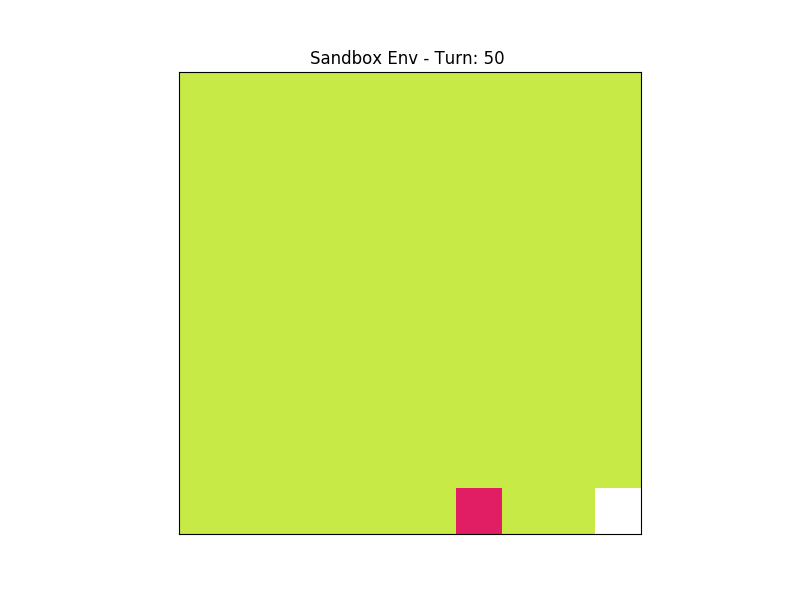

In [49]:
%matplotlib notebook
utils.render(trained_agentA2C)
%matplotlib inline

# A2C updating after every trajectory

In [120]:
from importlib import reload
reload(agents)
reload(environment)
reload(utils)

<module 'utils' from '/home/nicola/Nicola_unipd/MasterThesis/Policy-based-RL/utils.py'>

In [121]:
def train_sandbox_A2C_v1(n_episodes = 100, lr=1e-2, gamma = 0.99, greedy=False):
    # Create environment
    env = environment.Sandbox(5, 5, [0,0], [4,4], max_steps=50)
    observation_space = 10*10
    action_space = 4
    # Init agent
    agent = agents.A2C_v1(observation_space, action_space, lr, gamma, discrete=True, project_dim=16)
    performance = []
    
    for e in range(n_episodes):
        rewards, log_probs, states, done = play_episode_A2C(agent, env, return_states=True, greedy=greedy, update_online=False)
        states = states.reshape(1,-1)
        rewards = rewards.reshape(1,-1)
        agent.update(rewards, log_probs, states, done)
        performance.append(np.sum(rewards))
        if (e+1)%10 == 0:
            print("Episode %d - reward: %.2f"%(e+1, np.mean(performance[-10:])))

    return agent, np.array(performance)

In [122]:
%%time
trained_agentA2C_1, cumulative_rewardA2C_1 = train_sandbox_A2C_v1(n_episodes = 1500, gamma=0.99)

A  tensor([[-0.2992, -0.2913, -0.2834, -0.2753, -0.2672, -0.1445, -0.2256, -0.1279,
         -0.1194, -0.2255, -0.1023, -0.0936, -0.1449, -0.0760, -0.1564, -0.0458,
         -0.0141, -0.0275, -0.0903, -0.0274, -0.0714, -0.0618, -0.0521, -0.0941,
         -0.0343]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.6600, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2659, -0.1575, -0.1495, -0.2421, -0.1059, -0.1349, -0.2187, -0.2103,
         -0.2019, -0.1228, -0.1709, -0.1622, -0.0968, -0.0879, -0.0789, -0.1404,
         -0.1163, -0.0747, -0.0119, -0.0560, -0.0788, -0.0842, -0.0040, -0.0647,
          0.0372]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.1208, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2428, -0.0893, -0.2270, -0.2190, -0.2109, -0.2027, -0.1945, -0.0404,
         -0.0320, -0.0235, -0.1606, -0.0185, -0.1392, -0.0008, -0.1213,  0.0392,
          0.0607, -0.0673,  0.0792,  0.1066,  0.1131, -0.0099,  0.0586,  0.0096,
          0.0195]], grad_f

A  tensor([[-0.3356, -0.3249, -0.3690, -0.3610, -0.2755, -0.3690, -0.3607, -0.2508,
         -0.2423, -0.2452, -0.2625, -0.2939, -0.2078, -0.2763, -0.2673, -0.2583,
         -0.1970, -0.1878, -0.2942, -0.2274, -0.2179, -0.1528, -0.1431, -0.1304,
         -0.2363]], grad_fn=<SubBackward0>)
policy_grad  tensor(-9.2525, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.5185, 0.5420, 0.5587, 0.5241, 0.5786, 0.6237, 0.6131, 0.6586, 0.6198,
         0.6377, 0.6558, 0.6712, 0.6897, 0.6409, 0.7271, 0.6143, 0.8789, 0.6530,
         0.6726, 0.6924, 0.7124]], grad_fn=<SubBackward0>)
policy_grad  tensor(18.0495, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.5406, 0.5030, 0.5200, 0.5372, 0.5546, 0.5721, 0.5899, 0.5524, 0.6175,
         0.5969, 0.6144, 0.7016, 0.5689, 0.5880, 0.8718, 0.7488, 0.7684, 0.8170,
         0.8082]], grad_fn=<SubBackward0>)
policy_grad  tensor(16.3646, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.5771, 0.5944, 0.6120, 0.6490, 0.6476, 0.61

A  tensor([[-0.3417, -0.4361, -0.1098, -0.4201, -0.4120, -0.4038, -0.3884, -0.4311,
         -0.1233, -0.2423, -0.3893, -0.3806, -0.3189, -0.3100, -0.3011, -0.2438,
         -0.2347, -0.3775, -0.3682,  0.0236, -0.0578, -0.0056, -0.2953,  0.0766,
         -0.2756]], grad_fn=<SubBackward0>)
policy_grad  tensor(-9.0960, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.3295, -0.3217, -0.3138, -0.3057, -0.2976, -0.2895, -0.2812, -0.1596,
         -0.1512, -0.2049, -0.1341, -0.1876, -0.1225, -0.0244, -0.3337, -0.0358,
         -0.5325, -0.0175, -0.5139, -0.1837, -0.1197,  0.0498,  0.0093,  0.0191,
          0.0792]], grad_fn=<SubBackward0>)
policy_grad  tensor(-6.5152, dtype=torch.float64, grad_fn=<SumBackward0>)
Episode 60 - reward: -0.15
A  tensor([[-0.3173, -0.2208, -0.2652, -0.2050, -0.3763, -0.4432, -0.3599, -0.4266,
         -0.0558, -0.2405, -0.3807, -0.3721, -0.3633, -0.3107, -0.3455, -0.2927,
         -0.3273, -0.2744, -0.0683, -0.2556, -0.2461, -0.2365, -0.0301, -0.1118,

A  tensor([[-0.2471, -0.2393, -0.2313, -0.3048, -0.2287, -0.4011, -0.3136, -0.3845,
         -0.2464, -0.1694, -0.2439, -0.2352, -0.2265, -0.0934, -0.3054, -0.1432,
         -0.1341, -0.1819, -0.3086, -0.1478, -0.2680, -0.1287, -0.2703, -0.1603,
         -0.2506]], grad_fn=<SubBackward0>)
policy_grad  tensor(-8.0547, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2668, -0.3265, -0.2483, -0.3099, -0.2322, -0.2936, -0.2158, -0.3882,
         -0.2425, -0.3691, -0.2867, -0.3518, -0.2325, -0.3342, -0.1968, -1.1575,
         -0.1786, -0.0759, -0.1374, -0.0572, -0.1344, -0.0646, -0.1397, -0.0149,
         -0.2069]], grad_fn=<SubBackward0>)
policy_grad  tensor(-8.9612, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2818, -0.3297, -0.2505, -0.2245, -0.3030, -0.1900, -0.3626, -0.3543,
         -0.1650, -0.3373, -0.1479, -0.1392, -0.2303, -0.2215, -0.1308, -0.2083,
         -0.2875, -0.1900, -0.2690, -0.1713, -0.0569, -0.1472, -0.0376, -0.0278,
         -0.1988]], grad_f

A  tensor([[-0.2255, -0.1508, -0.2097, -0.2188, -0.1872, -0.1481, -0.1399, -0.1196,
         -0.1231, -0.1455, -0.1060, -0.0854,  0.0616, -0.0085,  0.0794, -0.0497,
          0.0976,  0.1068, -0.0221,  0.1255,  0.0561,  0.0657,  0.0754,  0.0852,
          0.0240]], grad_fn=<SubBackward0>)
policy_grad  tensor(-1.5528, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2292, -0.2214, -0.1523, -0.2316, -0.1362, -0.3312, -0.3390, -0.2610,
         -0.3223,  0.1044, -0.1707,  0.1217, -0.1532, -0.2296,  0.0612,  0.0064,
          0.0155,  0.0248,  0.0341,  0.0435,  0.0530,  0.0626,  0.1362, -0.1359,
         -0.0407]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.1578, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2273, -0.2581, -0.2005, -0.1925, -0.1844, -0.0960, -0.1663, -0.0794,
         -0.1496, -0.1673, -0.1324, -0.0451,  0.1274, -0.1323,  0.1453, -0.1143,
          0.1634,  0.0089, -0.0604,  0.0276,  0.2009,  0.0467, -0.0601,  0.0269,
         -0.1278]], grad_f

A  tensor([[-0.1909, -0.1830, -0.1751, -0.2325, -0.2130, -0.1765, -0.2300, -0.2734,
         -0.2555, -0.2470, -0.2384, -0.2391, -0.1787, -0.1080, -0.1274, -0.1183,
         -0.1206, -0.0974, -0.1021, -0.0812, -0.0832, -0.0735, -0.0524, -0.0426,
         -0.0441]], grad_fn=<SubBackward0>)
policy_grad  tensor(-5.3805, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1922, -0.3034, -0.2955, -0.2266, -0.1586, -0.0854, -0.1485, -0.1740,
         -0.1317, -0.1958, -0.1083, -0.1785, -0.1273, -0.1609, -0.2093, -0.1429,
         -0.0913, -0.1124, -0.0728, -0.0937, -0.0538, -0.0867, -0.0044,  0.0767,
         -0.0966]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.6896, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1881, -0.1802, -0.1723, -0.1643, -0.2699, -0.2441, -0.1930, -0.1847,
         -0.1762, -0.1832, -0.2143, -0.0242, -0.0768, -0.1483, -0.1238, -0.1303,
         -0.0408, -0.1119, -0.1423,  0.0486, -0.0258, -0.0449, -0.4618, -0.4520,
         -0.1050]], grad_f

A  tensor([[-0.1938, -0.1859, -0.0961, -0.1469, -0.0800, -0.0719, -0.2783, -0.0791,
         -0.1056, -0.0383, -0.1115, -0.0210, -0.0711, -0.0622,  0.0056,  0.0146,
          0.0238, -0.0489, -0.0637, -0.1966, -0.0448, -0.1774, -0.1120, -0.1579,
         -0.1480]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.4711, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.7607, 0.8524, 0.8160, 0.8337, 0.8821, 0.9673, 0.9184, 0.8659, 0.9029,
         0.9107, 0.9266, 0.9489, 0.4770, 0.4966, 0.9934, 0.5364]],
       grad_fn=<SubBackward0>)
policy_grad  tensor(17.9106, dtype=torch.float64, grad_fn=<SumBackward0>)
Episode 170 - reward: -0.14
A  tensor([[-0.1686, -0.1608, -0.0857, -0.1448, -0.1367, -0.1285, -0.1203, -0.1549,
         -0.2647, -0.2075, -0.2052, -0.1965, -0.1877, -0.1788, -0.1708, -0.0736,
         -0.1526, -0.1051, -0.1269, -0.0863, -0.0115, -0.0672, -0.0958,  0.0021,
         -0.4743]], grad_fn=<SubBackward0>)
policy_grad  tensor(-5.1124, dtype=torch.float64, grad_fn=<Sum

A  tensor([[-0.1550, -0.1950, -0.2861, -0.2622,  0.0042, -0.2459, -0.2441, -0.2118,
         -0.1202, -0.2600, -0.2196, -0.1693,  0.0720, -0.0590, -0.0895, -0.6034,
         -0.5943, -0.5850, -0.0847, -0.0753, -0.0657,  0.0157, -0.1266, -0.0329,
         -0.1069]], grad_fn=<SubBackward0>)
policy_grad  tensor(-6.4750, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1565, -0.2159, -0.1407, -0.1327, -0.1246, -0.1164, -0.2799, -0.1292,
         -0.1207, -0.2143,  0.0097, -0.1778, -0.2037, -0.1050, -0.1859, -0.1422,
         -0.1227, -0.0687, -0.1492, -0.0725, -0.0637, -0.0084, -0.0443, -0.0339,
          0.1397]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.9489, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1555, -0.1477, -0.1397, -0.2960, -0.2879, -0.2634, -0.2715, -0.2632,
         -0.1180, -0.1897, -0.1480, -0.1393, -0.1305, -0.1217, -0.0642, -0.0552,
         -0.0946, -0.0853, -0.1090, -0.0195, -0.0901, -0.0475, -0.0378,  0.0206,
         -0.0448]], grad_f

A  tensor([[-0.1998, -0.2556, -0.1838, -0.3106, -0.2221, -0.2233, -0.1513, -0.1686,
         -0.1383, -0.1417, -0.0983, -0.0516, -0.1423, -0.1334, -0.0250, -0.0159,
         -0.1063,  0.0024, -0.0878, -0.0784, -0.0688,  0.0403,  0.0500,  0.0217,
         -0.0032]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.6326, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2052, -0.1974, -0.1895, -0.2120, -0.1733, -0.1957, -0.2096, -0.2071,
         -0.1987, -0.1902, -0.1240, -0.1729, -0.1055, -0.1552, -0.1463, -0.0797,
         -0.0706, -0.0613, -0.0520, -0.1744, -0.0404, -0.0483, -0.0476,  0.0574,
          0.0673]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.3449, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2095, -0.2016, -0.2462, -0.1857, -0.2301, -0.2219, -0.1635, -0.1791,
         -0.1570, -0.1622, -0.1520, -0.0534, -0.0907, -0.0357, -0.1167, -0.1077,
         -0.0985, -0.0893, -0.0816, -0.0584, -0.0626, -0.0515, -0.0418, -0.0320,
         -0.0221]], grad_f

A  tensor([[0.8639, 0.8726, 0.8992, 0.9082, 0.9424, 0.8709, 0.9158, 1.0308, 0.9532,
         1.0687, 0.9915, 0.9965, 1.0611, 0.0793, 0.0993]],
       grad_fn=<SubBackward0>)
policy_grad  tensor(17.2763, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.0800, -0.0722, -0.0643, -0.0562, -0.0481, -0.0400, -0.0317, -0.0294,
         -0.0327, -0.0241, -0.0308, -0.0068,  0.0019,  0.0225,  0.0461, -0.0309,
          0.0487, -0.0125,  0.0672,  0.0062,  0.0931,  0.1027,  0.0351,  0.1153,
         -0.0546]], grad_fn=<SubBackward0>)
policy_grad  tensor(-0.1369, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-6.3086e-02, -5.8701e-02, -4.7293e-02, -4.2748e-02, -3.1179e-02,
         -2.3000e-02, -1.4739e-02, -8.8047e-02,  1.1892e-02, -1.7452e-01,
         -1.1644e-02,  7.7931e-02, -3.2956e-02, -4.1503e-02,  6.4287e-02,
         -1.2159e-01,  3.0399e-03, -3.1725e-04,  2.1588e-02,  1.5067e-01,
          1.9199e-01,  4.5757e-02,  5.5460e-02,  2.2110e-01, -6.8273e-01]],
       grad_f

A  tensor([[-0.2117, -0.2039, -0.1747, -0.2013, -0.1586, -0.1716, -0.1634, -0.1550,
         -0.1254, -0.1514, -0.1083, -0.1341, -0.0908, -0.1165, -0.0399, -0.1390,
         -0.1046, -0.2521, -0.6485, -0.1246, -0.6296, -0.2142,  0.0040, -0.0633,
          0.0547]], grad_fn=<SubBackward0>)
policy_grad  tensor(-6.2720, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2209, -0.2130, -0.2051, -0.1752, -0.2436, -0.1589, -0.2058, -0.1423,
         -0.2104, -0.1023, -0.1167, -0.1252, -0.3068, -0.1397, -0.1568, -0.1217,
         -0.2708, -0.2616, -0.0940, -0.1023, -0.0928, -0.0832, -0.0735, -0.0637,
         -0.0031]], grad_fn=<SubBackward0>)
policy_grad  tensor(-5.2780, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2254, -0.2458, -0.2559, -0.2479, -0.2398, -0.2291, -0.1555, -0.1761,
         -0.2062, -0.2302, -0.2570, -0.2129, -0.2041, -0.1628, -0.1863, -0.1448,
         -0.1356, -0.7331, -0.1171, -0.1402, -0.1306, -0.0886, -0.1113, -0.1015,
         -0.0592]], grad_f

A  tensor([[-0.2187, -0.1160, -0.3052, -0.2146, -0.2243, -0.0961, -0.3762, -0.2187,
         -0.2578, -0.4856, -0.2407, -0.1845, -0.1565, -0.0276, -0.1387, -0.0096,
         -0.0231, -0.0139, -0.0046, -0.1456, -0.2281, -0.0557, -0.2088, -0.1070,
         -0.1891]], grad_fn=<SubBackward0>)
policy_grad  tensor(-5.8435, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2015, -0.1936, -0.1462, -0.2794, -0.1313, -0.2632, -0.1149, -0.2444,
         -0.1580, -0.2274, -0.0303, -0.0216, -0.0129, -0.1925, -0.0445, -0.1767,
         -0.0275, -0.1562, -0.0078, -0.1374,  0.0099, -0.1205, -0.1762, -0.1010,
         -0.1565]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.5921, dtype=torch.float64, grad_fn=<SumBackward0>)
Episode 310 - reward: -0.14
A  tensor([[0.7372, 0.7544, 0.8556, 0.6016, 0.6193, 0.8016, 0.9496, 0.7731, 0.7707,
         0.2022, 0.2210, 0.2400, 0.2593, 0.9276, 0.9472, 0.3181, 0.3381]],
       grad_fn=<SubBackward0>)
policy_grad  tensor(13.4679, dtype=torch.float64, grad

A  tensor([[-0.3267, -0.3240, -0.3581, -0.3376, -0.3420, -0.3214, -0.3255, -0.4300,
         -0.3088, -0.2878, -0.2445, -0.2358, -0.2270, -0.2529, -0.2439, -0.2494,
         -0.2257, -0.2290, -0.3325, -0.1944, -0.1479, -0.1861, -0.2942, -0.1716,
         -0.1493]], grad_fn=<SubBackward0>)
policy_grad  tensor(-9.3917, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.3176, -0.3116, -0.3562, -0.4589, -0.3104, -0.3174, -0.2544, -0.2460,
         -0.8839, -0.8754, -0.2205, -0.2118, -0.2796, -0.2412, -0.1968, -0.1877,
         -0.2066, -0.3378, -0.1375, -0.3190, -0.1988, -0.1179, -0.1795, -0.2804,
         -0.1301]], grad_fn=<SubBackward0>)
policy_grad  tensor(-10.4695, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.7031, 0.7033, 0.6778, 0.5875, 0.7493, 0.6250, 0.7527, 0.6632, 0.8341,
         0.8284, 0.8566, 0.3401]], grad_fn=<SubBackward0>)
policy_grad  tensor(11.0904, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.5542, 0.5734, 0.5901, 0.6043, 0.6213, 0.

A  tensor([[-0.4160, -0.1881, -0.3047, -0.2889, -0.2816, -0.2301, -0.1947, -0.1415,
         -0.1331, -0.1694, -0.1880, -0.1515, -0.2692, -0.1234, -0.0972, -0.0882,
         -0.0791, -0.0479, -0.0386, -0.2052, -0.0588, -0.1445, -0.1210, -0.0679,
         -0.0308]], grad_fn=<SubBackward0>)
policy_grad  tensor(-5.5958, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.4110, -0.1832, -0.2972, -0.1672, -0.1591, -0.1170, -0.1427, -0.1343,
         -0.1259, -0.2394, -0.2221, -0.0662, -0.0913, -0.0485, -0.0735, -0.0645,
         -0.0214, -0.1737, -0.0108, -0.0506,  0.0081,  0.0704,  0.0802, -0.0323,
         -0.1376]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.9479, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.4061, -0.2098, -0.3903, -0.3823, -0.3742, -0.1460, -0.1378, -0.1294,
         -0.0830, -0.1125, -0.0659, -0.2197, -0.2128, -0.1574, -0.0477, -0.1184,
         -0.1092, -0.0638, -0.0545, -0.0813, -0.0718, -0.0622, -0.0465,  0.0282,
          0.0035]], grad_f

A  tensor([[0.7480, 0.7657, 0.9744, 0.9925, 0.8200, 1.0292, 0.8164, 0.8966, 0.8344,
         1.0303, 0.8454, 1.0693, 0.8848, 0.1051]], grad_fn=<SubBackward0>)
policy_grad  tensor(15.9716, dtype=torch.float64, grad_fn=<SumBackward0>)
Episode 390 - reward: 0.08
A  tensor([[-0.2122, -0.2044, -0.1964, -0.1884, -0.2037, -0.1721, -0.0556, -0.1371,
         -0.1512, -0.2017, -0.0881, -0.2343, -0.0707, -0.0651, -0.0529, -0.0471,
         -0.0255, -0.0288, -0.0161, -0.0100, -0.0432, -0.0926,  0.0885, -0.0731,
          0.1082]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.2973, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1888, -0.1479, -0.2537, -0.1942, -0.2639, -0.0122, -0.2474, -0.2850,
         -0.1348, -0.1444, -0.1872, -0.0649, -0.0891, -0.0472, -0.0383, -0.1429,
         -0.0201, -0.1245, -0.0638, -0.0209,  0.1209,  0.1305, -0.1033, -0.1394,
         -0.0960]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.8324, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[

A  tensor([[-0.2112, -0.2033, -0.1465, -0.2309, -0.2119, -0.1640, -0.1910, -0.1474,
         -0.1305, -0.1220, -0.3092, -0.1047, -0.1044, -0.0447, -0.1495, -0.0267,
         -0.0176,  0.0427,  0.0521, -0.8001,  0.0710,  0.0295, -0.0116, -0.0370,
          0.0628]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.3825, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2200, -0.1586, -0.1506, -0.2387, -0.1140, -0.1290, -0.1913, -0.1369,
         -0.1803, -0.0955, -0.0637, -0.0782, -0.1400, -0.1219, -0.0810, -0.0683,
         -0.7002, -0.0500, -0.0443, -0.0349, -0.0217, -0.6531, -0.0011, -0.7613,
          0.0186]], grad_fn=<SubBackward0>)
policy_grad  tensor(-6.3718, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-2.2792e-01, -1.6247e-01, -1.5453e-01, -2.0411e-01, -1.9602e-01,
         -1.3024e-01, -1.6666e-01, -2.3934e-01, -1.4988e-01, -1.4137e-01,
         -6.8934e-02, -9.5634e-02, -1.4972e-01, -9.2830e-02, -1.3190e-01,
         -7.6951e-02, -1.1536e-01, -6.7252e-02,

A  tensor([[0.8052, 0.6396, 0.6570, 0.4591, 0.8265, 0.7142, 0.7283, 0.5311, 0.8992,
         0.9094, 0.8598, 0.9533, 0.9787, 0.9919, 1.0177, 1.0313, 0.2608]],
       grad_fn=<SubBackward0>)
policy_grad  tensor(18.0401, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.8540, 0.6830, 0.8897, 0.9078, 0.9260, 0.7558, 0.7847, 0.9329, 0.8225,
         0.9823, 0.9515, 1.0690, 0.9812, 0.1642]], grad_fn=<SubBackward0>)
policy_grad  tensor(16.1234, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1259, -0.1181, -0.1199, -0.2804, -0.2882, -0.2800, -0.2558, -0.0790,
         -0.0608, -0.0620, -0.1076, -0.2028, -0.0901, -0.0812, -0.0473, -0.0864,
          0.0184, -0.0831, -0.0738,  0.0464, -0.0548,  0.0655, -0.0205,  0.0850,
         -0.0008]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.2003, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1325, -0.3299, -0.2934, -0.1588, -0.1505, -0.1426, -0.4814, -0.1259,
         -0.1173, -0.0880, -0.1002, -0.1441, -0.0827, -

A  tensor([[0.5827, 0.4436, 0.6158, 0.7224, 0.5785, 0.5950, 0.7720, 0.7889, 0.8059,
         0.6628, 0.6802, 0.8580, 0.7154, 0.8937, 0.7514, 0.7697, 0.7882, 0.9671,
         0.8317, 0.9258, 0.9033, 1.0397, 0.8933, 0.0073, 0.0273]],
       grad_fn=<SubBackward0>)
policy_grad  tensor(24.0542, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2301, -0.3679, -0.2122, -0.2281, -0.2369, -0.2287, -0.2036, -0.1952,
         -0.1868, -0.1783, -0.1697, -0.1371, -0.1522, -0.1434, -0.1105, -0.1557,
         -0.1432, -0.1373, -0.1247, -0.1186, -0.0816, -0.0994, -0.0623, -0.0075,
         -0.0787]], grad_fn=<SubBackward0>)
policy_grad  tensor(-5.6950, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2452, -0.2373, -0.2411, -0.2331, -0.2250, -0.2168, -0.1895, -0.2002,
         -0.1801, -0.1716, -0.1630, -0.1659, -0.1789, -0.1775, -0.1203, -0.0791,
         -0.1521, -0.1309, -0.1341, -0.1247, -0.1152, -0.0931, -0.1022, -0.0161,
         -0.0444]], grad_fn=<SubBackward0>)
policy_gr

A  tensor([[0.5530, 0.5689, 0.4945, 0.6205, 0.5271, 0.6852, 0.6905, 0.7074, 0.6280,
         0.7224, 0.7385, 0.6463, 0.7545, 0.6819, 0.8416, 0.8599, 0.8478, 0.7892,
         0.8986, 0.8372, 0.0602, 0.9286, 0.0992, 0.9152, 0.2175]],
       grad_fn=<SubBackward0>)
policy_grad  tensor(22.1828, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2492, -0.3318, -0.2334, -0.1247, -0.1166, -0.1084, -0.2009, -0.0918,
         -0.1259, -0.1174, -0.1088, -0.0576, -0.0914, -0.1691, -0.0589, -0.1511,
         -0.0407, -0.1327, -0.0462,  0.0280, -0.0272, -0.0949,  0.0014, -0.0754,
          0.0358]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.8110, dtype=torch.float64, grad_fn=<SumBackward0>)
Episode 500 - reward: -0.04
A  tensor([[0.6004, 0.6169, 0.5431, 0.5600, 0.7166, 0.7138, 0.7512, 0.7687, 0.7665,
         0.7844, 0.8013, 0.8196, 0.8191, 0.8726, 0.8785, 0.8099, 0.8948, 0.8485,
         0.9557, 0.9884, 0.2179]], grad_fn=<SubBackward0>)
policy_grad  tensor(21.4479, dtype=torch.float6

A  tensor([[-0.2027, -0.2801, -0.2085, -0.3512, -0.2279, -0.1477, -0.2114, -0.3184,
         -0.2282, -0.0752, -0.2111, -0.0969, -0.1601, -0.0792, -0.0756, -0.0612,
         -0.1577, -0.0831, -0.2014, -0.0276, -0.1824,  0.0340,  0.0169,  0.0535,
          0.0366]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.7273, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1999, -0.1920, -0.2740, -0.2659, -0.1924, -0.2162, -0.1298, -0.1996,
         -0.1591, -0.1827, -0.1420, -0.0549, -0.1914, -0.1183, -0.0955, -0.0865,
         -0.8925, -0.0681, -0.0830, -0.1923, -0.0641, -0.0545, -0.0663, -0.0565,
         -0.0251]], grad_fn=<SubBackward0>)
policy_grad  tensor(-5.9412, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1993, -0.2452, -0.2101, -0.3545, -0.1939, -0.2130, -0.2047, -0.1964,
         -0.1171, -0.1795, -0.1709, -0.1349, -0.2786, -0.1241, -0.1752, -0.1061,
         -0.2426, -0.0809,  0.0099, -0.1259, -0.0105, -0.0142, -0.0045,  0.0186,
          0.0152]], grad_f

policy_grad  tensor(-3.0017, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2332, -0.2253, -0.1591, -0.1511, -0.2013, -0.1654, -0.1940, -0.1501,
         -0.1030, -0.1332, -0.1601, -0.1146, -0.1058, -0.0469, -0.0379, -0.0912,
         -0.0324, -0.0619, -0.0012, -0.0419,  0.0177, -0.0350,  0.0244, -0.0815,
          0.0441]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.4646, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2410, -0.2119, -0.2040, -0.1428, -0.1937, -0.1840, -0.1772, -0.1689,
         -0.1589, -0.1520, -0.1063, -0.1290, -0.1492, -0.1758, -0.1556, -0.1578,
         -0.0542, -0.0659, -0.0357, -0.1207, -0.1000, -0.1016,  0.0025, -0.0176,
          0.0237]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.4088, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2466, -0.2388, -0.1652, -0.2296, -0.1491, -0.1409, -0.2050, -0.1747,
         -0.1100, -0.1577, -0.1644, -0.0901, -0.0813, -0.1380, -0.1291, -0.1048,
         -0.1109, -0.1017, -0.026

A  tensor([[-0.1624, -0.1546, -0.1581, -0.1652, -0.1825, -0.1273, -0.0886, -0.0643,
         -0.0559, -0.0634, -0.0387, -0.0461, -0.0213, -0.0284, -0.0035, -0.0771,
         -0.1158, -0.1066, -0.0972, -0.0878, -0.0377, -0.0281, -0.0590, -0.0492,
          0.0013]], grad_fn=<SubBackward0>)
policy_grad  tensor(-2.7835, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1605, -0.1526, -0.1671, -0.1367, -0.1510, -0.1428, -0.1122, -0.1038,
         -0.1177, -0.1092, -0.0783, -0.0696, -0.0608, -0.0522, -0.0430, -0.0339,
         -0.0472, -0.0156, -0.0065, -0.0069,  0.0124,  0.0122,  0.0096,  0.0194,
          0.0416]], grad_fn=<SubBackward0>)
policy_grad  tensor(-2.3014, dtype=torch.float64, grad_fn=<SumBackward0>)
Episode 580 - reward: -0.04
A  tensor([[-1.5736e-01, -1.4950e-01, -1.5427e-01, -9.3587e-02, -8.5490e-02,
         -7.7311e-02, -6.9049e-02, -7.1576e-02, -1.2239e-01, -1.0550e-01,
         -9.8156e-02, -8.8213e-02, -7.2466e-02, -1.9705e-02,  1.2074e-04,
         -4.3505e-0

A  tensor([[-0.1168, -0.1046, -0.1010, -0.0887, -0.0806, -0.0548, -0.1134, -0.1758,
         -0.1163, -0.1589, -0.0701, -0.0748, -0.0216,  0.0137, -0.0038, -0.0420,
         -0.0328,  0.0236, -0.0115,  0.0113, -0.0100, -0.0004, -0.0131,  0.0191,
          0.0066]], grad_fn=<SubBackward0>)
policy_grad  tensor(-1.8337, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1211, -0.1851, -0.1054, -0.0973, -0.0892, -0.0811, -0.0728, -0.1363,
         -0.0560, -0.1193, -0.0173, -0.0754,  0.0002, -0.0158,  0.0180, -0.0398,
         -0.0645, -0.0556, -0.0463, -0.0656, -0.0561, -0.0465, -0.0568, -0.0470,
          0.0959]], grad_fn=<SubBackward0>)
policy_grad  tensor(-2.1421, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1384, -0.1166, -0.1053, -0.1006, -0.0892, -0.1399, -0.1971, -0.1428,
         -0.0868, -0.0783, -0.0697, -0.1662, -0.0523, -0.0909, -0.1279, -0.0091,
         -0.0493, -0.0401, -0.0308,  0.0470,  0.0565,  0.0186,  0.0758,  0.0172,
          0.0955]], grad_f

A  tensor([[-0.1971, -0.1892, -0.1813, -0.1733, -0.1915, -0.1759, -0.1698, -0.1802,
         -0.1530, -0.1632, -0.1359, -0.1251, -0.1165, -0.1076, -0.0985, -0.0916,
         -0.0803, -0.0732, -0.0090, -0.0508, -0.0408, -0.9966, -0.9869, -0.0117,
         -0.0022]], grad_fn=<SubBackward0>)
policy_grad  tensor(-6.5152, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1891, -0.2092, -0.1929, -0.2314, -0.1856, -0.1774, -0.1692, -0.1604,
         -0.1240, -0.1155, -0.1342, -0.0982, -0.1168, -0.1079, -0.0912, -0.0856,
         -0.0730, -0.1103, -0.0633, -0.1042, -0.0732, -0.0636, -0.0754, -0.0656,
         -0.0557]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.3389, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1822, -0.1743, -0.1664, -0.1583, -0.1848, -0.1791, -0.1684, -0.1601,
         -0.1541, -0.1335, -0.1514, -0.1162, -0.1340, -0.1095, -0.1260, -0.1492,
         -0.1401, -0.0704, -0.1028, -0.0476, -0.0806, -0.0199, -0.0613, -0.0314,
          0.0146]], grad_f

A  tensor([[-0.1719, -0.1641, -0.1562, -0.1482, -0.1958, -0.2173, -0.0967, -0.2007,
         -0.0799, -0.1838, -0.0628, -0.0868, -0.0735, -0.1030, -0.0851, -0.0996,
         -0.0670, -0.0271, -0.0734, -0.0479, -0.0295, -0.0287, -0.0352, -0.0254,
          0.0402]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.3544, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1759, -0.1680, -0.1624, -0.1544, -0.1990, -0.1750, -0.1575, -0.1584,
         -0.1657, -0.1883, -0.1486, -0.1399, -0.0785, -0.1223, -0.0976, -0.1043,
         -0.0952, -0.0702, -0.0018, -0.0182, -0.0732,  0.0009, -0.0539,  0.0210,
          0.0561]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.6320, dtype=torch.float64, grad_fn=<SumBackward0>)
Episode 660 - reward: -0.15
A  tensor([[-0.1745, -0.1729, -0.1587, -0.1507, -0.1426, -0.1344, -0.1324, -0.1241,
         -0.1156, -0.1319, -0.1310, -0.0727, -0.0816,  0.0021, -0.1389,  0.0201,
         -0.1208,  0.0385, -0.1022, -0.0657, -0.0076, -0.0227,  0.0117, -0.0271

A  tensor([[-0.2039, -0.1961, -0.2489, -0.1841, -0.1636, -0.1997, -0.1915, -0.2175,
         -0.1747, -0.1218, -0.1576, -0.1045, -0.1401, -0.0869, -0.1223, -0.0689,
         -0.0598, -0.0505, -0.0474, -0.0427, -0.0284, -0.0914, -0.0817, -0.0719,
         -0.0239]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.2270, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.6551, 0.6716, 0.6733, 0.7173, 0.7071, 0.7515, 0.7417, 0.7593, 0.8014,
         0.8044, 0.8024, 0.8403, 0.8588, 0.7956, 0.8144, 0.9152, 0.9148, 0.9567,
         0.9847, 1.0045, 0.1904]], grad_fn=<SubBackward0>)
policy_grad  tensor(22.2676, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2009, -0.2066, -0.1851, -0.1770, -0.2280, -0.1608, -0.1525, -0.1442,
         -0.1357, -0.1272, -0.1777, -0.0995, -0.1028, -0.0953, -0.0733, -0.0773,
         -0.1243, -0.0590, -0.0366, -0.0347, -0.0176, -0.0505, -0.0408,  0.0115,
         -0.0211]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.7650, dtype=torch.float64

policy_grad  tensor(-3.7099, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2349, -0.1964, -0.2191, -0.2111, -0.1724, -0.1948, -0.1865, -0.1782,
         -0.1392, -0.1179, -0.1093, -0.1134, -0.1352, -0.1263, -0.1174, -0.0777,
         -0.0992, -0.0594, -0.0501, -0.0712, -0.0312, -0.0216, -0.0276,  0.0107,
          0.0206]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.9740, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2331, -0.2253, -0.2173, -0.1775, -0.2012, -0.1930, -0.1848, -0.1456,
         -0.1375, -0.1287, -0.1201, -0.1422, -0.1016, -0.0829, -0.0740, -0.0649,
         -0.0851, -0.0758, -0.1115, -0.1021, -0.0926, -0.0380, -0.0420, -0.0185,
         -0.0223]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.2374, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.5605, 0.5764, 0.5924, 0.6086, 0.6250, 0.6725, 0.6736, 0.6905, 0.7273,
         0.7398, 0.7595, 0.7442, 0.7620, 0.8108, 0.8289, 0.8467, 0.8699, 0.8846,
         0.9043, 0.9079, 0.9271, 

policy_grad  tensor(-3.4996, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2134, -0.1914, -0.1559, -0.1754, -0.1673, -0.1733, -0.1650, -0.1567,
         -0.1341, -0.1214, -0.1220, -0.1133, -0.1045, -0.0865, -0.0827, -0.0736,
         -0.0505, -0.0553, -0.0460, -0.0365, -0.0130, -0.0034, -0.0104,  0.0161,
         -0.5412]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.1833, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.7632, 0.7810, 0.7989, 0.8424, 0.8776, 0.8760, 0.9147, 0.9041, 0.9136,
         0.9459, 0.9602, 0.9785, 1.0167, 0.4692]], grad_fn=<SubBackward0>)
policy_grad  tensor(16.0828, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2147, -0.2068, -0.1989, -0.1909, -0.1828, -0.1746, -0.1494, -0.1580,
         -0.1236, -0.1411, -0.1325, -0.1238, -0.1150, -0.1061, -0.0712, -0.0622,
         -0.0790, -0.0528, -0.0605, -0.0510, -0.0156, -0.0319,  0.0037,  0.0150,
          0.0067]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.6653, dtype=torc

A  tensor([[-0.2324, -0.2246, -0.2235, -0.2001, -0.1931, -0.1838, -0.1756, -0.1683,
         -0.1669, -0.1471, -0.1377, -0.1148, -0.1327, -0.1239, -0.0882, -0.0934,
         -0.0851, -0.0750, -0.0708, -0.0602, -0.0662, -0.0566, -0.0275, -0.0185,
          0.0022]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.2498, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.6545, 0.6713, 0.6884, 0.6977, 0.7151, 0.7489, 0.7647, 0.7761, 0.8045,
         0.8172, 0.3475, 0.8543, 0.3302, 0.8864, 0.3684, 0.9250, 0.9446, 0.4272,
         0.4472]], grad_fn=<SubBackward0>)
policy_grad  tensor(17.1572, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2407, -0.2329, -0.2341, -0.2260, -0.1983, -0.2098, -0.2015, -0.1840,
         -0.1495, -0.1351, -0.1323, -0.1498, -0.1502, -0.1413, -0.1127, -0.1085,
         -0.0996, -0.0825, -0.0732, -0.0638, -0.0543, -0.0596, -0.0349, -0.0066,
          0.0033]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.4548, dtype=torch.float64, grad_fn=<SumBa

A  tensor([[-0.2321, -0.2098, -0.2163, -0.1938, -0.1682, -0.1881, -0.1518, -0.1715,
         -0.1610, -0.1714, -0.1343, -0.1541, -0.1311, -0.1117, -0.1144, -0.7557,
         -0.7465, -0.0870, -0.7280, -0.7186, -0.0718, -0.0622, -0.0525, -0.0546,
         -0.0328]], grad_fn=<SubBackward0>)
policy_grad  tensor(-8.0886, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2364, -0.2383, -0.2304, -0.2056, -0.2143, -0.1902, -0.1820, -0.1932,
         -0.1642, -0.1725, -0.1471, -0.1590, -0.1297, -0.1413, -0.1164, -0.1233,
         -0.0982, -0.1233, -0.0797, -0.0862, -0.0608, -0.0659, -0.0163, -0.0659,
          0.0034]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.7333, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2366, -0.2163, -0.2138, -0.2263, -0.1992, -0.2069, -0.1813, -0.1903,
         -0.1698, -0.2022, -0.1614, -0.1528, -0.1262, -0.1351, -0.1584, -0.0874,
         -0.1402, -0.0690, -0.0597, -0.0503, -0.0408, -0.0666, -0.0569, -0.0288,
         -0.0348]], grad_f

A  tensor([[-0.2096, -0.2017, -0.1783, -0.1858, -0.1777, -0.1695, -0.1612, -0.1529,
         -0.1445, -0.1359, -0.1079, -0.1187, -0.0944, -0.1010, -0.0727, -0.0636,
         -0.0974, -0.0968, -0.0282, -0.0781, -0.0092, -0.0038,  0.0096, -0.0241,
          0.0293]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.5809, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2181, -0.1875, -0.2043, -0.1808, -0.1709, -0.1646, -0.1563, -0.1634,
         -0.1692, -0.0940, -0.1521, -0.1292, -0.1347, -0.1116, -0.0779, -0.0688,
         -0.1042, -0.0505, -0.0659, -0.0707,  0.0055, -0.0516, -0.0277, -0.0024,
         -0.0080]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.8767, dtype=torch.float64, grad_fn=<SumBackward0>)
Episode 820 - reward: -0.25
A  tensor([[-0.2230, -0.2152, -0.1826, -0.2005, -0.1793, -0.1663, -0.1966, -0.1497,
         -0.1461, -0.1376, -0.1290, -0.1155, -0.1237, -0.1098, -0.1059, -0.0918,
         -0.1025, -0.0900, -0.0839, -0.0713, -0.0763, -0.0355, -0.0570, -0.0160

A  tensor([[-0.1971, -0.2116, -0.1813, -0.1733, -0.1652, -0.1570, -0.1711, -0.1476,
         -0.1404, -0.1586, -0.1224, -0.1113, -0.1025, -0.0936, -0.0847, -0.0756,
         -0.0816, -0.1061, -0.7662, -0.0556, -0.0164, -0.0749, -0.0089, -0.0300,
         -0.0052]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.7295, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.7161, 0.7138, 0.7441, 0.7484, 0.7934, 0.7995, 0.8146, 0.8355, 0.8232,
         0.8726, 0.8603, 0.8971, 0.8981, 0.9483, 0.9175, 0.9371, 0.2835, 0.3035]],
       grad_fn=<SubBackward0>)
policy_grad  tensor(18.6026, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.7537, 0.7752, 0.7830, 0.7899, 0.8187, 0.8355, 0.8039, 0.8722, 0.8912,
         0.9096, 0.9290, 0.9681, 0.9637, 0.9833, 1.0031, 0.2176]],
       grad_fn=<SubBackward0>)
policy_grad  tensor(17.8470, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1824, -0.1746, -0.1614, -0.1629, -0.1557, -0.1470, -0.1393, -0.1823,
         -0.1225, -0.113

A  tensor([[-0.1918, -0.1839, -0.1824, -0.1876, -0.1663, -0.1517, -0.1434, -0.1351,
         -0.1331, -0.1181, -0.1095, -0.1009, -0.0990, -0.0832, -0.0807, -0.0652,
         -0.0625, -0.0533, -0.0453, -0.0485, -0.0264, -0.0294, -0.0743, -0.0557,
          0.0105]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.5320, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1865, -0.1936, -0.2068, -0.1898, -0.1662, -0.1735, -0.1576, -0.1939,
         -0.1694, -0.1769, -0.1523, -0.1596, -0.1062, -0.1051, -0.1051, -0.0749,
         -0.0624, -0.0565, -0.0683, -0.0589, -0.0405, -0.0813, -0.0581, -0.0618,
         -0.0384]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.1685, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.6432, 0.6594, 0.6757, 0.6923, 0.7090, 0.7176, 0.7346, 0.7518, 0.7536,
         0.7734, 0.7490, 0.7670, 0.7850, 0.8454, 0.8218, 0.8404, 0.9013, 0.8900,
         0.9394, 0.9588, 0.9821, 0.1740, 0.1940]], grad_fn=<SubBackward0>)
policy_grad  tensor(22.9091, dty

A  tensor([[-0.1626, -0.2461, -0.2382, -0.1844, -0.2138, -0.1682, -0.2056, -0.1973,
         -0.1889, -0.0890, -0.0804, -0.1631, -0.1543, -0.0997, -0.1365, -0.0817,
         -0.1100, -0.0551, -0.0458, -0.0452, -0.0351, -0.0447, -0.0920, -0.0031,
         -0.0205]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.2553, dtype=torch.float64, grad_fn=<SumBackward0>)
Episode 900 - reward: -0.03
A  tensor([[0.7835, 0.8009, 0.7235, 0.8194, 0.8070, 0.8251, 0.8434, 0.8618, 0.8584,
         0.8993, 0.8962, 0.9417, 0.9460, 0.9807, 0.9854, 0.1323]],
       grad_fn=<SubBackward0>)
policy_grad  tensor(17.5422, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1555, -0.1476, -0.1853, -0.1785, -0.2105, -0.1622, -0.1528, -0.1456,
         -0.1773, -0.1460, -0.1031, -0.1150, -0.0857, -0.1111, -0.1867, -0.0793,
         -0.1685, -0.0610, -0.1500, -0.1406, -0.1311, -0.0231, -0.0134, -0.0036,
          0.0063]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.2331, dtype=torch.float64, grad_fn=<Sum

A  tensor([[-0.4497, -0.1470, -0.4339, -0.1310, -0.4178, -0.4096, -0.1065, -0.1958,
         -0.1373, -0.1789, -0.2401, -0.0813, -0.2487, -0.2398, -0.1097, -0.2218,
         -0.0365, -0.2035, -0.1169, -0.1587,  0.0010, -0.0128, -0.0785,  0.0067,
         -0.0202]], grad_fn=<SubBackward0>)
policy_grad  tensor(-6.0040, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.4971, -0.4893, -0.1745, -0.1733, -0.2007, -0.1571, -0.1420, -0.1405,
         -0.1320, -0.1235, -0.1573, -0.0832, -0.1398, -0.1309, -0.1220, -0.0634,
         -0.0543, -0.0451, -0.0645, -0.0551, -0.0010, -0.1948, -0.0952, -0.1753,
          0.0397]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.9946, dtype=torch.float64, grad_fn=<SumBackward0>)
Episode 930 - reward: -0.13
A  tensor([[-0.5351, -0.2693, -0.5193, -0.2533, -0.2877, -0.2371, -0.2288, -0.2629,
         -0.3029, -0.2579, -0.2493, -0.2406, -0.2319, -0.2230, -0.2140, -0.2724,
         -0.0967, -0.1251, -0.1077, -0.1063, -0.0592, -0.2162, -0.2065, -0.0597

A  tensor([[-6.1245e-01, -6.0460e-01, -3.4110e-01, -3.3308e-01, -4.4235e-02,
         -1.8448e-01, -2.7795e-02, -1.9449e-02, -1.1020e-02, -2.8325e-01,
          6.0952e-03,  1.4783e-02,  2.3558e-02, -1.1600e-01, -9.4715e-02,
         -9.8004e-02, -6.5846e-02, -1.2787e-01, -2.3042e-01, -2.2100e-01,
         -2.1149e-01, -9.0015e-02, -8.0312e-02, -9.9534e-03, -5.3445e-05]],
       grad_fn=<SubBackward0>)
policy_grad  tensor(-5.1604, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.5997, -0.3390, -0.2359, -0.1452, -0.1371, -0.2116, -0.2985, -0.5430,
         -0.5346, -0.5261, -0.2646,  0.0398, -0.2472, -0.1431, -0.1344, -0.1251,
         -0.2112, -0.2019, -0.0974, -0.1832, -0.0785,  0.0137,  0.0271, -0.0496,
         -0.0600]], grad_fn=<SubBackward0>)
policy_grad  tensor(-7.4390, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.2362, 0.5030, 0.8291, 0.6560, 0.6531, 0.6710, 0.7757, 0.7929, 0.7226,
         0.7264, 0.7578, 0.7747, 0.7938, 0.9116, 0.8953, 0.8355, 0.8680,

A  tensor([[-0.6311, -0.6232, -0.6153, -0.1995, -0.5992, -0.5910, -0.5828, -0.5744,
         -0.5660, -0.5575, -0.1411, -0.1324, -0.1236, -0.1147, -0.1076, -0.0985,
         -0.1747, -0.0969, -0.1562, -0.1468, -0.1882, -0.1271,  0.0495, -0.0588,
          0.0692]], grad_fn=<SubBackward0>)
policy_grad  tensor(-9.8835, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.6465, -0.2641, -0.2721, -0.2380, -0.2560, -0.2218, -0.2156, -0.1328,
         -0.2378, -0.2293, -0.1072, -0.0985, -0.1642, -0.1757, -0.1464, -0.0629,
         -0.0766, -0.0674, -0.0580, -0.0486, -0.0887, -0.0295, -0.0694, -0.0617,
         -0.0497]], grad_fn=<SubBackward0>)
policy_grad  tensor(-5.5946, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.6577, -0.6499, -0.2569, -0.2771, -0.2627, -0.2048, -0.3131, -0.2584,
         -0.2964, -0.2415, -0.2793, -0.2242, -0.1860, -0.5492, -0.5402, -0.1461,
         -0.5220, -0.5128, -0.1184, -0.4941, -0.4846, -0.4749, -0.4652, -0.4554,
         -0.0605]], grad_f

A  tensor([[-0.2348, -0.3190, -0.3078, -0.1981, -0.2800, -0.2624, -0.2924, -0.2058,
         -0.1974, -0.3630, -0.1803, -0.0919, -0.2612, -0.2863, -0.1790, -0.3101,
         -0.1668, -0.1958, -0.1083, -0.0192, -0.1877, -0.2121, -0.0818, -0.1214,
         -0.0097]], grad_fn=<SubBackward0>)
policy_grad  tensor(-6.8801, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2290, -0.2921, -0.3772, -0.3692, -0.2680, -0.3529, -0.3446, -0.1322,
         -0.2151, -0.2109, -0.1980, -0.1633, -0.1805, -0.1961, -0.2766, -0.2676,
         -0.1192, -0.1100, -0.2399, -0.2305, -0.2209, -0.1864,  0.0367, -0.1669,
         -0.1418]], grad_fn=<SubBackward0>)
policy_grad  tensor(-7.6073, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2126, -0.2578, -0.2498, -0.3461, -0.1156, -0.3299, -0.2173, -0.3133,
         -0.0824, -0.1707, -0.1753, -0.2084, -0.1176, -0.1087, -0.0056, -0.2422,
         -0.1637, -0.2238, -0.2303, -0.1401, -0.0712, -0.0748, -0.1069, -0.0150,
         -0.0795]], grad_f

A  tensor([[-0.2294, -0.2216, -0.2514, -0.2434, -0.2353, -0.2665, -0.3487, -0.2499,
         -0.2618, -0.2420, -0.2446, -0.2156, -0.1675, -0.1587, -0.1890, -0.1407,
         -0.1352, -0.1853, -0.1614, -0.1632, -0.0978, -0.1441, -0.1232, -0.0661,
         -0.1035]], grad_fn=<SubBackward0>)
policy_grad  tensor(-6.7015, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1935, -0.2272, -0.2193, -0.1697, -0.2032, -0.1534, -0.1451, -0.1784,
         -0.1700, -0.2027, -0.1528, -0.1441, -0.1354, -0.1678, -0.1176, -0.1498,
         -0.0994, -0.1314, -0.1877, -0.1027, -0.0702, -0.0606, -0.1485, -0.0411,
         -0.0923]], grad_fn=<SubBackward0>)
policy_grad  tensor(-5.0981, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1517, -0.1438, -0.1359, -0.1279, -0.1698, -0.1993, -0.2150, -0.1747,
         -0.1305, -0.1578, -0.1811, -0.0924, -0.1637, -0.1229, -0.0781, -0.1049,
         -0.0599, -0.1342, -0.0414, -0.0927,  0.0172,  0.0445,  0.0542,  0.0463,
         -0.0670]], grad_f

A  tensor([[-0.1343, -0.1265, -0.1185, -0.1105, -0.1024, -0.0942, -0.2432, -0.2349,
         -0.0692, -0.2179, -0.0521, -0.0845, -0.1734, -0.0669, -0.0168, -0.0078,
          0.0014,  0.0106,  0.0199, -0.1279, -0.1184, -0.0436,  0.0186, -0.0241,
         -0.0142]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.0151, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.8872, 0.7325, 0.7814, 0.8768, 0.8181, 0.9046, 0.9180, 0.9424, 0.7570,
         0.9659, 1.0378, 0.1854, 0.2054]], grad_fn=<SubBackward0>)
policy_grad  tensor(13.3138, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.0885, -0.1391, -0.2164, -0.1231, -0.1150,  0.0205, -0.0986, -0.1755,
         -0.0907, -0.1586, -0.0980,  0.0713, -0.0472, -0.0384,  0.0290,  0.0381,
         -0.0112,  0.1253,  0.1346, -0.0166,  0.1536,  0.0544,  0.0136, -0.1855,
          0.0815]], grad_fn=<SubBackward0>)
policy_grad  tensor(-1.2929, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.7217, 0.7376, 0.5445, 0.5607, 0.6

A  tensor([[-0.2130, -0.2051, -0.1972, -0.0108, -0.2014,  0.0055, -0.1646,  0.0221,
         -0.1479, -0.1393, -0.1307,  0.0563, -0.1102,  0.0740, -0.0955, -0.0432,
          0.0520, -0.0249, -0.0156, -0.0061, -0.0601,  0.0149, -0.0408,  0.0529,
          0.1285]], grad_fn=<SubBackward0>)
policy_grad  tensor(-1.9288, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2274, -0.2196, -0.2116, -0.0214, -0.0133, -0.0051, -0.1987,  0.0115,
         -0.1590, -0.1499, -0.1277, -0.1326, -0.1325, -0.1150, -0.1146, -0.1056,
         -0.0965, -0.0872, -0.0779, -0.0223, -0.0590, -0.0032,  0.0065,  0.0163,
         -0.0412]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.0819, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2418, -0.2339, -0.2020, -0.2369, -0.1859, -0.1262, -0.1179, -0.1753,
         -0.1669, -0.0926, -0.1498, -0.1411, -0.1675, -0.3180, -0.1846, -0.1755,
         -0.2909, -0.0066, -0.2723, -0.1035, -0.0588, -0.0844, -0.0132,  0.0309,
          0.0065]], grad_f

A  tensor([[-0.2846, -0.2107, -0.2028, -0.2146, -0.1275, -0.1730, -0.1647, -0.0953,
         -0.1479, -0.1555, -0.1469, -0.1221, -0.1294, -0.1205, -0.1116, -0.0865,
         -0.0163, -0.0681, -0.0052, -0.0166,  0.0138,  0.0072, -0.0245,  0.0267,
          0.0528]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.4919, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.3040, -0.2961, -0.2143, -0.2063, -0.1982, -0.2328, -0.1874, -0.1302,
         -0.1707, -0.1992, -0.1906, -0.1449, -0.0872, -0.1272, -0.1397, -0.0420,
         -0.1215, -0.0909, -0.0327, -0.0110, -0.0585,  0.0081,  0.0056,  0.0276,
         -0.0195]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.4280, dtype=torch.float64, grad_fn=<SumBackward0>)
Episode 1120 - reward: -0.02
A  tensor([[-0.3160, -0.1726, -0.2292, -0.1616, -0.1626, -0.1454, -0.1462, -0.1915,
         -0.2171, -0.1644, -0.1558, -0.1781, -0.1485, -0.0134, -0.2005,  0.0046,
         -0.1824, -0.1731, -0.1280, -0.1544,  0.0512, -0.0586,  0.0705, -0.115

policy_grad  tensor(20.9064, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2657, -0.2225, -0.1952, -0.1381, -0.2104, -0.1217, -0.1626, -0.1051,
         -0.0966, -0.1687, -0.1363, -0.0831, -0.1923, -0.1835, -0.1260, -0.0983,
         -0.1078, -0.0986, -0.0893, -0.0612, -0.0211, -0.0421, -0.0510, -0.0898,
         -0.0799]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.2906, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2707, -0.1663, -0.2350, -0.1503, -0.1853, -0.1839, -0.2018, -0.1673,
         -0.0937, -0.1503, -0.0338, -0.1330, -0.0164, -0.0828, -0.0986, -0.0895,
         -0.1606, -0.1514, -0.0046, -0.1327, -0.0429, -0.0086, -0.0236, -0.0941,
          0.0961]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.8368, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2675, -0.2596, -0.2348, -0.1340, -0.1259, -0.1837, -0.1094, -0.1939,
         -0.1855, -0.1939, -0.1684, -0.1766, -0.1509, -0.1421, -0.1331, -0.0312,
         -0.1604, -0.1512, -0.003

A  tensor([[-0.2600, -0.2522, -0.2442, -0.2002, -0.2053, -0.1849, -0.1798, -0.1714,
         -0.2048, -0.1856, -0.1186, -0.1099, -0.1012, -0.0922, -0.0716, -0.0625,
         -0.1722, -0.1630, -0.0348, -0.0371, -0.0277, -0.1251, -0.0084,  0.0015,
          0.0114]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.3903, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.6601, 0.6773, 0.7385, 0.7365, 0.7932, 0.7478, 0.8098, 0.8085, 0.8659,
         0.8304, 0.8606, 0.9308, 0.9076, 0.9030, 0.9508, 0.9305, 0.2015]],
       grad_fn=<SubBackward0>)
policy_grad  tensor(18.2411, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2698, -0.2620, -0.2541, -0.2460, -0.2379, -0.1812, -0.1961, -0.1749,
         -0.1791, -0.1580, -0.1175, -0.2244, -0.0895, -0.0806, -0.0896, -0.0806,
         -0.0535, -0.0443, -0.1611, -0.0255, -0.0160, -0.0064,  0.0033, -0.0049,
          0.0124]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.3338, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tenso

A  tensor([[-0.1958, -0.2082, -0.1947, -0.2403, -0.1842, -0.1761, -0.2158, -0.2074,
         -0.1510, -0.1425, -0.1339, -0.1732, -0.1070, -0.1117, -0.0986, -0.0937,
         -0.0644, -0.0754, -0.0458, -0.0566, -0.0335, -0.0375, -0.0142, -0.0180,
          0.0121]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.0320, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2025, -0.1947, -0.1867, -0.1787, -0.1773, -0.1873, -0.1790, -0.1642,
         -0.1117, -0.1302, -0.1143, -0.1056, -0.0968, -0.0952, -0.0962, -0.0772,
         -0.0681, -0.0319, -0.0806, -0.0637, -0.0361, -0.0241, -0.0423,  0.0254,
          0.0084]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.6549, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2092, -0.2129, -0.2223, -0.2222, -0.1871, -0.2060, -0.1408, -0.1597,
         -0.1443, -0.1576, -0.1272, -0.1255, -0.1265, -0.0728, -0.1087, -0.0898,
         -0.0737, -0.0863, -0.0551, -0.0527, -0.0432, -0.0434, -0.0337, -0.0141,
          0.0028]], grad_f

A  tensor([[-0.1965, -0.1725, -0.1912, -0.1733, -0.1751, -0.1570, -0.1586, -0.1579,
         -0.1419, -0.1410, -0.1324, -0.1237, -0.0968, -0.0880, -0.0790, -0.0881,
         -0.0608, -0.0516, -0.0423, -0.0510, -0.0415, -0.0138, -0.0222,  0.0057,
          0.0318]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.5421, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2024, -0.1946, -0.1765, -0.1899, -0.1604, -0.1371, -0.1659, -0.1205,
         -0.1121, -0.1470, -0.1384, -0.0863, -0.1210, -0.1121, -0.0597, -0.0877,
         -0.0780, -0.0693, -0.0230, -0.0287, -0.0405, -0.0204, -0.0212, -0.0119,
         -0.0291]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.5210, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2086, -0.2175, -0.1929, -0.2016, -0.1767, -0.1631, -0.1603, -0.1520,
         -0.1435, -0.1517, -0.1383, -0.1311, -0.0848, -0.0947, -0.0911, -0.0821,
         -0.0675, -0.0637, -0.0711, -0.0617, -0.0474, -0.0426, -0.0162, -0.0231,
          0.0027]], grad_f

A  tensor([[-0.1986, -0.1908, -0.1828, -0.2095, -0.1733, -0.1768, -0.1553, -0.1469,
         -0.1518, -0.1157, -0.1192, -0.1383, -0.1295, -0.8852, -0.1117, -0.1026,
         -0.0658, -0.0905, -0.0472, -0.0655, -0.0518, -0.0066, -0.0090, -0.0332,
         -0.0183]], grad_fn=<SubBackward0>)
policy_grad  tensor(-5.0473, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2016, -0.1937, -0.1888, -0.1932, -0.1727, -0.1615, -0.1563, -0.1449,
         -0.1364, -0.1279, -0.1193, -0.1106, -0.1019, -0.0930, -0.0841, -0.1066,
         -0.0813, -0.0597, -0.0628, -0.0410, -0.0314, -0.0188, -0.0091,  0.0007,
         -0.0210]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.6259, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2035, -0.1957, -0.2167, -0.1944, -0.2083, -0.1671, -0.1919, -0.1615,
         -0.1477, -0.1709, -0.1495, -0.1536, -0.1107, -0.0826, -0.0929, -0.1050,
         -0.0920, -0.0628, -0.0734, -0.0275, -0.0545, -0.0488, -0.0179,  0.0112,
         -0.0071]], grad_f

A  tensor([[-0.1815, -0.1736, -0.1804, -0.1804, -0.1565, -0.1483, -0.1338, -0.1255,
         -0.1253, -0.1168, -0.0999, -0.1090, -0.0825, -0.0798, -0.0867, -0.0733,
         -0.0465, -0.0550, -0.0500, -0.0247, -0.0090, -0.0076,  0.0211, -0.0109,
         -0.0078]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.1823, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1817, -0.1892, -0.1812, -0.1804, -0.1651, -0.1570, -0.1559, -0.1308,
         -0.1391, -0.1197, -0.1220, -0.1061, -0.0820, -0.0731, -0.0642, -0.0551,
         -0.0613, -0.0394, -0.0301, -0.0297, -0.0447, -0.0027, -0.0055, -0.7440,
         -0.7341]], grad_fn=<SubBackward0>)
policy_grad  tensor(-5.3237, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1769, -0.1691, -0.1612, -0.1695, -0.1475, -0.1774, -0.1637, -0.1316,
         -0.1469, -0.1072, -0.0986, -0.1211, -0.0886, -0.0842, -0.0708, -0.0855,
         -0.0529, -0.0671, -0.0341, -0.0657, -0.7557, -0.0466, -0.7364, -0.0271,
         -0.7167]], grad_f

policy_grad  tensor(-5.0073, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2265, -0.2186, -0.2196, -0.2115, -0.2200, -0.2039, -0.2034, -0.1790,
         -0.1866, -0.1620, -0.1580, -0.1493, -0.1640, -0.1179, -0.1178, -0.1253,
         -0.1082, -0.1070, -0.0811, -0.0882, -0.0708, -0.0691, -0.0515, -0.0496,
         -0.0383]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.9752, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.6527, 0.6279, 0.6580, 0.6618, 0.7204, 0.6964, 0.7554, 0.7731, 0.7821,
         0.7809, 0.8074, 0.8119, 0.8386, 0.8336, 0.2588, 0.8751, 0.8945, 0.9141,
         0.9339, 0.3568]], grad_fn=<SubBackward0>)
policy_grad  tensor(19.5545, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2150, -0.2172, -0.2296, -0.2140, -0.2030, -0.2207, -0.1667, -0.1683,
         -0.1599, -0.1414, -0.1786, -0.1241, -0.1253, -0.1060, -0.1326, -0.0940,
         -0.0813, -0.0757, -0.0959, -0.0865, -0.0770, -0.0674, -0.0281, -0.0147,
         -0.0277]], grad_f

A  tensor([[-0.2159, -0.2353, -0.2160, -0.1907, -0.1999, -0.2031, -0.1676, -0.1556,
         -0.1359, -0.1315, -0.1663, -0.1142, -0.1598, -0.1097, -0.0835, -0.0786,
         -0.1129, -0.0913, -0.0943, -0.0726, -0.0806, -0.0535, -0.0337, -0.7344,
         -0.7245]], grad_fn=<SubBackward0>)
policy_grad  tensor(-6.2255, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2071, -0.1992, -0.1913, -0.1833, -0.1752, -0.1926, -0.1843, -0.1294,
         -0.1386, -0.1124, -0.1504, -0.1417, -0.1219, -0.0951, -0.1105, -0.1222,
         -0.0923, -0.0588, -0.0860, -0.0622, -0.0684, -0.7469, -0.0491, -0.7274,
         -0.0294]], grad_fn=<SubBackward0>)
policy_grad  tensor(-6.2390, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.1979, -0.1901, -0.1784, -0.1873, -0.1610, -0.1919, -0.1707, -0.1477,
         -0.1393, -0.1652, -0.1566, -0.1135, -0.1391, -0.1092, -0.0705, -0.0475,
         -0.0572, -0.0292, -0.0337, -0.0104, -0.0197, -0.0492, -0.0220, -0.0268,
         -0.0023]], grad_f

A  tensor([[0.7252, 0.7590, 0.7769, 0.8363, 0.8081, 0.8276, 0.8005, 0.8656, 0.1812,
         0.9153, 0.2198, 0.9429, 0.9627, 0.2792]], grad_fn=<SubBackward0>)
policy_grad  tensor(13.2588, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.5860, 0.6282, 0.6447, 0.6614, 0.6491, 0.6818, 0.6678, 0.7163, 0.7100,
         0.7541, 0.7457, 0.7725, 0.7748, 0.8092, 0.8119, 0.8906, 0.9269, 0.9289,
         0.8883, 0.9239, 0.9732, 0.2696]], grad_fn=<SubBackward0>)
policy_grad  tensor(22.8160, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.6476, 0.6909, 0.7081, 0.6958, 0.7288, 0.7231, 0.7680, 0.7861, 0.7773,
         0.8192, 0.8224, 0.8860, 0.8758, 0.8485, 0.8837, 0.8875, 0.9708, 0.2579]],
       grad_fn=<SubBackward0>)
policy_grad  tensor(18.5535, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2612, -0.2222, -0.2142, -0.2116, -0.2035, -0.2095, -0.1727, -0.1643,
         -0.1559, -0.1474, -0.1388, -0.1301, -0.1408, -0.1125, -0.1035, -0.1230,
         -0.1376, -0.095

A  tensor([[-0.2339, -0.2083, -0.2181, -0.2101, -0.2020, -0.1761, -0.1641, -0.1558,
         -0.1775, -0.1388, -0.1340, -0.1637, -0.1165, -0.1039, -0.1251, -0.0937,
         -0.1069, -0.0977, -0.0660, -0.0566, -0.0734, -0.0638, -0.0141, -0.0443,
          0.0056]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.2668, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[0.6571, 0.6243, 0.6700, 0.7313, 0.7487, 0.7221, 0.7791, 0.7996, 0.7864,
         0.8047, 0.8231, 0.8418, 0.8606, 0.8364, 0.8538, 0.9472, 0.8928, 0.9967,
         0.0836]], grad_fn=<SubBackward0>)
policy_grad  tensor(19.7155, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[ 0.5590,  0.6030,  0.5909,  0.6071,  0.6516,  0.6604,  0.6848,  0.7017,
          0.6693,  0.7195,  0.6732,  0.7544,  0.7841,  0.7660,  0.7898, -0.0961,
          0.8082,  0.8268,  0.8457,  0.8387,  0.8579,  0.9033,  0.0371,  0.9610,
          0.0769]], grad_fn=<SubBackward0>)
policy_grad  tensor(21.8294, dtype=torch.float64, grad_fn=<SumBa

A  tensor([[-0.1823, -0.1744, -0.1665, -0.2246, -0.1504, -0.1955, -0.1439, -0.1463,
         -0.1272, -0.1747, -0.1100, -0.1447, -0.0826, -0.0737, -0.0648, -0.1218,
         -0.1127,  0.0024, -0.0358, -0.0644, -0.0549, -0.0453, -0.0356, -0.0258,
         -0.0179]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.7040, dtype=torch.float64, grad_fn=<SumBackward0>)
Episode 1420 - reward: -0.15
A  tensor([[-0.1941, -0.1863, -0.1783, -0.1703, -0.2229, -0.1134, -0.2064, -0.0968,
         -0.0884, -0.1397, -0.0713, -0.1638, -0.1039, -0.1047, -0.1304, -0.1093,
         -0.1123, -0.0566, -0.0473, -0.0665, -0.0569, -0.0514, -0.0555, -0.0336,
          0.0454]], grad_fn=<SubBackward0>)
policy_grad  tensor(-3.7064, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2021, -0.1943, -0.2283, -0.1783, -0.1702, -0.1620, -0.1957, -0.1541,
         -0.1934, -0.1372, -0.1618, -0.1531, -0.1024, -0.0935, -0.1410, -0.1320,
         -0.0664, -0.0991, -0.0388,  0.0091, -0.0574, -0.0547,  0.0170, -0.037

A  tensor([[ 0.6247,  0.6411,  0.6576,  0.6743,  0.6912,  0.7082,  0.7350,  0.7648,
          0.7699,  0.7534,  0.7981,  0.8596,  0.8344,  0.8678,  0.8302,  0.8912,
          0.9102, -0.0807,  0.9488, -0.0417,  1.0255, -0.0019]],
       grad_fn=<SubBackward0>)
policy_grad  tensor(20.3375, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2144, -0.2073, -0.2239, -0.2028, -0.1839, -0.1470, -0.1674, -0.1304,
         -0.1220, -0.1495, -0.1409, -0.1248, -0.1161, -0.1307, -0.0573, -0.1278,
         -0.0621, -0.1095, -0.0576, -1.0603, -1.0508, -0.0291, -0.0276,  0.0045,
         -0.0079]], grad_fn=<SubBackward0>)
policy_grad  tensor(-6.6954, dtype=torch.float64, grad_fn=<SumBackward0>)
Episode 1450 - reward: 0.18
A  tensor([[-0.2139, -0.2068, -0.1981, -0.1909, -0.1828, -0.1282, -0.1663, -0.1572,
         -0.1488, -0.1379, -0.1568, -0.1239, -0.1299, -0.1300, -0.0974, -0.0892,
         -0.0801, -0.0700, -0.0616, -0.0643, -0.0211, -0.0321, -0.0018, -0.0257,
          0.0179]], grad_fn

A  tensor([[-0.1968, -0.1889, -0.1810, -0.1446, -0.1365, -0.1621, -0.1544, -0.1185,
         -0.1780, -0.1016, -0.1635, -0.1108, -1.1218, -1.1129, -0.0905, -0.1166,
         -0.0660, -0.1008, -0.0209, -0.0795, -0.0020, -0.0630, -0.0213, -0.0435,
          0.0370]], grad_fn=<SubBackward0>)
policy_grad  tensor(-6.4671, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2046, -0.1967, -0.2162, -0.2082, -0.1743, -0.1783, -0.1579, -0.1617,
         -0.1411, -0.1388, -0.1240, -0.1411, -0.1049, -0.0960, -0.1145, -0.0797,
         -0.0767, -0.0809, -0.0716, -0.0622, -0.0447, -0.0431, -0.0334, -0.0101,
          0.0115]], grad_fn=<SubBackward0>)
policy_grad  tensor(-4.0038, dtype=torch.float64, grad_fn=<SumBackward0>)
A  tensor([[-0.2092, -0.1902, -0.1934, -0.1854, -0.1773, -0.1691, -0.1609, -0.1414,
         -0.1330, -0.1334, -0.1369, -0.1317, -0.1559, -0.1087, -0.1381, -0.1037,
         -0.0946, -0.1107, -0.0630, -0.0941, -0.0441, -1.0395, -1.0298, -0.0280,
         -0.0181]], grad_f

<IPython.core.display.Javascript object>


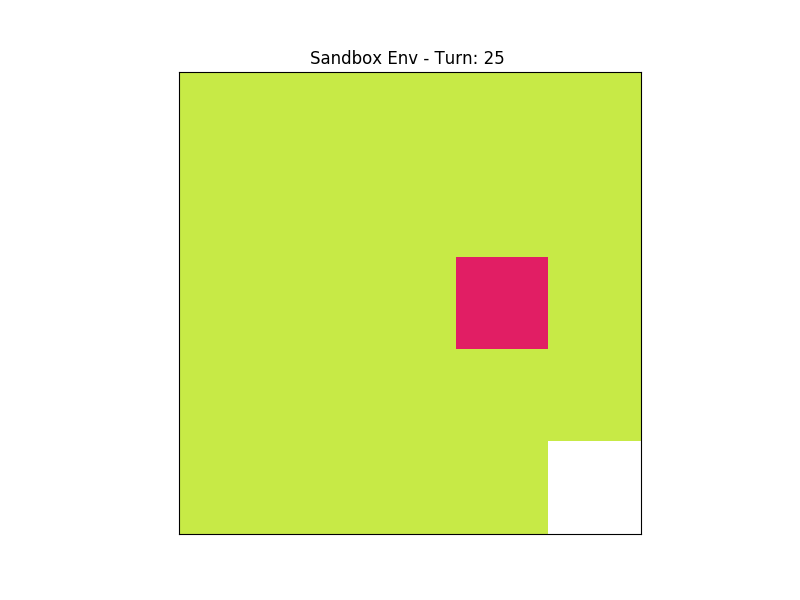

In [139]:
%matplotlib notebook
utils.render(trained_agentA2C_1, x=5, y=5, goal=[4,4])
%matplotlib inline

# Critic analysis

**Idea:** to see if there is any error in the critic's code or if it works properly, we can use an optimal policy to gather trajectories and see if the critic learns from them the real value of the states under an optimal policy.

We have two ways in which the critic's target can be computed:
- Temporal Difference (TD) learning: $V(s) \approx \gamma V(s') + r(s,a)$
- Monte Carlo (MC) learning: $V(s) \approx \sum_{t'=t}^{T} \gamma^{t'-t} r_{t'}$

The first one can be very unstable by its nature, but in this simple taks should converge anyway.
I'm going to try both of them.

## Optimal policy (hardcoded)
Use method get_optimal_action of the environment.

In [192]:
from importlib import reload
reload(agents)
reload(environment)
reload(utils)

<module 'utils' from '/home/nicola/Nicola_unipd/MasterThesis/Policy-based-RL/utils.py'>

<IPython.core.display.Javascript object>


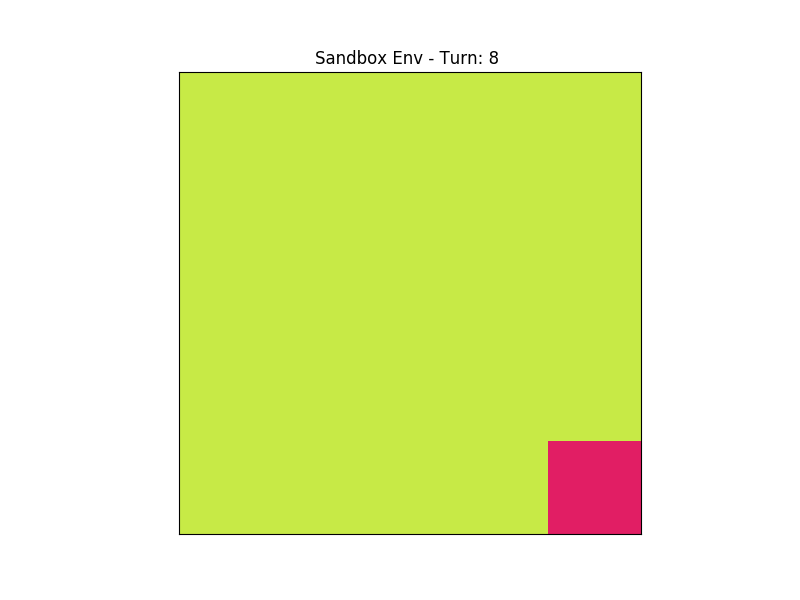

In [164]:
%matplotlib notebook
utils.render(x=5, y=5, goal=[4,4])
%matplotlib inline

### TD Critic Agent

In [165]:
from networks import DiscreteCritic

In [281]:
class CriticAgentTD():
    def __init__(self, observation_space, lr, gamma, project_dim=8):
        self.gamma = gamma
        self.lr = lr
        self.critic = DiscreteCritic(observation_space, project_dim)
        self.critic_optim = torch.optim.Adam(self.critic.parameters(), lr=lr)
        
    def forward(self, state):
        state = torch.from_numpy(state)
        return self.critic(state)
    
    def update(self, rewards, states, done):
        rewards = torch.tensor(rewards) 
        old_states = torch.tensor(states[:-1]).view(1,-1)
        new_states = torch.tensor(states[1:]).view(1,-1)
        done = torch.LongTensor(done.astype(int))
        loss = self.update_critic(rewards, new_states, old_states, done)
        return loss
        
    def update_critic(self, rewards, new_states, old_states, done):
        # Predictions
        V_pred = self.critic(old_states).squeeze()
        #print("V_pred.shape ", V_pred.shape)
        # Targets
        V_trg = self.critic(new_states).squeeze()
        #print("V_trg.shape ", V_trg.shape)
        V_trg = (1-done)*self.gamma*V_trg + rewards
        #print("V_trg.shape ", V_trg.shape)
        # MSE loss
        loss = torch.sum((V_pred - V_trg)**2)
        # backprop and update
        self.critic_optim.zero_grad()
        loss.backward()
        self.critic_optim.step()
        return loss.item()

In [282]:
def play_optimal(env):
    state = env.reset(random_init = True)
    #print("Initial state: ", env.initial)
    rewards = []
    done = []
    states = [state]
    
    while True:
        action = env.get_optimal_action()
        new_state, reward, terminal, info = env.step(action) 
        states.append(new_state)
        rewards.append(reward)
        done.append(terminal)
        
        if terminal:
            break
            
        state = new_state
    
    return np.array(rewards), np.array(states), np.array(done)

In [283]:
def train_critic(n_episodes = 100, lr = 0.01, gamma = 0.99):
    # Create environment
    env = environment.Sandbox(10, 10, [0,0], [9,9], max_steps=50)
    observation_space = 10*10
    critic = CriticAgentTD(observation_space, lr, gamma)
    losses = []
    for e in range(n_episodes):
        rewards, states, done = play_optimal(env)
        loss = critic.update(rewards, states, done)
        losses.append(loss)
        
        if (e+1)%10 == 0:
            print("Episode %d - loss: %.4f"%(e+1, np.mean(losses[-10:])))

    return critic, losses

In [387]:
critic, losses = train_critic(200, lr=1e-2, gamma=0.99)

Episode 10 - loss: 0.4184
Episode 20 - loss: 0.2349
Episode 30 - loss: 0.0947
Episode 40 - loss: 0.0152
Episode 50 - loss: 0.0068
Episode 60 - loss: 0.0033
Episode 70 - loss: 0.0016
Episode 80 - loss: 0.0013
Episode 90 - loss: 0.0011
Episode 100 - loss: 0.0009
Episode 110 - loss: 0.0010
Episode 120 - loss: 0.0010
Episode 130 - loss: 0.0009
Episode 140 - loss: 0.0011
Episode 150 - loss: 0.0011
Episode 160 - loss: 0.0010
Episode 170 - loss: 0.0008
Episode 180 - loss: 0.0008
Episode 190 - loss: 0.0007
Episode 200 - loss: 0.0008


In [388]:
def plot_loss(losses):
    episodes = np.arange(len(losses)) + 1
    plt.figure(figsize=(8,6))
    plt.plot(episodes, losses)
    plt.xlabel("Number of episodes", fontsize=16)
    plt.ylabel("Squared error of the prediction", fontsize=16)
    plt.title("Critic trained through optimal policy", fontsize=16)

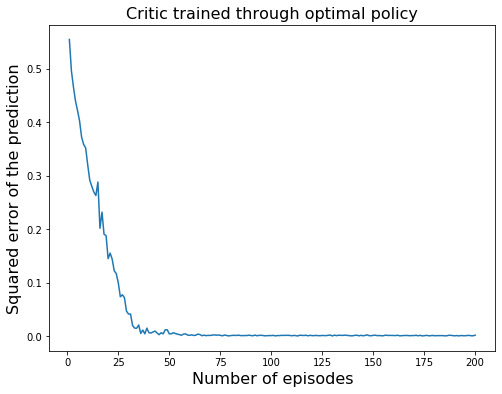

In [389]:
plot_loss(losses)

In [390]:
def get_real_value_map(env, gamma):
    distances = np.zeros((env.boundary[0], env.boundary[1] ))
    for x in range(env.boundary[0]):
        for y in range(env.boundary[1]):
            d = env.dist_to_goal([x,y])
            distances[x,y] = d
    distances = distances.flatten() -1
    real_values = gamma**distances
    real_values[-1] = 1
    return real_values.reshape(env.boundary[0], env.boundary[1])

In [391]:
def value_map(critic, env, gamma):
    states = np.arange(env.boundary[0]*env.boundary[1]).reshape(1,-1)
    values = critic.forward(states).squeeze()
    values = values.detach().numpy().reshape(env.boundary[0], env.boundary[1])
    
    plt.figure(figsize=(15,6))

    plt.subplot(121)
    values[-1,-1] = 1
    plt.imshow(values)
    plt.xticks([])
    plt.yticks([])
    plt.title("Value map", fontsize=16)
    plt.colorbar()
    
    real_values = get_real_value_map(env, gamma)
    plt.subplot(122)
    #plt.imshow(values-real_values)
    plt.imshow(real_values)
    plt.xticks([])
    plt.yticks([])
    plt.title("Real values", fontsize=16)
    plt.colorbar()
    
    plt.figure(figsize=(7,6))
    diff = values-real_values
    diff[-1,-1] = 0
    plt.imshow(diff)
    #plt.imshow(real_values)
    plt.xticks([])
    plt.yticks([])
    plt.title("Difference from real value", fontsize=16)
    plt.colorbar()
    

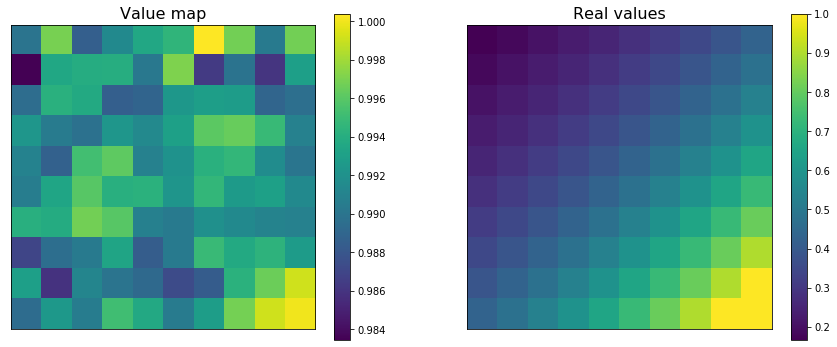

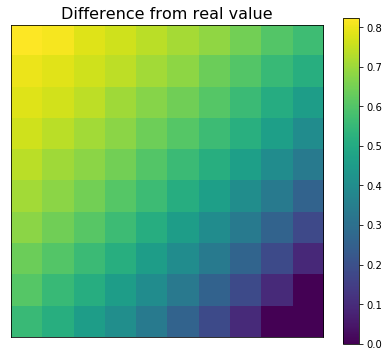

In [392]:
env = environment.Sandbox(10, 10, [0,0], [9,9], max_steps=50)
value_map(critic, env, gamma = 0.9)

### MC Critic Agent

In [393]:
class CriticAgentMC():
    def __init__(self, observation_space, lr, gamma, project_dim=8):
        self.gamma = gamma
        self.lr = lr
        self.critic = DiscreteCritic(observation_space, project_dim)
        self.critic_optim = torch.optim.Adam(self.critic.parameters(), lr=lr)
        
    def forward(self, state):
        state = torch.from_numpy(state)
        return self.critic(state)
    
    def update(self, rewards, states, done):
        #rewards = torch.tensor(rewards) 
        
        old_states = torch.tensor(states[:-1]).view(1,-1)
        new_states = torch.tensor(states[1:]).view(1,-1)
        #done = torch.LongTensor(done.astype(int))
        loss = self.update_critic(rewards, old_states)
        return loss
        
    def update_critic(self, rewards, old_states):
        # Predictions
        V_pred = self.critic(old_states).squeeze()
        #print("V_pred.shape ", V_pred.shape)
        # Discount factors
        Gamma = np.array([self.gamma**i for i in range(rewards.shape[0])])
        # reverse everything to use cumsum in right order, then reverse again
        Gt = np.cumsum(rewards[::-1]*Gamma[::-1])[::-1]
        # Rescale so that present reward is never discounted
        discounted_rewards =  Gt/Gamma
        dr = torch.tensor(discounted_rewards).float()    #.to(self.device)
        #print("dr ", dr.shape)
        #print("V_trg.shape ", V_trg.shape)
        # MSE loss
        loss = torch.sum((V_pred - dr)**2)
        # backprop and update
        self.critic_optim.zero_grad()
        loss.backward()
        self.critic_optim.step()
        return loss.item()

In [394]:
def train_critic_MC(n_episodes = 100, lr = 0.01, gamma = 0.99):
    # Create environment
    env = environment.Sandbox(10, 10, [0,0], [9,9], max_steps=50)
    observation_space = 10*10
    critic = CriticAgentMC(observation_space, lr, gamma)
    losses = []
    for e in range(n_episodes):
        rewards, states, done = play_optimal(env)
        loss = critic.update(rewards, states, done)
        losses.append(loss)
        
        if (e+1)%10 == 0:
            print("Episode %d - loss: %.4f"%(e+1, np.mean(losses[-10:])))

    return critic, losses

In [395]:
critic_MC, losses_MC = train_critic_MC(200, lr=1e-2)

Episode 10 - loss: 2.8243
Episode 20 - loss: 0.6518
Episode 30 - loss: 0.2715
Episode 40 - loss: 0.0624
Episode 50 - loss: 0.0461
Episode 60 - loss: 0.0167
Episode 70 - loss: 0.0155
Episode 80 - loss: 0.0119
Episode 90 - loss: 0.0144
Episode 100 - loss: 0.0099
Episode 110 - loss: 0.0061
Episode 120 - loss: 0.0223
Episode 130 - loss: 0.0082
Episode 140 - loss: 0.0064
Episode 150 - loss: 0.0060
Episode 160 - loss: 0.0031
Episode 170 - loss: 0.0068
Episode 180 - loss: 0.0044
Episode 190 - loss: 0.0013
Episode 200 - loss: 0.0063


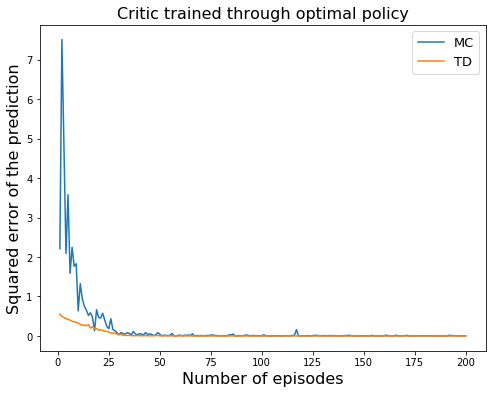

In [396]:
episodes = np.arange(len(losses_MC)) + 1
plt.figure(figsize=(8,6))
plt.plot(episodes, losses_MC, label='MC')
plt.plot(episodes, losses, label='TD')
plt.xlabel("Number of episodes", fontsize=16)
plt.ylabel("Squared error of the prediction", fontsize=16)
plt.title("Critic trained through optimal policy", fontsize=16)
plt.legend(fontsize=13)

In [398]:
x = "Number of episodes"
y = "Critic loss"
t = "Critic with MC estimation and optimal policy"
plot_loss(losses_MC, x, y, t, ylog=True)

TypeError: plot_loss() got an unexpected keyword argument 'ylog'

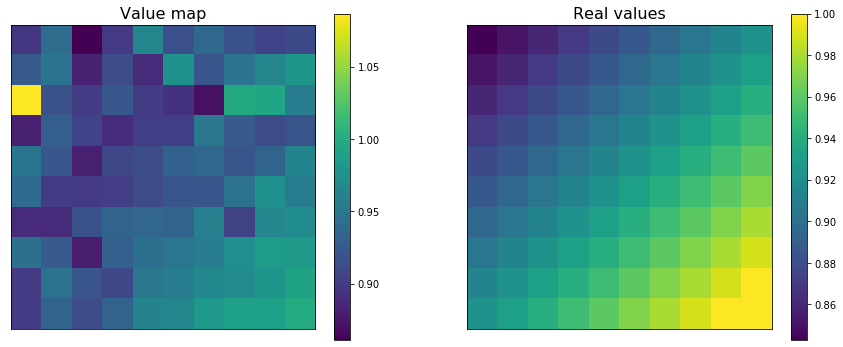

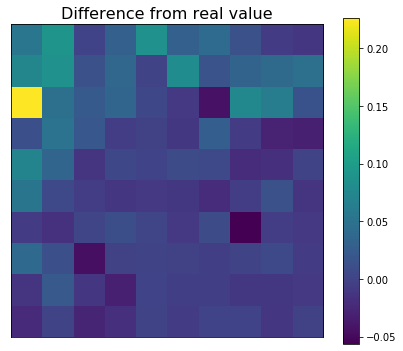

In [399]:
env = environment.Sandbox(10, 10, [0,0], [9,9], max_steps=50)
value_map(critic_MC, env, gamma = 0.99)

In [402]:
def TD_vs_MC(TD_critic, MC_critic, env):
    states = np.arange(env.boundary[0]*env.boundary[1]).reshape(1,-1)
    values_TD = TD_critic.forward(states).squeeze()
    values_TD = values_TD.detach().numpy().reshape(env.boundary[0], env.boundary[1])

    values_MC = MC_critic.forward(states).squeeze()
    values_MC = values_MC.detach().numpy().reshape(env.boundary[0], env.boundary[1])
    
    plt.figure(figsize=(15,6))

    plt.subplot(121)
    values_TD[-1,-1] = 1
    plt.imshow(values_TD, vmax=1)
    plt.xticks([])
    plt.yticks([])
    plt.title("Value map TD", fontsize=16)
    plt.colorbar()

    plt.subplot(122)
    #plt.imshow(values-real_values)
    values_MC[-1,-1] = 1
    plt.imshow(values_MC, vmax=1)
    plt.xticks([])
    plt.yticks([])
    plt.title("Value map MC", fontsize=16)
    plt.colorbar()


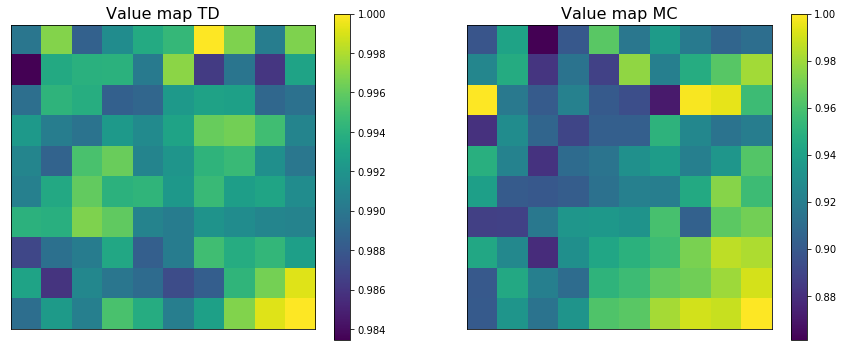

In [403]:
env = environment.Sandbox(10, 10, [0,0], [9,9], max_steps=50)
TD_vs_MC(critic, critic_MC, env)

### Actor-Critic with MC estimation

In [336]:
import ActorCritic
reload(ActorCritic)

<module 'ActorCritic' from '/home/nicola/Nicola_unipd/MasterThesis/Policy-based-RL/ActorCritic.py'>

In [356]:
def train_sandbox_A2C_MC(n_episodes = 100, lr = 1e-2, gamma = 0.99):
    # Create environment
    env = environment.Sandbox(10, 10, [0,0], [9,9], max_steps=1000)
    observation_space = 10*10
    action_space = 4
    # Init agent
    agent = ActorCritic.DiscreteA2C(observation_space, action_space, lr, gamma, project_dim=16)
    performance = []
    critic_losses = []
    actor_losses = []
    
    for e in range(n_episodes):
        rewards, log_probs, states, done = play_episode_A2C(agent, env, return_states=True, update_online=False)
        critic_loss, actor_loss = agent.update(rewards, log_probs, states, done)
        critic_losses.append(critic_loss)
        actor_losses.append(actor_loss)
        performance.append(np.sum(rewards))
        if (e+1)%10 == 0:
            print("Episode %d - reward: %.2f"%(e+1, np.mean(performance[-10:])))

    return agent, np.array(performance), np.array(critic_losses), np.array(actor_losses)

In [357]:
MC_A2C, MC_reward, critic_loss, actor_loss = train_sandbox_A2C_MC(1000)

Episode 10 - reward: -27.60
Episode 20 - reward: -33.80
Episode 30 - reward: -27.20
Episode 40 - reward: -44.20
Episode 50 - reward: -37.70
Episode 60 - reward: -35.40
Episode 70 - reward: -22.70
Episode 80 - reward: -37.30
Episode 90 - reward: -25.60
Episode 100 - reward: -31.10
Episode 110 - reward: -30.80
Episode 120 - reward: -31.90
Episode 130 - reward: -24.00
Episode 140 - reward: -38.90
Episode 150 - reward: -30.40
Episode 160 - reward: -22.80
Episode 170 - reward: -49.10
Episode 180 - reward: -28.20
Episode 190 - reward: -48.20
Episode 200 - reward: -47.70
Episode 210 - reward: -29.00
Episode 220 - reward: -37.30
Episode 230 - reward: -24.10
Episode 240 - reward: -23.80
Episode 250 - reward: -30.30
Episode 260 - reward: -31.10
Episode 270 - reward: -25.20
Episode 280 - reward: -41.70
Episode 290 - reward: -31.20
Episode 300 - reward: -27.80
Episode 310 - reward: -19.60
Episode 320 - reward: -33.00
Episode 330 - reward: -30.10
Episode 340 - reward: -49.00
Episode 350 - reward: -

In [370]:
def plot_loss(losses, x='', y='', t='', xlog=False, ylog=False):
    episodes = np.arange(len(losses)) + 1
    plt.figure(figsize=(8,6))
    plt.plot(episodes, losses)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.title(t, fontsize=16)
    if xlog:
        plt.xscale('log')
    if ylog:
        plt.yscale('log')

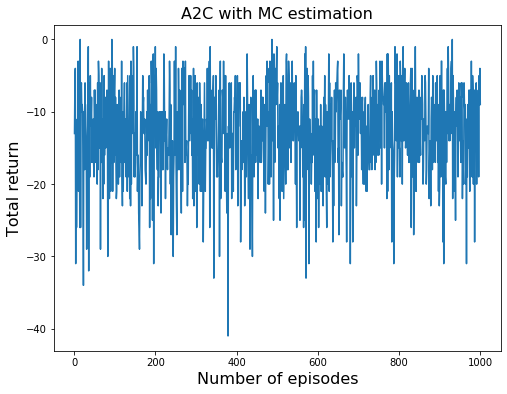

In [353]:
x = "Number of episodes"
y = "Total return"
t = "A2C with MC estimation"
plot_loss(MC_reward, x, y, t)

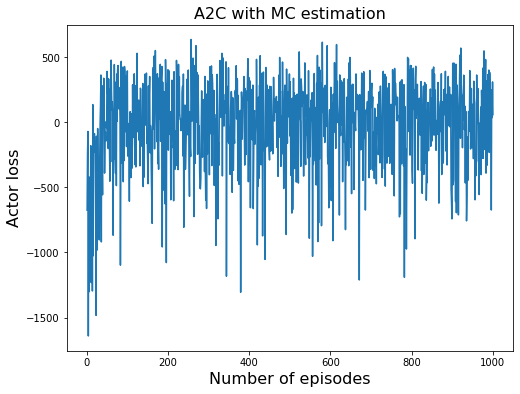

In [354]:
x = "Number of episodes"
y = "Actor loss"
t = "A2C with MC estimation"
plot_loss(actor_loss, x, y, t)

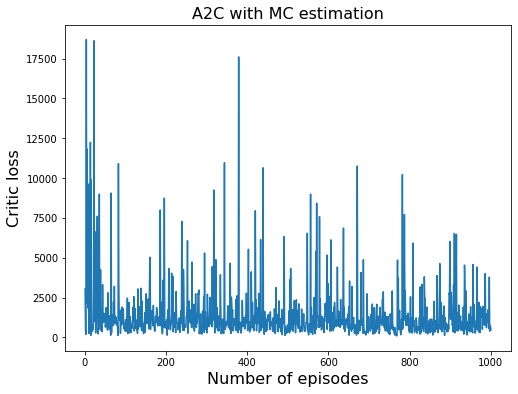

In [355]:
x = "Number of episodes"
y = "Critic loss"
t = "A2C with MC estimation"
plot_loss(critic_loss, x, y, t)

<IPython.core.display.Javascript object>


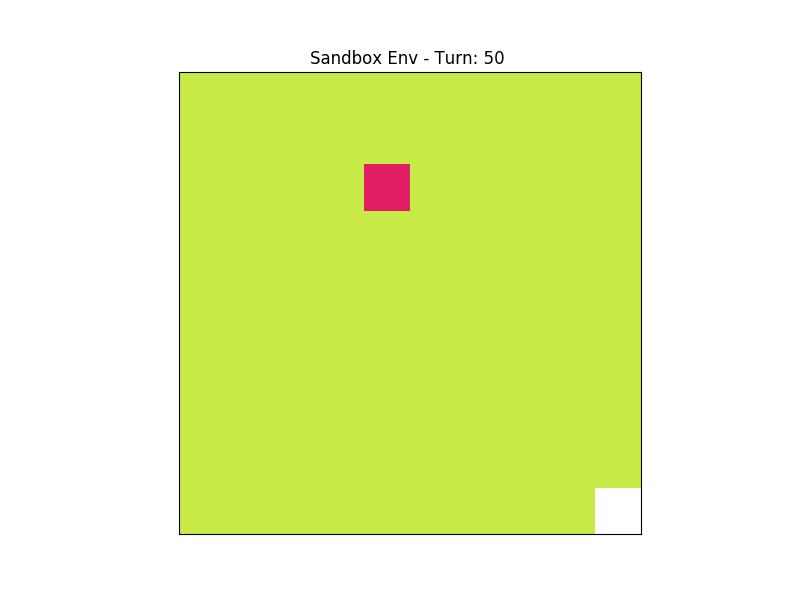

In [343]:
%matplotlib notebook
utils.render(MC_A2C, x=10, y=10, goal=[9,9])
%matplotlib inline